# BeTalent Processo Seletivo: Teste Prático

# <font color='red'> 0.0 Panejamento da Solução </font>

## <font color='green'> Input - Entrada </font>

### O Problema do negócio

- Aplicar técnicas de análise de dados, machine learning e IA generativa no Superstore Dataset, um conjunto de dados de vendas de uma loja virtual

## <font color='green'> Output - Saída </font>

### 
- Nível 1: Análise Exploratória (EDA) e Insights
    - Tratamento e preparação dos dados
    - Análise exploratória com estatísticas descritivas relevantes
    - Visualizações informativas (usando bibliotecas como Matplotlib, Seaborn)
    - Identificação e documentação de 3-5 insights significativos sobre o negócio

- Nível 2: Machine Learning Aplicado
    - Desenvolvimento de um modelo preditivo relevante para o negócio (escolher um):
    - Previsão de vendas
    - Segmentação de clientes
    - Análise de propensão a compra
    - Avaliação e interpretação do modelo escolhido

- Nível 3: Integração com IA Generativa (Plus)
    - Integração das estatísticas ao contexto de um LLM para gerar insights em linguagem natural
    - Documentação da abordagem e resultados obtidos

## <font color='green'> Tasks - Processo </font>

### **NÍVEL 1** - Análise Exploratória (EDA) e Insights
1. 
    - Verificação e tratamento de valores ausentes.
    - Ajustes nos tipos de dados (como converter datas para o formato correto).
    - Remoção de duplicatas, se necessário.

- Análise Exploratória com Estatísticas Descritivas:
    - Estatísticas como média, mediana, desvio padrão, etc., para variáveis numéricas (vendas, lucro, desconto).
     - Distribuição das variáveis categóricas (segmentos, categorias, regiões).

- Visualizações Informativas:
    - Gráficos de barras e histogramas para distribuição de vendas e lucro.
    - Boxplots para analisar a variação de lucro e vendas por categoria.
    - Análise temporal de vendas ao longo dos meses e anos.

- Insights Significativos:
    - Identificação de tendências sazonais.
    - Segmentos ou regiões mais lucrativos.
    - Impacto dos descontos nos lucros.

Insights
- Descontos acima de 20% reduzem significativamente o lucro, apesar do aumento no volume de vendas.

- O segmento "Home Office" apresenta margens de lucro mais altas devido a compras de menor volume e menor desconto.

- A categoria "Office Supplies" tem maior quantidade vendida, mas "Tech" gera mais receita.

- Descontos em "Chairs" aumentam significativamente as vendas, mas afetam negativamente o lucro.
(0% de desconto tem mais de 0.20 de lucro medio, 0-10% tem 0.04 de lucro medio e 10-30% tem mais de -0.10 de lucro medio.)

- "Storage" e "Labels" frequentemente são comprados juntos em pedidos do segmento "Home Office".

### **NÍVEL 2** - Machine Learning Aplicado
1. Desenvolvimento de um Modelo Preditivo
- Preparação dos Dados para o Modelo
    - Divisão dos dados em conjuntos de treino e teste.
    - Normalização ou padronização dos dados, se necessário.
    - Codificação de variáveis categóricas.
- Seleção de Modelos
    - Escolha de modelos preditivos relevantes (ex: Regressão Linear, Random Forest, XGBoost).
    - Treinamento dos modelos com os dados de treino.
    = Avaliação dos modelos usando métricas apropriadas (ex: MAE, RMSE, R²).
- Validação Cruzada
    - Implementação de validação cruzada para garantir a robustez do modelo.
    - Análise dos resultados da validação cruzada.
- Interpretação dos Resultados
    - Análise dos coeficientes do modelo (para modelos lineares).
    - Importância das variáveis (para modelos baseados em árvores).
    - Visualização dos resultados preditivos.
- Ajuste de Hiperparâmetros
    - Uso de técnicas como Grid Search ou Random Search para otimizar os hiperparâmetros do modelo.
    - Comparação dos resultados antes e depois do ajuste de hiperparâmetros.
- Documentação dos Resultados
    - Registro das métricas de desempenho do modelo.
    - Discussão sobre a aplicabilidade do modelo no contexto do negócio.
    - Sugestões para melhorias futuras.


### **NÍVEL 3** - Documentação dos Resultados

1. Analisando os resultados
- O modelo de Regressão Linear apresentou desempenho inferior em comparação com os modelos baseados em árvores.
- O modelo de Random Forest apresentou um bom desempenho, mas o modelo de XGBoost teve um desempenho ligeiramente melhor.
- Após a otimização dos hiperparâmetros, ambos os modelos baseados em árvores melhoraram significativamente.
- O modelo de XGBoost otimizado apresentou o melhor desempenho geral, com os menores valores de MAE e RMSE, e o maior valor de R².

2. Sugestões para melhorias futuras
- Explorar outras técnicas de engenharia de features para melhorar a qualidade dos dados de entrada.
- Testar outros algoritmos de machine learning, como LightGBM ou CatBoost, para comparar o desempenho.
- Implementar técnicas de ensemble para combinar os resultados de múltiplos modelos e melhorar a precisão.
- Realizar uma análise mais aprofundada das variáveis mais importantes para entender melhor os fatores que influenciam as vendas.
- Continuar ajustando os hiperparâmetros dos modelos para encontrar a configuração ideal.

## <font color='green'> Data Summary </font>

### Estrutura do Dataset
O Superstore Dataset contém informações sobre vendas de uma loja virtual, incluindo:
- Informações de pedidos (Order ID, Order Date, Ship Date, etc.)
- Dados de clientes (Customer ID, Customer Name, Segment, etc.)
- Localização (Country, City, State, Region)
- Produtos (Product ID, Category, Sub-Category, Product Name)
- Métricas (Sales, Quantity, Discount, Profit)

# <font color='red'> 0.1 Imports </font>

In [53]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import random            as rd
import xgboost           as xgb


from matplotlib           import pyplot          as plt
from scipy                import stats           as ss

import category_encoders as ce
from sklearn.ensemble      import RandomForestRegressor
from sklearn.linear_model  import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime              import timedelta
from sklearn.preprocessing import LabelEncoder

from IPython.core.display import HTML
from IPython.core.display import Image
from sklearn.ensemble     import RandomForestRegressor

from boruta               import BorutaPy
import warnings
warnings.filterwarnings("ignore")

## 0.2 Helper functions

### Metricals

In [54]:
def numerical_metrics(numerical_attributes):
    #ct = central tendency
    ct_mean = pd.DataFrame(numerical_attributes.apply(np.mean)).T
    ct_median = pd.DataFrame(numerical_attributes.apply(np.median)).T

    #d = dispersion
    d_std = pd.DataFrame(numerical_attributes.apply(np.std)).T
    d_min = pd.DataFrame(numerical_attributes.apply(min)).T
    d_max = pd.DataFrame(numerical_attributes.apply(max)).T
    d_range = pd.DataFrame(numerical_attributes.apply(lambda x: x.max() - x.min())).T
    d_skew = pd.DataFrame(numerical_attributes.apply(lambda x: x.skew())).T
    d_kurtosis = pd.DataFrame(numerical_attributes.apply(lambda x: x.kurtosis())).T

    na_resume = pd.concat([d_min,d_max,d_range,ct_mean,ct_median,d_std,d_skew,d_kurtosis]).T.reset_index()
    na_resume.columns=['Attributes','Min','Max','Range','Mean','Median','STD','Skew','Kurtosis']

    return na_resume

### Graphics

In [55]:
def jupyter_settings():
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

jupyter_settings()

In [56]:
def cramer_v(x,y):
    cm = pd.crosstab(x,y).values
    n = cm.sum()
    r,k = cm.shape

    chi2 = ss.chi2_contingency(cm)[0]
    chi2corr = max(0,chi2 - (k-1)*(r-1)/(n-1))

    kcorr=k - (k-1)**2/(n-1)
    rcorr=r - (r-1)**2/(n-1)

    v = np.sqrt( (chi2corr/n) / (min (kcorr-1,rcorr-1)))
    return v

In [57]:
def corr_cramer_v(categorical_attributes):
    cat_attributes_list = categorical_attributes.columns.tolist()

    corr_dict={}

    for i in range(len(cat_attributes_list)):
        corr_list=[]
        for j in range(len(cat_attributes_list)):
            ref=cat_attributes_list[i]
            feat=cat_attributes_list[j]
            corr = cramer_v(categorical_attributes[ref],categorical_attributes[feat])
            corr_list.append(corr)
        corr_dict[ref]= corr_list
    return corr_dict

### Encoding

In [58]:
def frequency_enconding(df,column):
    enconding=(df.groupby(column).size())/len(df)
    return enconding

### Mean Percentage Error MAE

In [59]:
def mean_percentage_error( y, yhat ):
    return np.mean( ( y - yhat ) / y )

### Mean Absolute Percentage Error MAPE

In [60]:
def mean_absolute_percentage_error( y, yhat ):
    return np.mean( np.abs( ( y - yhat ) / y ) )

### ML Error

In [61]:
def ml_error( model_name, y, yhat ):
    mae = mean_absolute_error( y, yhat )
    mape = mean_absolute_percentage_error( y, yhat )
    rmse = np.sqrt( mean_squared_error( y, yhat ) )

    return pd.DataFrame( { 'Model Name': model_name,
                           'MAE': mae,
                           'MAPE': mape,
                           'RMSE': rmse }, index=[0] )

### Cross Validation

In [62]:
def cross_validation( x_training, kfold, model_name, model, verbose=False ):
    mae_list = []
    mape_list = []
    rmse_list = []
    for k in reversed( range( 1, kfold+1 ) ):
        if verbose:
            print( '\nKFold Number: {}'.format( k ) )
        # start and end date for validation
        validation_start_date = x_training['order_date'].max() - timedelta( days=k*6*7)
        validation_end_date = x_training['order_date'].max() - timedelta( days=(k-1)*6*7)

        # filtering dataset
        training = x_training[x_training['order_date'] < validation_start_date]
        validation = x_training[(x_training['order_date'] >= validation_start_date) & (x_training['order_date'] <= validation_end_date)]

        # training and validation dataset
        # training
        xtraining = training.drop( ['order_date', 'sales'], axis=1 )
        ytraining = training['sales']

        # validation
        xvalidation = validation.drop( ['order_date', 'sales'], axis=1 )
        yvalidation = validation['sales']

        # model
        m = model.fit( xtraining, ytraining )

        # prediction
        yhat = m.predict( xvalidation )

        # performance
        m_result = ml_error( model_name, np.expm1( yvalidation ), np.expm1( yhat ) )

        # store performance of each kfold iteration
        mae_list.append(  m_result['MAE'] )
        mape_list.append( m_result['MAPE'] )
        rmse_list.append( m_result['RMSE'] )

    return pd.DataFrame( {'Model Name': model_name,
                          'MAE CV': np.round( np.mean( mae_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mae_list ), 2 ).astype( str ),
                          'MAPE CV': np.round( np.mean( mape_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mape_list ), 2 ).astype( str ),
                          'RMSE CV': np.round( np.mean( rmse_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( rmse_list ), 2 ).astype( str ) }, index=[0] )

## 0.3 Load Dataset

In [63]:
# Load Data
df_raw = pd.read_csv('superstore.csv', encoding='latin1')

# Drop extra column
df_raw.drop('Row ID', axis=1, inplace=True)
df_raw.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# <font color='red'> 1.0 Data Description </font>

In [64]:
df_data_description = df_raw.copy()

In [65]:
seed = 77

## 1.1 Rename columns

In [66]:
df_data_description.columns = df_data_description.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')

## 1.2 Data dimensions

In [67]:
print( 'Number of rows: {}'.format( df_data_description.shape[0] ) )
print( 'Number of cols: {}'.format( df_data_description.shape[1] ) )

Number of rows: 9994
Number of cols: 20


## 1.3 Data types

In [68]:
df_data_description.dtypes

order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: object

## 1.4 Check NA

In [69]:
df_data_description.isna().sum()

order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

## 1.5 Change dtypes

Date Columns

In [70]:
df_data_description['order_date'] = pd.to_datetime(df_data_description['order_date'], format='%m/%d/%Y')
df_data_description['ship_date'] = pd.to_datetime(df_data_description['ship_date'], format='%m/%d/%Y')

#### order_id / customer_id / product_id

In [71]:
import re

# Problema: Coluna customer_id e order_id com letras e numeros
# Solução: Extrair apenas os números

df_data_description['customer_id'] = df_data_description['customer_id'].str.extract('(\d+)')

# Extrair terceira parte do order_id ex: CA-2016-138688 -> 138688
df_data_description['order_id'] = df_data_description['order_id'].str.split('-').str[2]

## 1.6 Descriptive statistics

In [72]:
numerical_columns=df_data_description.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_columns=df_data_description.select_dtypes(exclude=['int64','float64', 'datetime64[ns]']).columns.tolist()

### 1.6.1 Numerical attributes

In [73]:
na_resume=numerical_metrics(df_data_description[numerical_columns])
na_resume

,Attributes,Min,Max,Range,Mean,Median,STD,Skew,Kurtosis
0,postal_code,1040.000,99301.000,98261.000,55190.379428,56430.5000,32062.089163,-0.128526,-1.493020
1,sales,0.444,22638.480,22638.036,229.858001,54.4900,623.213919,12.972752,305.311753
2,quantity,1.000,14.000,13.000,3.789574,3.0000,2.224998,1.278545,1.991889
3,discount,0.000,0.800,0.800,0.156203,0.2000,0.206442,1.684295,2.409546
4,profit,-6599.978,8399.976,14999.954,28.656896,8.6665,234.248387,7.561432,397.188515


In [74]:
df_data_description[numerical_columns].describe()

,postal_code,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


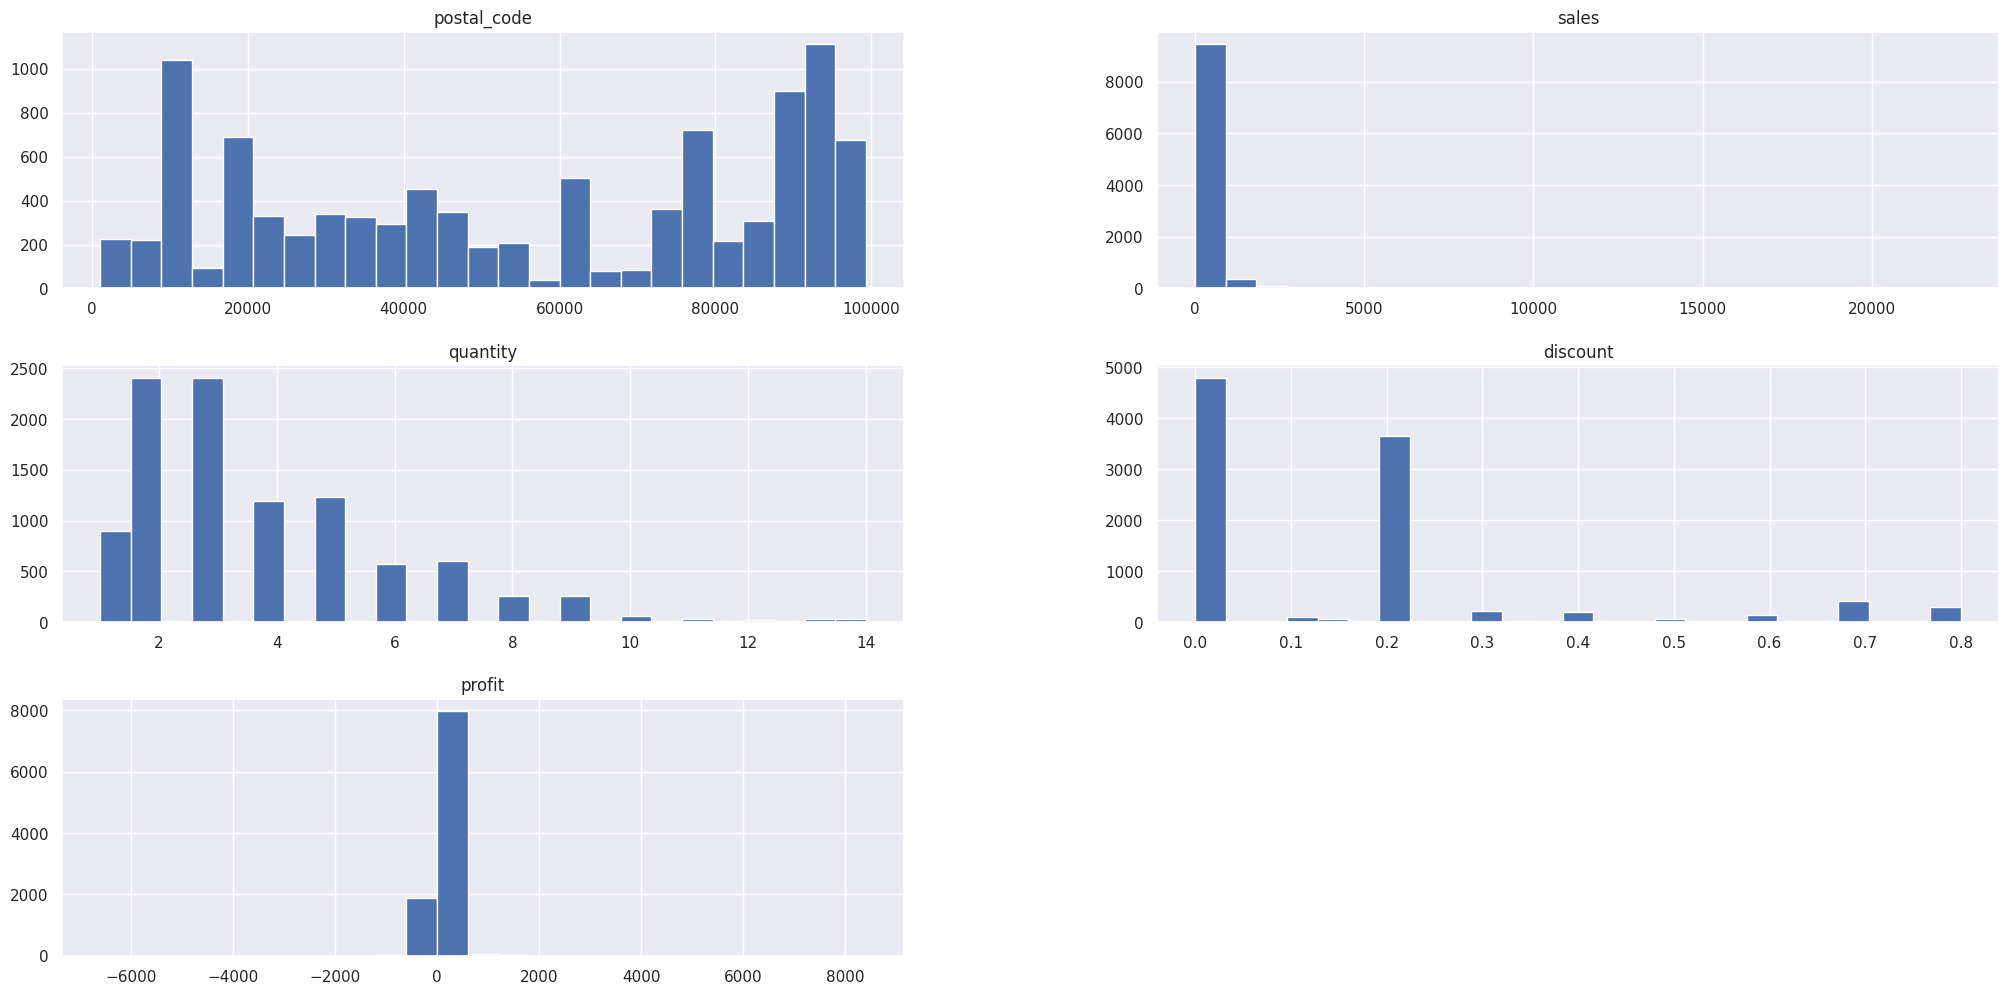

In [75]:
df_data_description[numerical_columns].hist(bins=25);

### 1.6.1.1 Numerical attributes insights

 - Sales
    - A média de vendas é de aproximadamente 229,86, enquanto a mediana é de 54,49, indicando uma distribuição assimétrica (skew positivo). Isso sugere que existem poucas vendas muito altas que puxam a média para cima.
    - O alto desvio padrão (623,21) reforça a grande variação nos valores de vendas.
    - O skew positivo (12,97) e a kurtosis alta (305,31) indicam a presença de outliers significativos (vendas excepcionais).

- Profit
    - O lucro apresenta um valor médio de 28,66, mas a mediana é de 8,67. Isso sugere que a maioria das transações gera lucro baixo, enquanto poucas transações têm lucros muito altos.
    - Há valores negativos significativos (mínimo de -6599,98), indicando que alguns itens são vendidos com prejuízo, possivelmente devido a descontos excessivos ou custos altos.
    - O skew positivo (7,56) e a kurtosis extremamente alta (397,19) indicam que a maioria dos lucros é baixa, mas há outliers positivos significativos.

- Discount
    - A média de desconto é de 15,62%, com a maioria dos pedidos recebendo 20% ou nenhum desconto (mediana de 0,20).
    - A distribuição é assimétrica (skew positivo de 1,68), sugerindo que a maioria dos pedidos recebe pouco ou nenhum desconto, enquanto poucos recebem descontos muito altos (até 80%).
    - É interessante investigar a relação entre descontos altos e prejuízos nos lucros.

- Quantity
    - A média é de 3,79 itens por pedido, e a maioria dos pedidos é de até 5 itens.
    - A distribuição é levemente assimétrica (skew de 1,28), o que indica que pedidos muito grandes são raros.

#### Possíveis Ações e Investigações:
    - Analisar quais produtos ou categorias estão gerando prejuízos e investigar se isso está relacionado aos descontos aplicados.
    - Explorar estratégias de precificação para reduzir os prejuízos e maximizar o lucro nas vendas de alto valor.
    - Realizar uma análise geográfica para identificar regiões com maior volume de vendas ou lucro.

### 1.6.2 Categorical attributes

In [76]:
df_data_description[categorical_columns].describe()

,order_id,ship_mode,customer_id,customer_name,segment,country,city,state,region,product_id,category,sub_category,product_name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,100111,Standard Class,21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


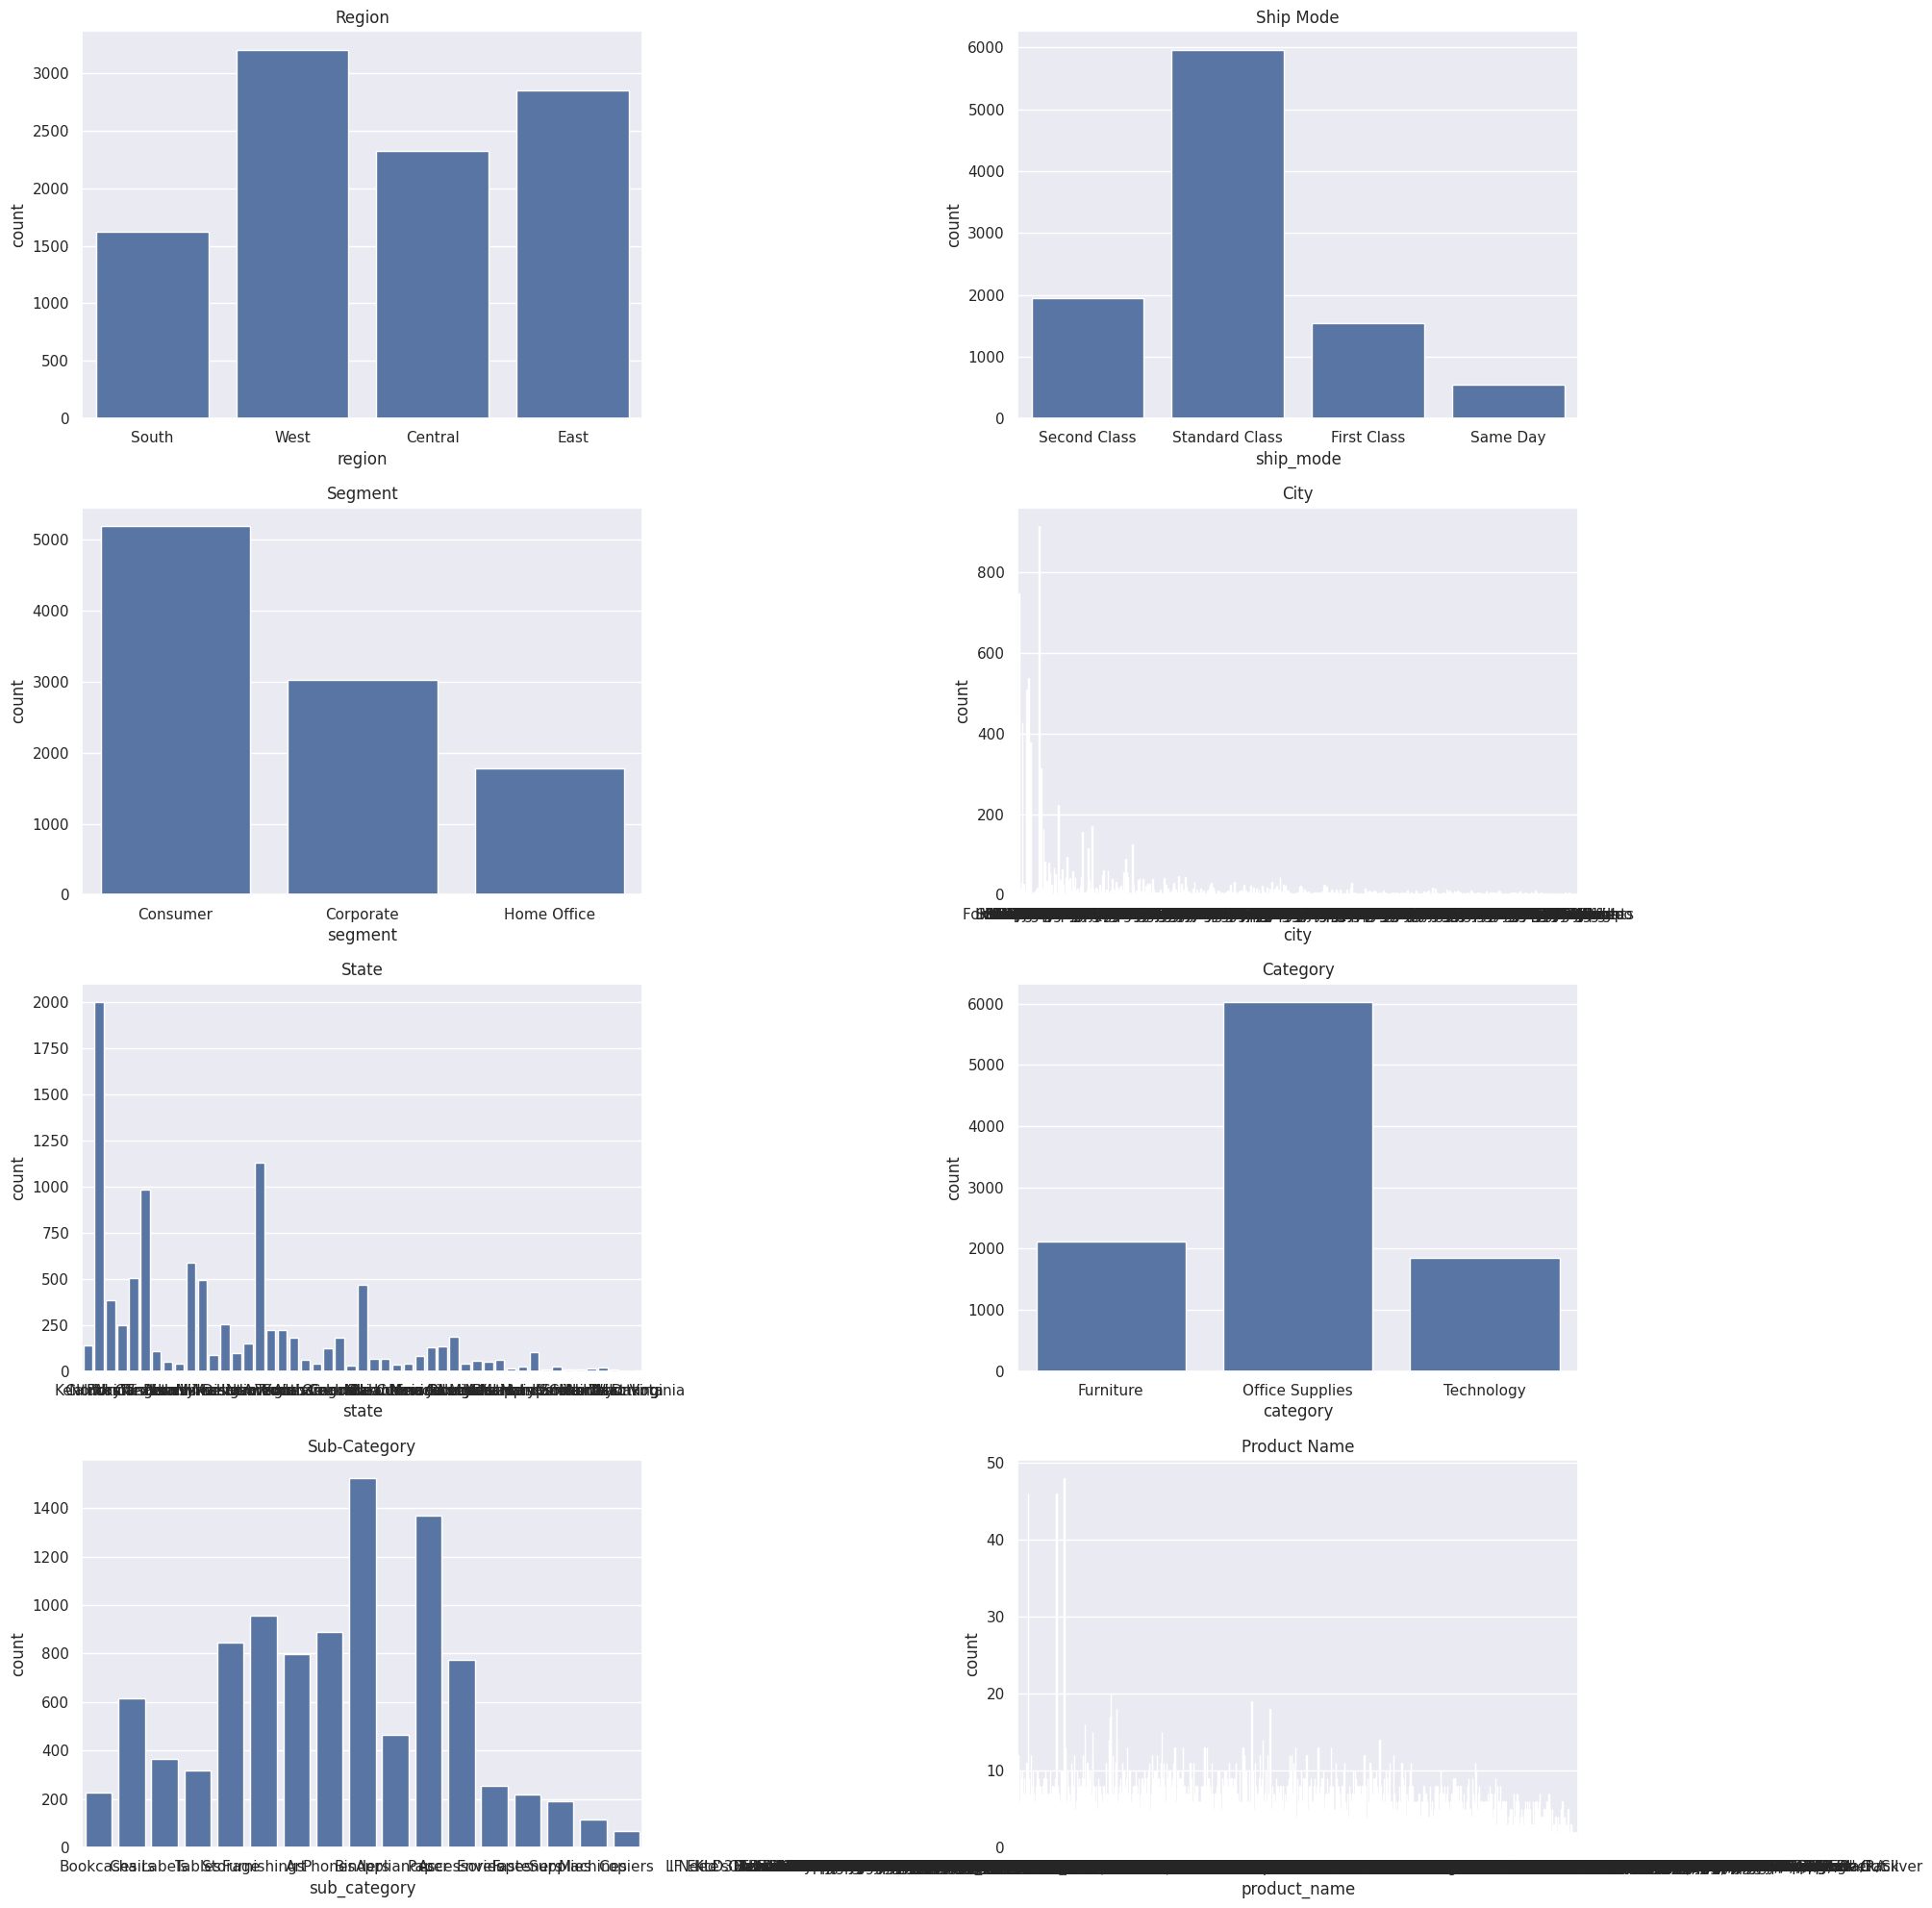

In [77]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

sns.countplot(ax=axes[0, 0], x='region', data=df_data_description)
axes[0, 0].set_title('Region')

sns.countplot(ax=axes[0, 1], x='ship_mode', data=df_data_description)
axes[0, 1].set_title('Ship Mode')

sns.countplot(ax=axes[1, 0], x='segment', data=df_data_description)
axes[1, 0].set_title('Segment')

sns.countplot(ax=axes[1, 1], x='city', data=df_data_description)
axes[1, 1].set_title('City')

sns.countplot(ax=axes[2, 0], x='state', data=df_data_description)
axes[2, 0].set_title('State')

sns.countplot(ax=axes[2, 1], x='category', data=df_data_description)
axes[2, 1].set_title('Category')

sns.countplot(ax=axes[3, 0], x='sub_category', data=df_data_description)
axes[3, 0].set_title('Sub-Category')

sns.countplot(ax=axes[3, 1], x='product_name', data=df_data_description)
axes[3, 1].set_title('Product Name')

plt.tight_layout()
plt.show()

# <font color='red'> 2.0 Feature Enginnering </font>

In [78]:
df_fe = df_data_description.copy()

## 2.1 Hypothesis mind map

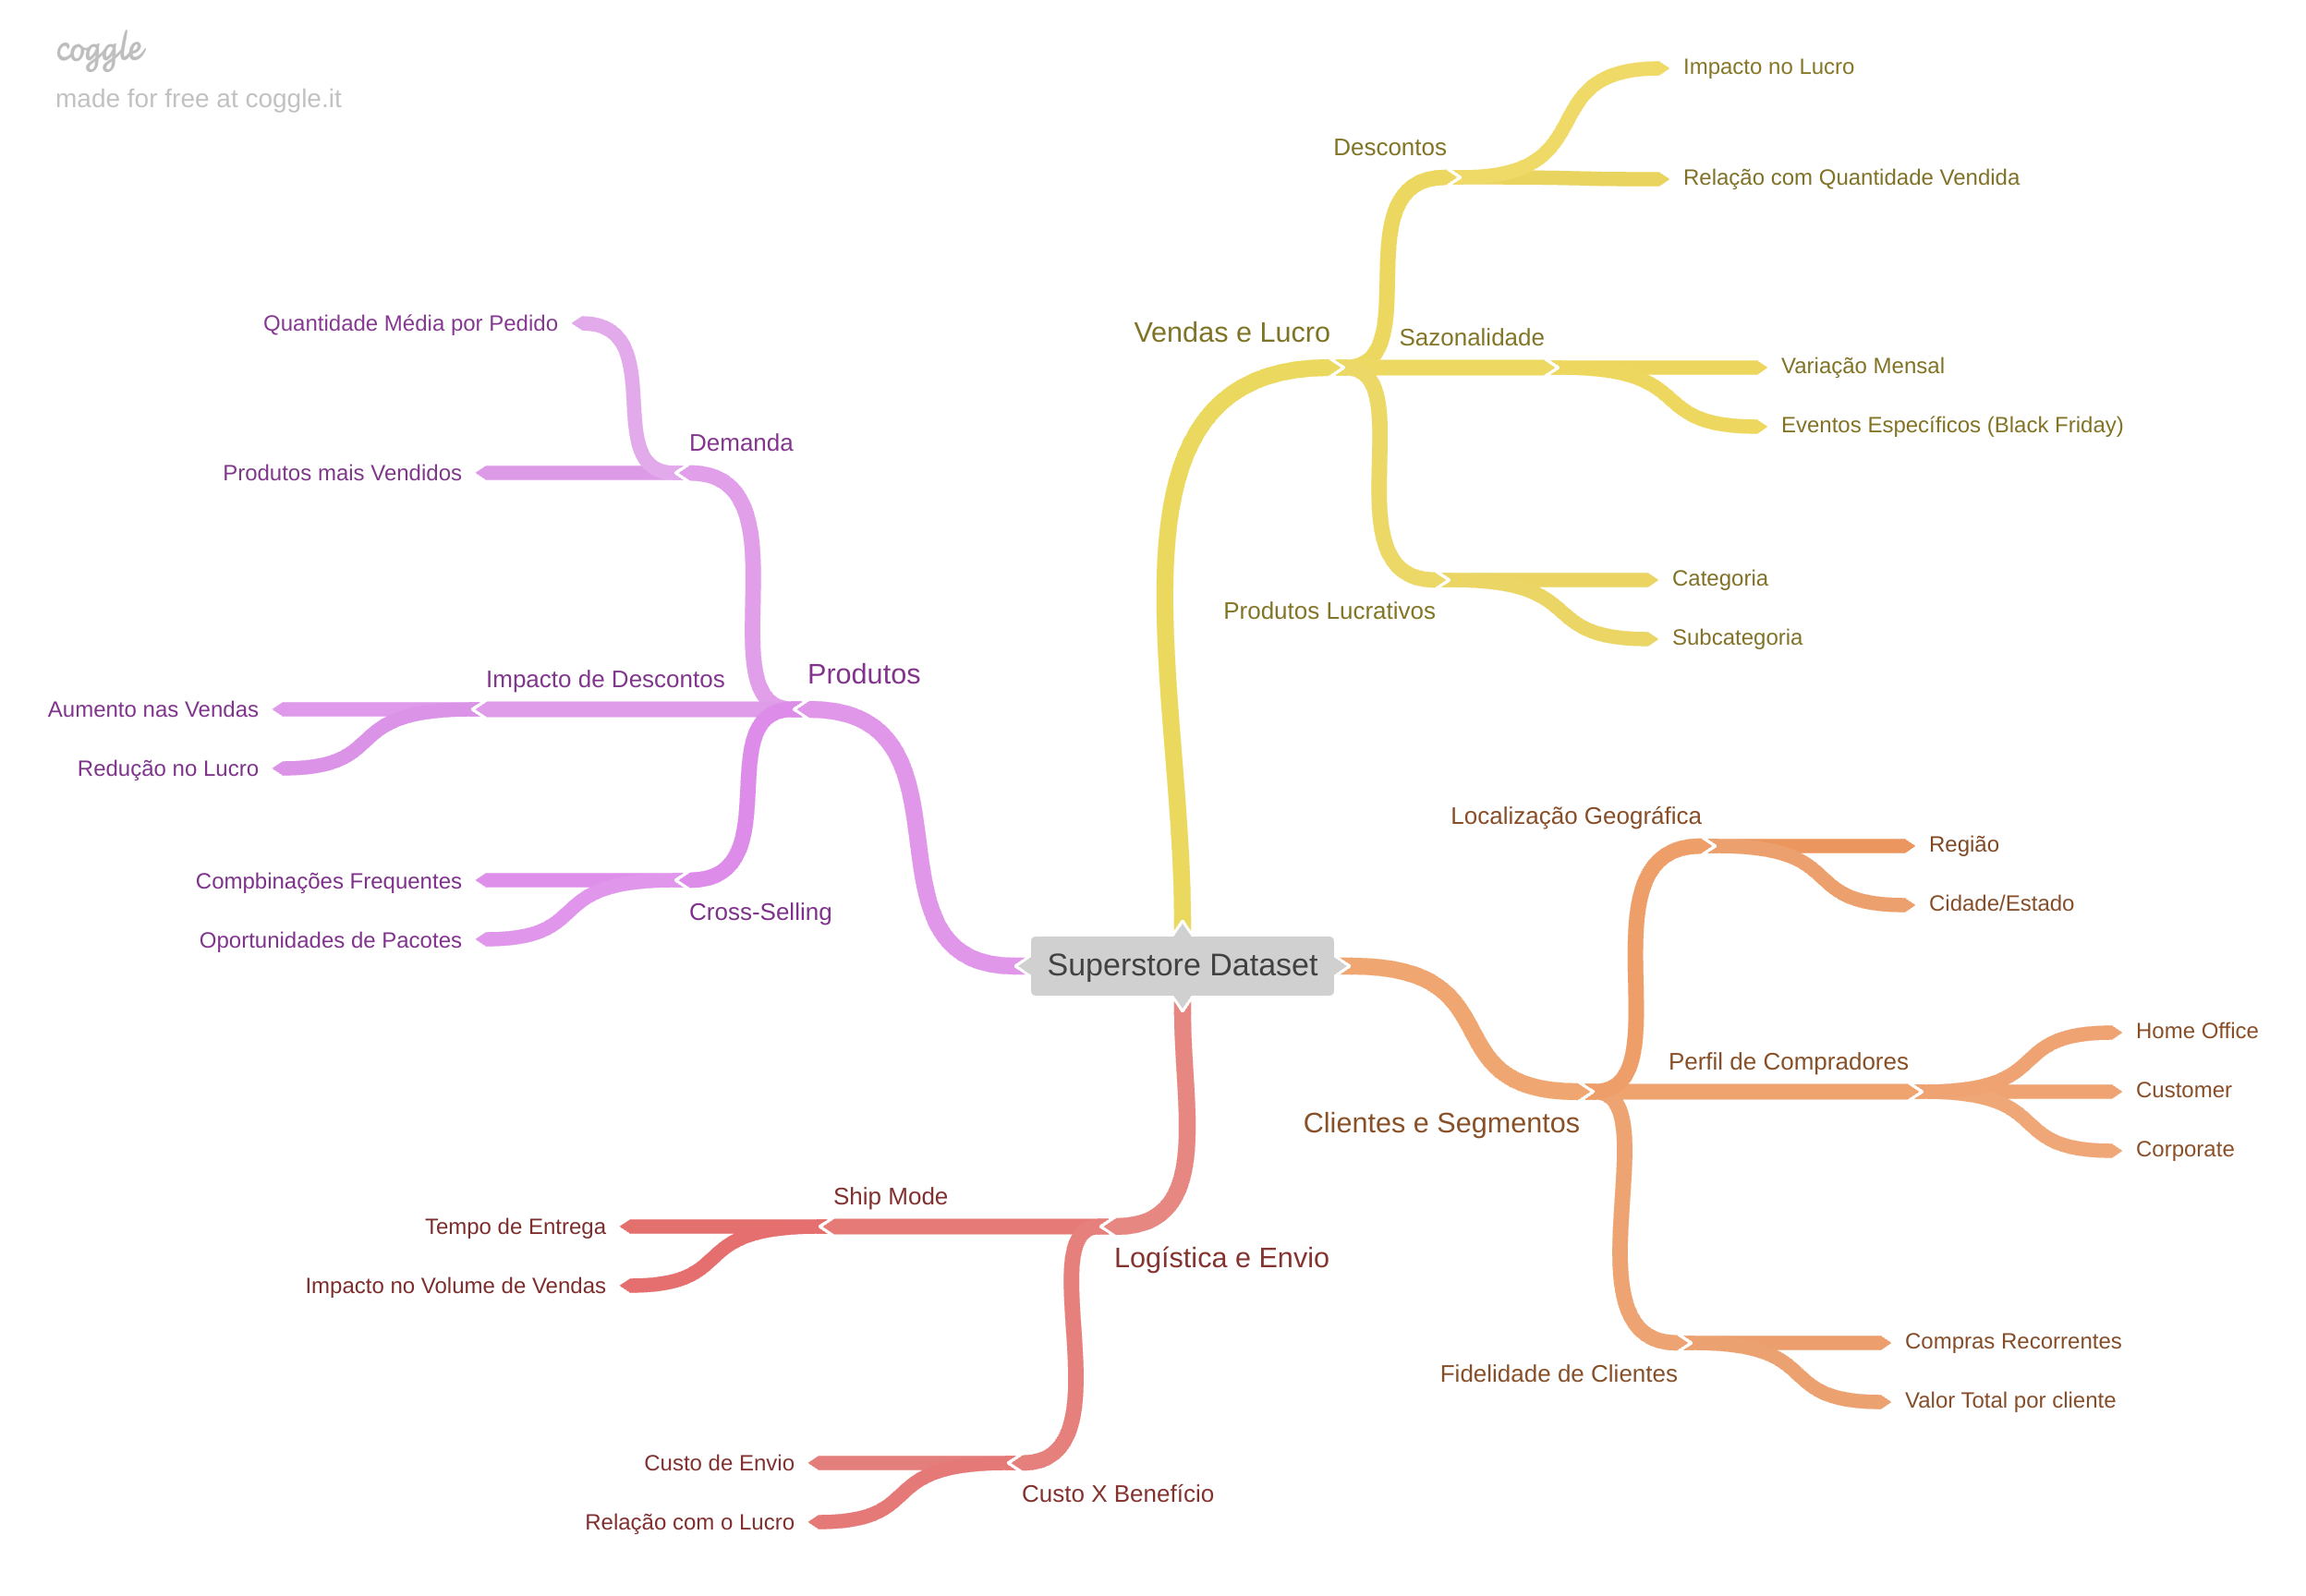

In [79]:
Image('img/SuperstoreMindMap.png')

## 2.2 Hypotheses

### 2.2.1 Vendas e Lucro

**1.** Descontos acima de 20% reduzem significativamente o lucro, apesar do aumento no volume de vendas.

**2.** Vendas e lucros são maiores no quarto trimestre devido às compras de fim de ano.

**3.** A categoria "Office Supplies" tem margens de lucro maiores em comparação com "Furniture" e "Technology".

**4.** A subcategoria "Chairs" gera mais receita, mas tem menor margem de lucro em comparação com "Bookcases" e "Tables".

**5.** A região "West" apresenta maior volume de vendas, mas a "South" tem maior lucratividade relativa.

### 2.2.2 Clientes e Segmentos

**1.** O segmento "Corporate" gasta mais por pedido, mas o segmento "Consumer" tem maior volume de pedidos.

**2.** Clientes recorrentes representam uma porcentagem significativa das vendas totais.

**3.** O segmento "Home Office" apresenta margens de lucro mais altas devido a compras de menor volume e menor desconto.

**4.** Clientes em cidades metropolitanas têm maior ticket médio comparado a cidades menores.

**5.** O segmento "Corporate" compra mais móveis (Furniture), enquanto "Consumer" compra mais suprimentos de escritório (Office Supplies).

### 2.2.3 Logística e Envio

**1.** A modalidade "Second Class" é a mais utilizada, mas "Same Day" gera maior ticket médio.

**2.** Pedidos com maior tempo de entrega têm maior taxa de devolução ou menor margem de lucro.

**3.** Descontos mais altos são aplicados em pedidos com "Standard Class" para compensar o tempo de entrega maior.

**4.** "First Class" apresenta margens de lucro menores devido ao custo mais alto de envio.

**5.** A região "West" utiliza mais "Second Class" devido à proximidade dos centros de distribuição.

### 2.2.4 Produtos

**1.** A categoria "Office Supplies" tem maior quantidade vendida, mas "Furniture" gera mais receita por unidade.

**2.** Descontos em "Chairs" aumentam significativamente as vendas, mas afetam negativamente o lucro.

**3.** "Storage" e "Labels" frequentemente são comprados juntos em pedidos do segmento "Home Office".

**4.** "Tables" têm maior variação de lucro devido ao alto desconto aplicado.

**5.** Produtos de "Office Supplies" têm alta demanda, especialmente em pedidos de "Corporate".

## 2.3 Lista Final de Hipóteses

**1.** Descontos acima de 20% reduzem significativamente o lucro, apesar do aumento no volume de vendas.

**2.** Vendas e lucros são maiores no quarto trimestre devido às compras de fim de ano.

**3.** A categoria "Office Supplies" tem margens de lucro maiores em comparação com "Furniture" e "Technology".

**4.** O segmento "Corporate" gasta mais por pedido, mas o segmento "Consumer" tem maior volume de pedidos.

**5.** Clientes recorrentes representam uma porcentagem significativa das vendas totais.

**6.** O segmento "Home Office" apresenta margens de lucro mais altas devido a compras de menor volume e menor desconto.

**7.** A modalidade "Second Class" é a mais utilizada, mas "Same Day" gera maior ticket médio.

**8.** Pedidos com maior tempo de entrega têm maior taxa de devolução ou menor margem de lucro.

**9.** "First Class" apresenta margens de lucro menores devido ao custo mais alto de envio.

**10.** A categoria "Office Supplies" tem maior quantidade vendida, mas "Furniture" gera mais receita por unidade.

**11.** Descontos em "Chairs" aumentam significativamente as vendas, mas afetam negativamente o lucro.

**12.** "Storage" e "Labels" frequentemente são comprados juntos em pedidos do segmento "Home Office".

## 2.4 Feature Engineering

### <font color='green'> 2.4.1 Limpeza e Padronização </font>

In [80]:
# Lead Time - Tempo de entrega
df_fe['lead_time'] = (df_fe['ship_date'] - df_fe['order_date']).dt.days

# Coluna customer_name não é relevante para a análise
df_fe.drop('customer_name', axis=1, inplace=True)

# Coluna country não é relevante para a análise pois só tem um valor
df_fe.drop('country', axis=1, inplace=True)

# Metodo de envio
df_fe['ship_mode'] = df_fe['ship_mode'].map({'First Class': 'first', 'Second Class': 'second', 'Standard Class': 'standard', 'Same Day': 'same'}).astype(str)

# Segmento
df_fe['segment'] = df_fe['segment'].map({'Consumer': 'consumer', 'Corporate': 'corp', 'Home Office': 'homeof'}).astype(str)

# Regiao
df_fe['region'] = df_fe['region'].map({'South': 'south', 'West': 'west', 'Central': 'central', 'East': 'east'}).astype(str)

# Categoria
df_fe['category'] = df_fe['category'].map({'Furniture': 'furniture', 'Office Supplies': 'office supplies', 'Technology': 'tech'}).astype(str)

### <font color='green'> 2.4.2 Vendas e Lucro </font>

#### 2.4.2.1 Impacto dos Descontos

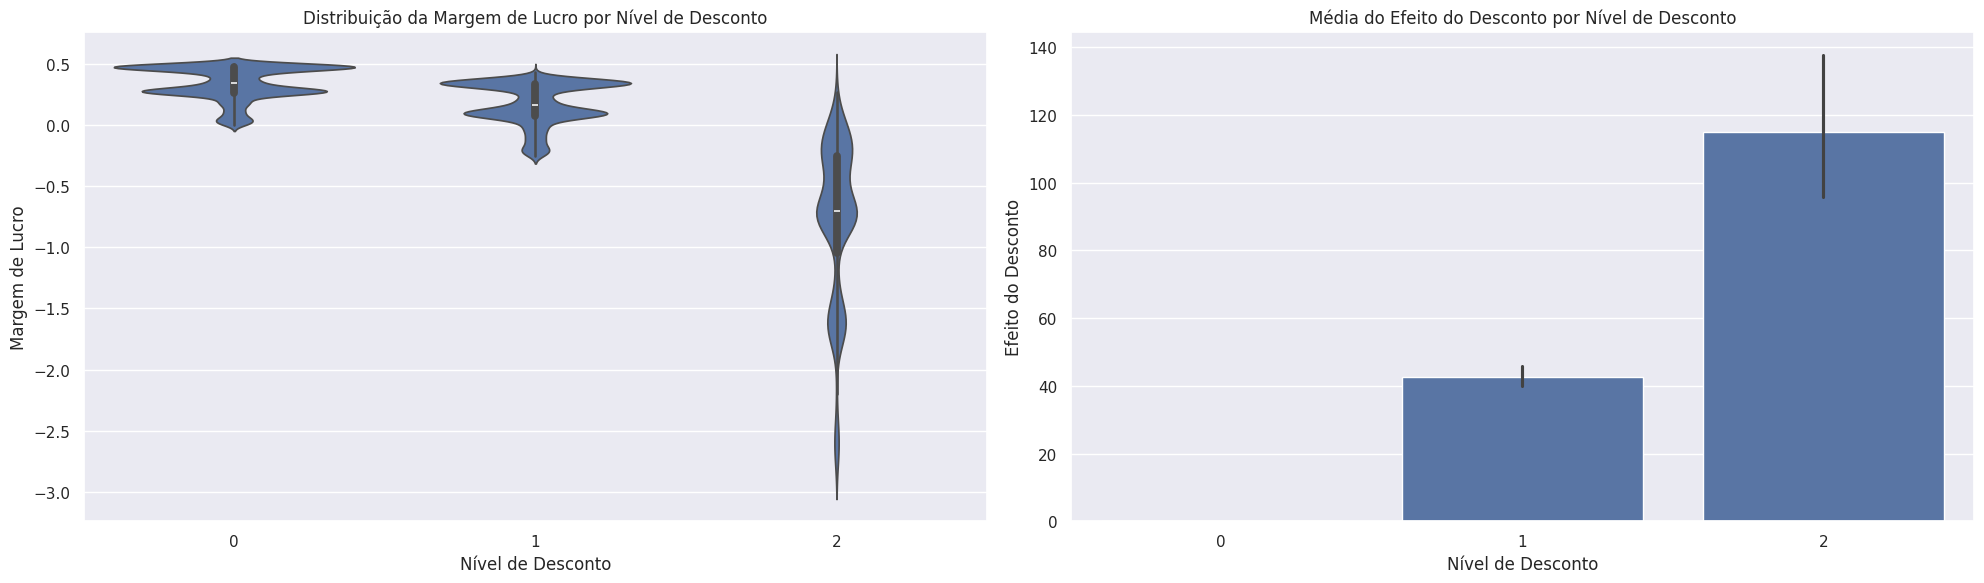

In [81]:
# Categorizar os descontos
discount_category = []
for i in df_fe['discount']:
    if i == 0:
        discount_category.append(0)
    elif i < 0.1:
        discount_category.append(9)
    elif i < 0.3:
        discount_category.append(1)
    else:
        discount_category.append(2)
df_fe['discount_level'] = discount_category

# Avaliar rentabilidade por venda (profit_margin = profit/sales)
df_fe['profit_margin'] = df_fe['profit'] / df_fe['sales']

# Medir o impacto real do desconto (discount_effect = sales - sales * (1 - discount))
df_fe['discount_effect'] = df_fe['sales'] - df_fe['sales'] * (1 - df_fe['discount'])

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.violinplot(ax=axes[0], x='discount_level', y='profit_margin', data=df_fe)
axes[0].set_title('Distribuição da Margem de Lucro por Nível de Desconto')
axes[0].set_xlabel('Nível de Desconto')
axes[0].set_ylabel('Margem de Lucro')

sns.barplot(ax=axes[1], x='discount_level', y='discount_effect', data=df_fe, estimator=np.mean)
axes[1].set_title('Média do Efeito do Desconto por Nível de Desconto')
axes[1].set_xlabel('Nível de Desconto')
axes[1].set_ylabel('Efeito do Desconto')

plt.tight_layout()
plt.show()

#### 2.4.2.2 Sazonalidade e Tendências

In [82]:
# order_month e order_year para analise temporal
df_fe['order_month'] = df_fe['order_date'].dt.month
df_fe['order_year'] = df_fe['order_date'].dt.year

# Quarter (trimestre) para avaliar sazonalidade: Q1, Q2, Q3, Q4
df_fe['quarter'] = df_fe['order_date'].dt.quarter

# holiday_season: 1 para compras entre novembro e dezembro, 0 para o resto
df_fe['holiday_season'] = 0
df_fe.loc[(df_fe['order_month'] == 11) | (df_fe['order_month'] == 12), 'holiday_season'] = 1

#### 2.4.2.3 Produtos Lucrativos

In [83]:
# Lucro medio por categoria
profit_by_category = df_fe.groupby('category').agg({'profit': 'mean'}).reset_index()

# Volume de vendas medio por categoria
sales_by_category = df_fe.groupby('category').agg({'sales': 'mean'}).reset_index()

# Lucratividade de cada unidade vendida
profit_per_unit = pd.merge(profit_by_category, sales_by_category, on='category', how='inner')
profit_per_unit['profit_per_unit'] = profit_per_unit['profit'] / profit_per_unit['sales']

In [84]:
profit_by_category

,category,profit
0,furniture,8.699327
1,office supplies,20.327050
2,tech,78.752002


In [85]:
sales_by_category

,category,sales
0,furniture,349.834887
1,office supplies,119.324101
2,tech,452.709276


In [86]:
profit_per_unit

,category,profit,sales,profit_per_unit
0,furniture,8.699327,349.834887,0.024867
1,office supplies,20.327050,119.324101,0.170352
2,tech,78.752002,452.709276,0.173957


### <font color='green'> 2.4.3 Clientes e Segmentos </font>

#### 2.4.3.1 Perfil de Compradores e Fidelidade

In [87]:
# Soma total das compras por cliente
total_spent_by_customer = df_fe.groupby('customer_id').agg({'sales': 'sum'}).reset_index()
total_spent_by_customer.columns = ['customer_id', 'total_spent']

# Numero total de compras por cliente
order_count_by_customer = df_fe.groupby('customer_id').agg({'order_id': 'count'}).reset_index()
order_count_by_customer.columns = ['customer_id', 'order_count']

# Media de gasto por compra
avg_order_value = pd.merge(total_spent_by_customer, order_count_by_customer, on='customer_id', how='inner')
avg_order_value['avg_order_value'] = avg_order_value['total_spent'] / avg_order_value['order_count']

# Classificar clientes em Baixa (<3 compras), Média (3-10 compras), Alta (>10 compras)
customer_category = []
for i in avg_order_value['order_count']:
    if i < 3:
        customer_category.append('Low')
    elif i < 10:
        customer_category.append('Medium')
    else:
        customer_category.append('High')

avg_order_value['customer_category'] = customer_category

avg_order_value.sort_values('total_spent', ascending=False).head()

,customer_id,total_spent,order_count,avg_order_value,customer_category
686,20320,25043.050,15,1669.536667,High
730,20980,19052.218,12,1587.684833,High
622,19360,15117.339,18,839.852167,High
757,21385,14595.620,10,1459.562000,High
6,10105,14473.571,20,723.678550,High


#### 2.4.3.2 Segmento e Produto

In [88]:
# Categoria mais comprada dentro de cada segmento
top_segment_category = df_fe.groupby(['segment', 'category']).agg({'order_id': 'count'}).reset_index()

# Margem de lucro media por segmento
segment_profitability = df_fe.groupby('segment').agg({'profit': 'mean'}).reset_index()

# Merge
top_segment_category = pd.merge(top_segment_category, segment_profitability, on='segment', how='inner')
top_segment_category.columns = ['segment', 'category', 'order_count', 'profit']

top_segment_category.sort_values('profit', ascending=False)

,segment,category,order_count,profit
6,homeof,furniture,362,33.818664
7,homeof,office supplies,1079,33.818664
8,homeof,tech,342,33.818664
3,corp,furniture,646,30.456667
4,corp,office supplies,1820,30.456667
5,corp,tech,554,30.456667
0,consumer,furniture,1113,25.836873
1,consumer,office supplies,3127,25.836873
2,consumer,tech,951,25.836873


### <font color='green'> 2.4.4 Logística e Envio </font>

#### 2.4.4.1 Tempo de Entrega e Impacto no Lucro

In [89]:
# Tempo de entrega
delivery_time = (df_fe['ship_date'] - df_fe['order_date']).dt.days

# Tempo de entrega rapido (<3 dias)
fast_delivery = []
for i in delivery_time:
    if i < 3:
        fast_delivery.append(1)
    else:
        fast_delivery.append(0)
df_fe['fast_delivery'] = fast_delivery

# Merge
top_category_fast_delivery = df_fe.groupby('category').agg({'fast_delivery': 'sum'}).reset_index()

top_category_delivery = top_category_fast_delivery.copy()
top_category_delivery['total_orders'] = df_fe['category'].value_counts().values
top_category_delivery['fast_delivery_rate'] = top_category_delivery['fast_delivery'] / top_category_delivery['total_orders']

top_category_delivery.sort_values('fast_delivery_rate', ascending=False)


,category,fast_delivery,total_orders,fast_delivery_rate
1,office supplies,1296,2121,0.611033
2,tech,423,1847,0.229020
0,furniture,503,6026,0.083472


#### 2.4.4.2 Ship Mode e Custo x Benefício

In [90]:
# Margem de lucro media por modalidade de envio
avg_profit_per_ship_mode = df_fe.groupby('ship_mode').agg({'profit': 'mean'}).reset_index()

# Total de vendas por modalidade de envio
sales_by_ship_mode = df_fe.groupby('ship_mode').agg({'sales': 'sum'}).reset_index()

# Merge
profit_per_ship_mode = pd.merge(avg_profit_per_ship_mode, sales_by_ship_mode, on='ship_mode', how='inner')
profit_per_ship_mode.columns = ['ship_mode', 'profit', 'sales']

profit_per_ship_mode['profit_per_unit'] = profit_per_ship_mode['profit'] / profit_per_ship_mode['sales']

profit_per_ship_mode.sort_values('profit_per_unit', ascending=False)

,ship_mode,profit,sales,profit_per_unit
1,same,29.266591,1.283631e+05,0.000228
0,first,31.839948,3.514284e+05,0.000091
2,second,29.535545,4.591936e+05,0.000064
3,standard,27.494770,1.358216e+06,0.000020


### <font color='green'> 2.4.5 Produtos e Demanda </font>

#### 2.4.5.1 Demanda por Categoria

In [91]:
# Vendas medias por categoria
avg_sales_per_category = df_fe.groupby('category').agg({'sales': 'mean'}).reset_index()

# Quantidade media vendida por categoria
avg_quantity_per_category = df_fe.groupby('category').agg({'quantity': 'mean'}).reset_index()

# Merge
sales_per_category = pd.merge(avg_sales_per_category, avg_quantity_per_category, on='category', how='inner')
sales_per_category.columns = ['category', 'avg_sales', 'avg_quantity']

sales_per_category.sort_values('avg_sales', ascending=False)

,category,avg_sales,avg_quantity
2,tech,452.709276,3.756903
0,furniture,349.834887,3.785007
1,office supplies,119.324101,3.801195


#### 2.4.5.2 Impacto de Descontos

In [92]:
# Vendas com desconto / Vendas total
discounted_sales_ratio = df_fe[df_fe['discount'] > 0].shape[0] / df_fe.shape[0]

# Lucro medio por produto com desconto
discount_profit_impact = df_fe[df_fe['discount'] > 0].groupby('product_name').agg({'profit': 'mean'}).reset_index()

discount_profit_impact.sort_values('profit', ascending=False).head()

,product_name,profit
357,Canon imageCLASS 2200 Advanced Copier,2519.992800
353,Canon PC1060 Personal Laser Copier,755.989200
354,Canon PC1080F Personal Copier,569.990500
351,Canon Imageclass D680 Copier / Fax,542.492250
1302,Sharp AL-1530CS Digital Copier,516.239675


In [93]:
discounted_sales_ratio

0.519911947168301

#### 2.4.5.3 Cross-Selling (Produtos Comprados Juntos)

In [94]:
# Produto mais comprado em cada segmento
most_frequent_product_by_segment = df_fe.groupby(['segment', 'product_name']).agg({'order_id': 'count'}).reset_index()
most_frequent_product_by_segment.columns = ['segment', 'product_name', 'order_count']

most_frequent_product_by_segment.sort_values('order_count', ascending=False).head()

,segment,product_name,order_count
1373,consumer,Staple envelope,29
492,consumer,Easy-staple paper,21
1378,consumer,Staples,20
2887,corp,Staples,18
2881,corp,Staple envelope,17


### <font color='green'> 2.4.6 Lista final de Features </font>

| Nova Feature                | Objetivo                                      | Utilizada em          |
|-----------------------------|-----------------------------------------------|-----------------------|
| delivery_time               | Avaliar impacto da logística                  | Logística e Envio     |
| profit_margin               | Medir rentabilidade real                      | Vendas e Lucro        |
| discount_category           | Impacto de diferentes faixas de desconto      | Vendas e Lucro        |
| total_spent_by_customer     | Analisar valor gasto por cliente              | Clientes e Segmentos  |
| order_count_by_customer     | Identificar clientes recorrentes              | Clientes e Segmentos  |
| avg_order_value             | Entender ticket médio por cliente             | Clientes e Segmentos  |
| sales_by_ship_mode          | Analisar volume de vendas por envio           | Logística e Envio     |
| avg_profit_per_ship_mode    | Rentabilidade de cada modalidade de envio     | Logística e Envio     |
| top_segment_category        | Categoria favorita de cada segmento           | Clientes e Segmentos  |
| most_frequent_product...    | Produtos mais populares por perfil de cliente | Produtos e Clientes   |
| discount_profit_impact      | Medir o efeito real dos descontos no lucro    | Produtos              |

# <font color='red'> 3.0 Filtragem de variáveis </font>

In [43]:
df_filter_columns = df_fe.copy()

## 3.1 Filtragem das linhas e seleção das colunas

In [44]:
df_filter_columns = df_filter_columns.drop(['order_date', 'ship_date', 'city', 'state', 'postal_code', 'product_name'], axis=1)

# <font color='red'> 4.0 Analise Exploratória dos Dados (EDA) </font>

In [45]:
df_eda = df_filter_columns.copy()

## <font color='yellow'> 4.1 Analise Univariada </font>

### 4.1.1 Sales Variable

<Axes: xlabel='sales'>

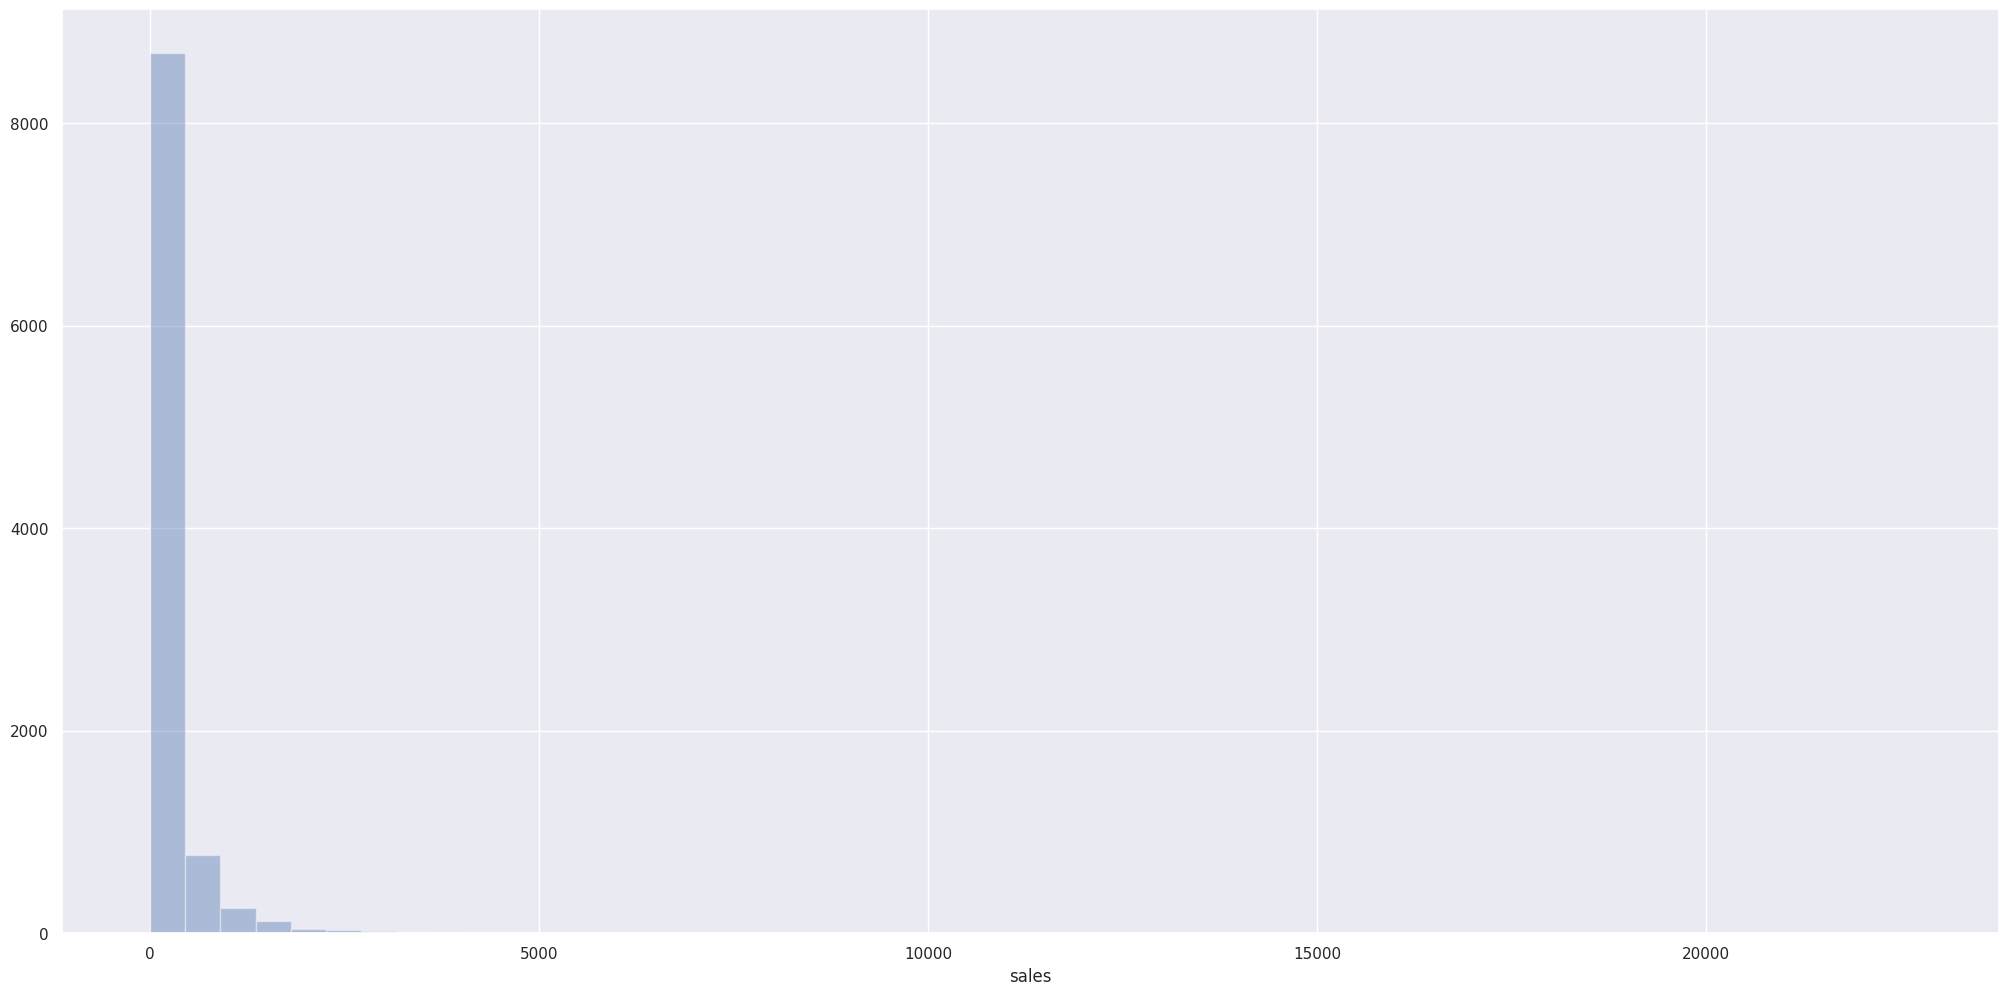

In [46]:
sns.distplot( df_fe['sales'], kde=False  )

### 4.1.2 Numerical Variable

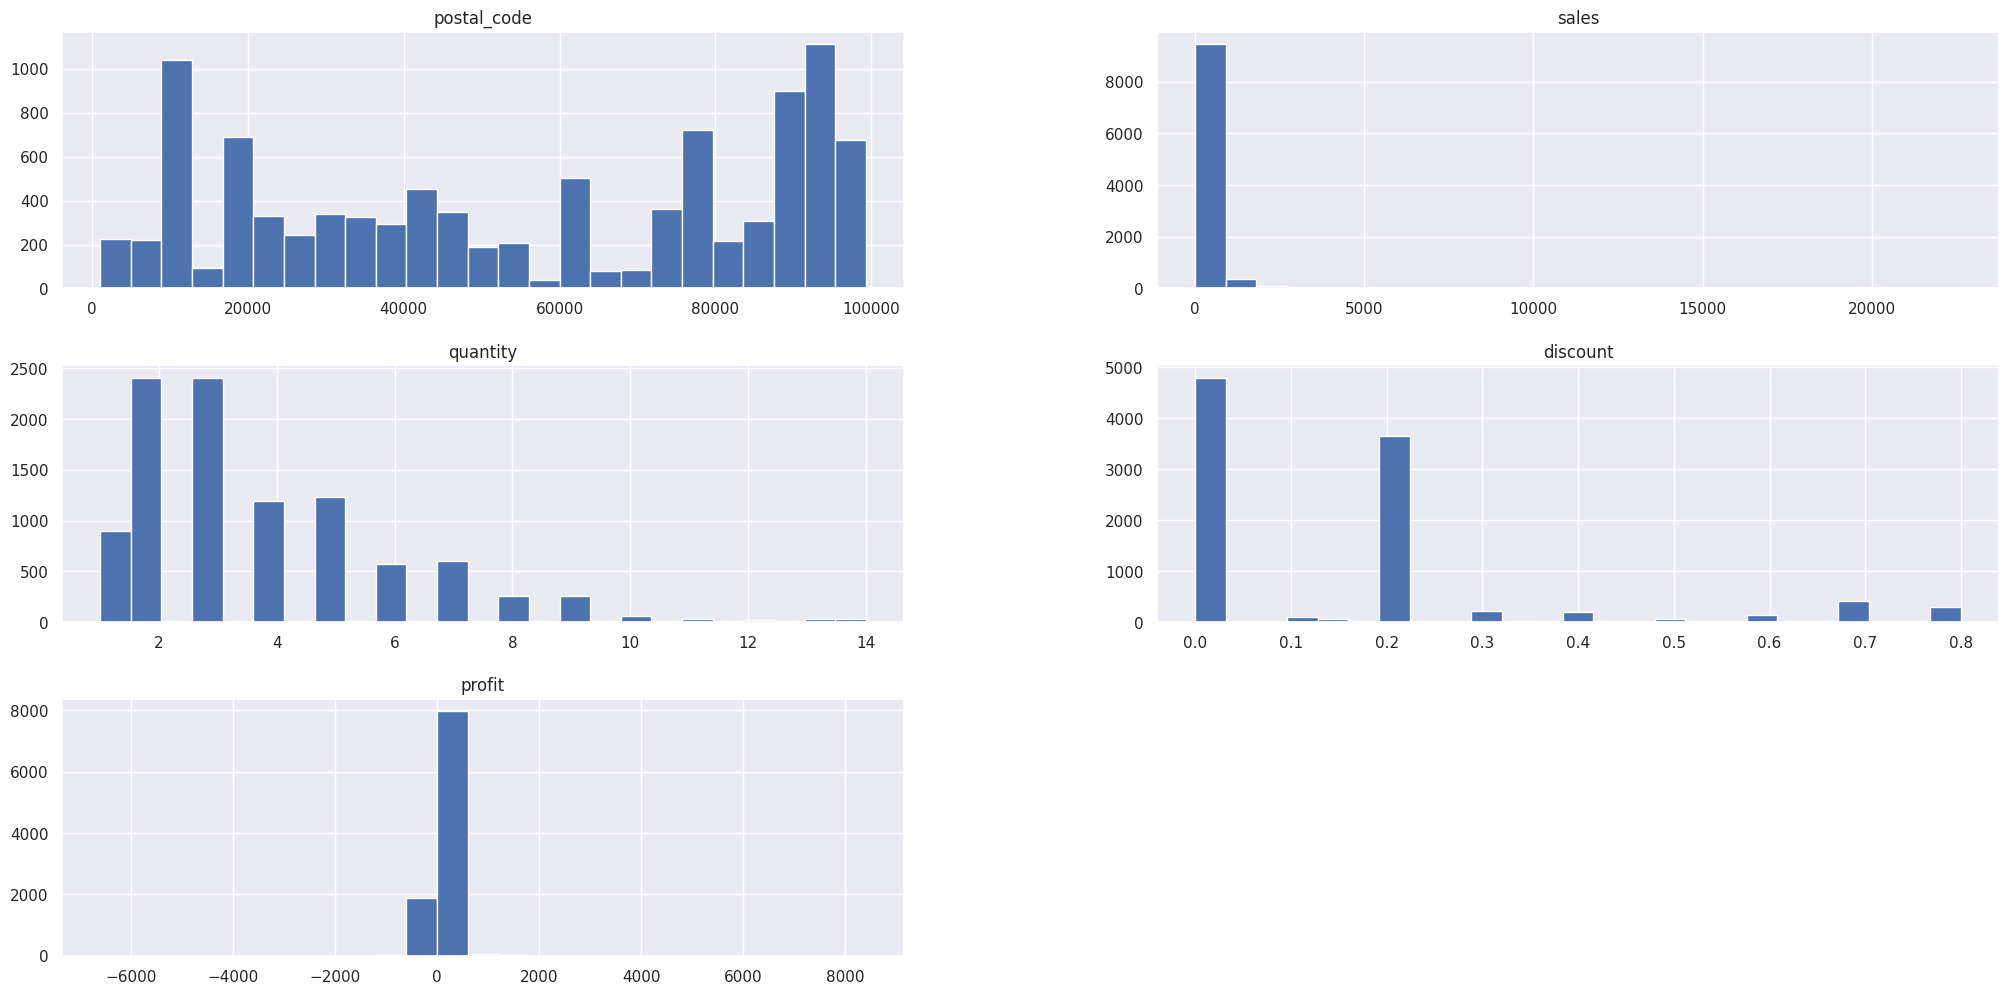

In [47]:
df_fe[numerical_columns].hist(bins=25);

### 4.1.3 Categorical Variable

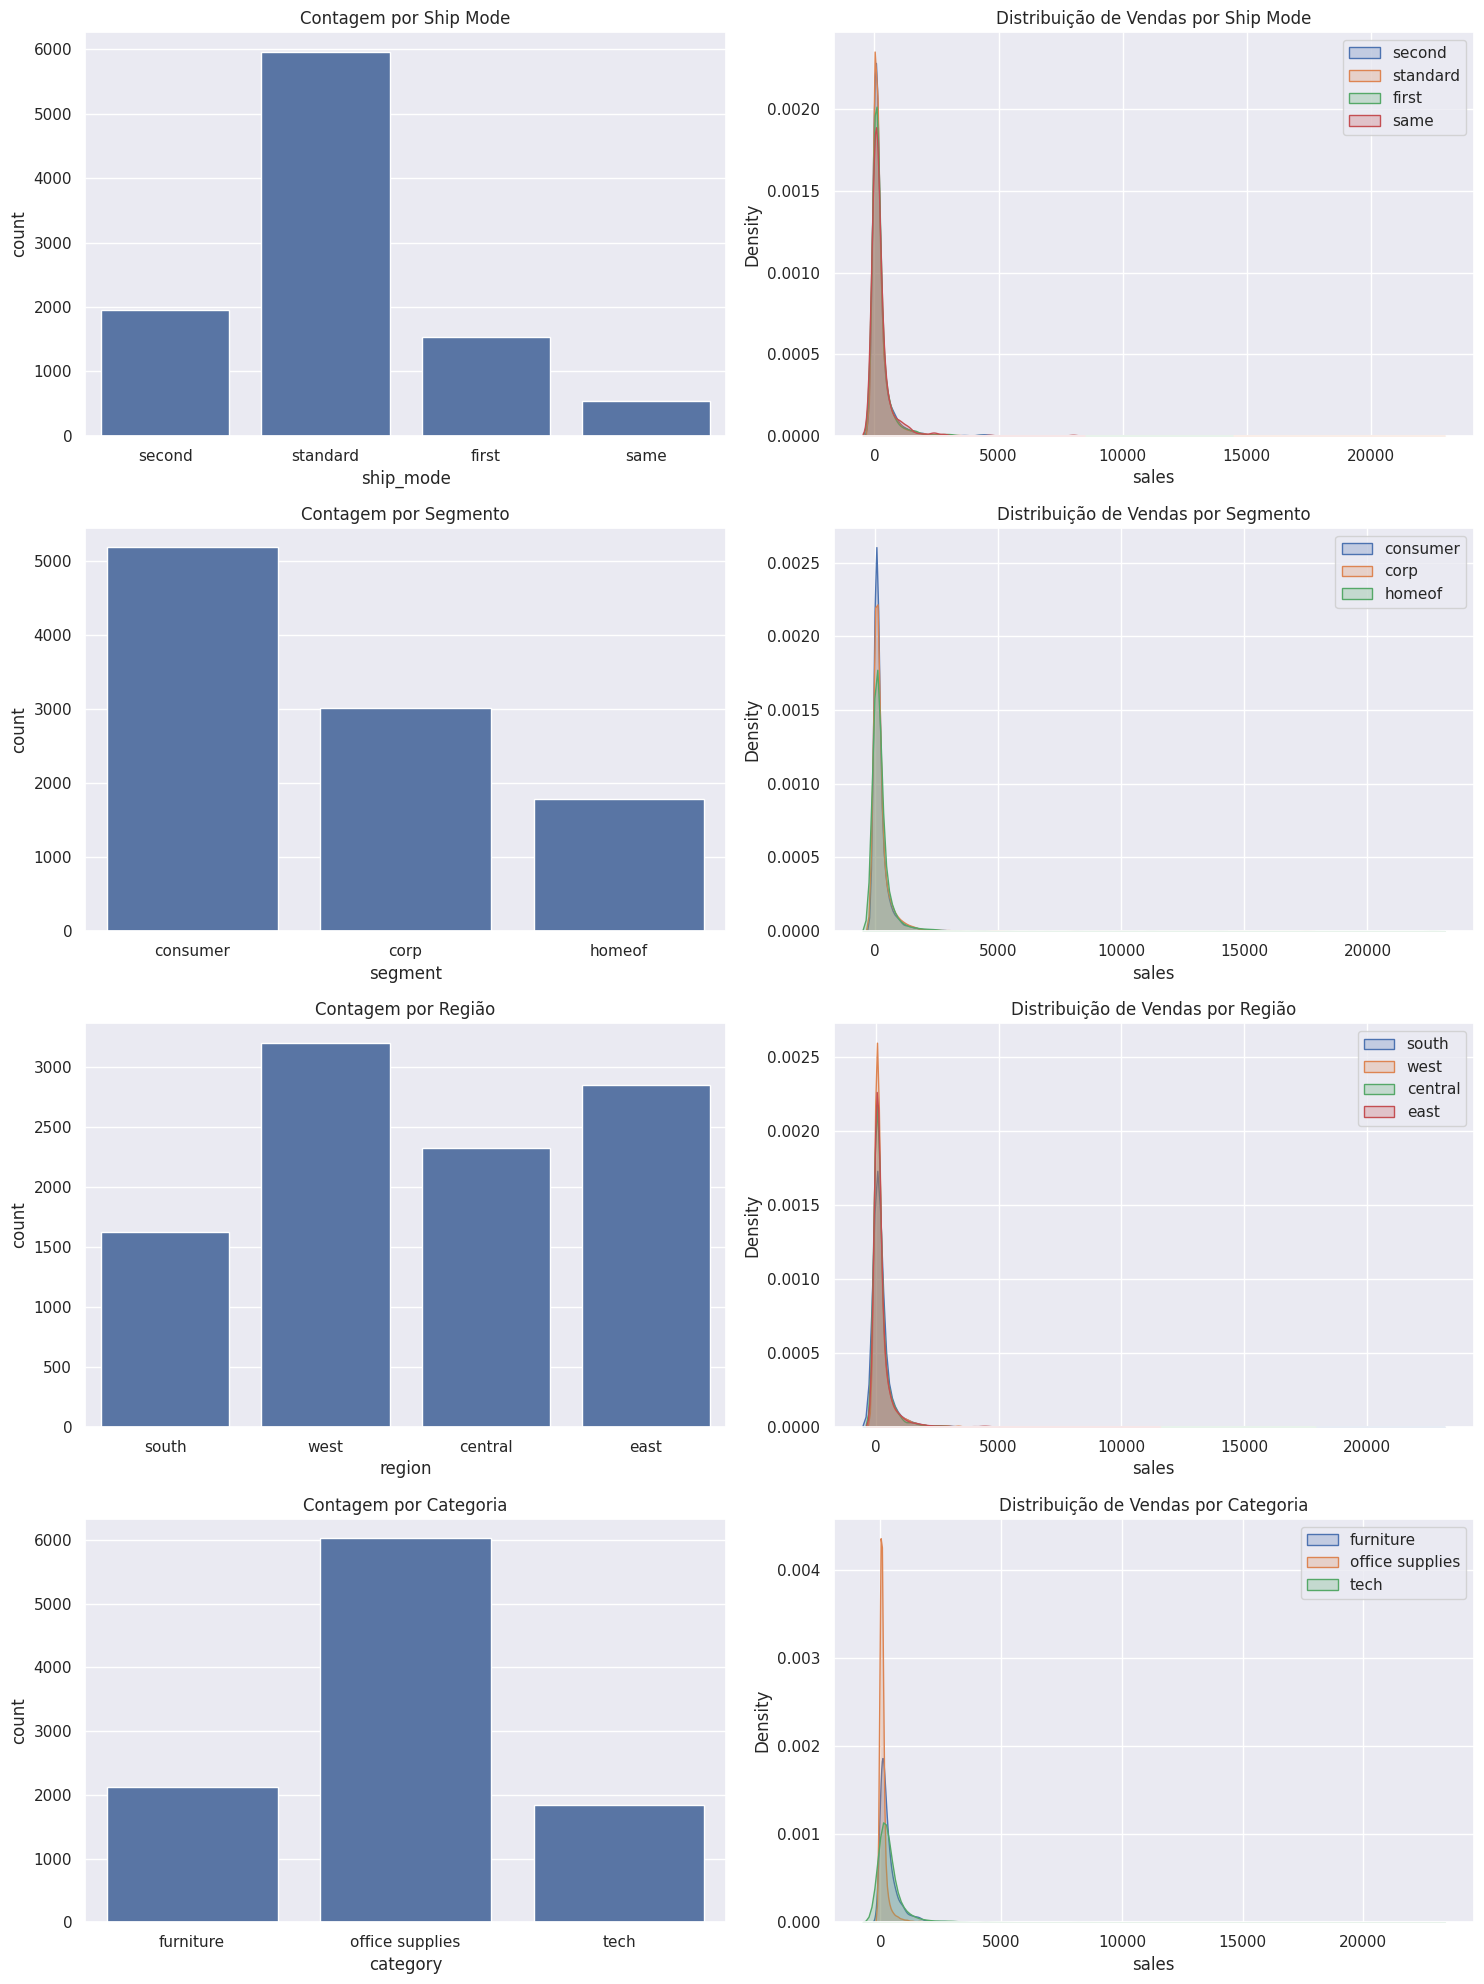

In [48]:
columns = ['ship_mode', 'segment', 'region', 'category']
titles = ['Ship Mode', 'Segmento', 'Região', 'Categoria']

plt.figure(figsize=(15, 20))

for i, col in enumerate(columns):
    # Gráfico de contagem
    plt.subplot(4, 2, 2*i + 1)
    sns.countplot(x=col, data=df_eda)
    plt.title(f'Contagem por {titles[i]}')

    # Gráfico de distribuição de vendas
    plt.subplot(4, 2, 2*i + 2)
    for value in df_eda[col].unique():
        sns.kdeplot(df_eda[df_eda[col] == value]['sales'], label=value, shade=True)
    plt.title(f'Distribuição de Vendas por {titles[i]}')
    plt.legend()

plt.tight_layout()
plt.show()

## <font color='yellow'> 4.2 Validação de Hipoteses </font>

### **H1.** Descontos acima de 20% reduzem significativamente o lucro, apesar do aumento no volume de vendas.
<font color='green'> **VERDADEIRO** </font>

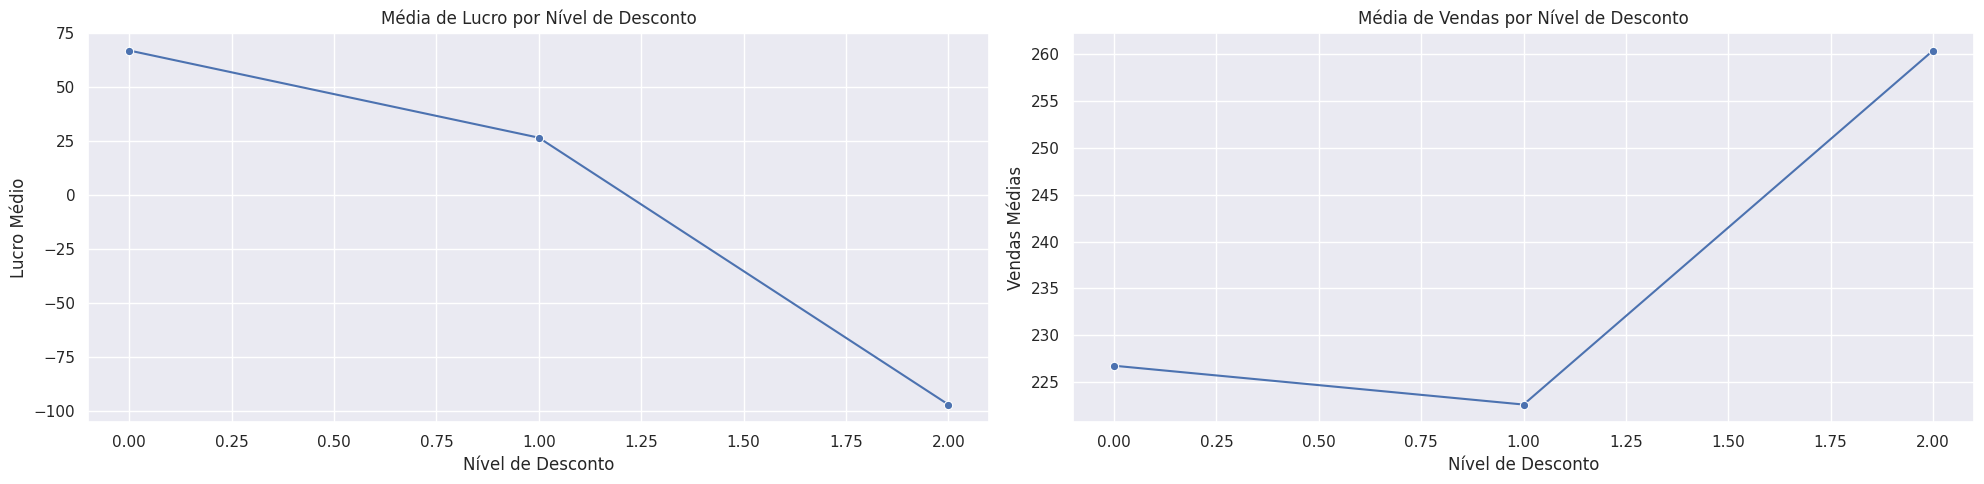

In [49]:
# Lucro e Volume de Vendas por Nível de Desconto
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Lucro
aux1 = df_eda[['discount_level', 'profit']].groupby('discount_level').mean().reset_index()
sns.lineplot(ax=axes[0], x='discount_level', y='profit', data=aux1, marker='o')
axes[0].set_title('Média de Lucro por Nível de Desconto')
axes[0].set_xlabel('Nível de Desconto')
axes[0].set_ylabel('Lucro Médio')
axes[0].grid(True)

# Volume de vendas
aux2 = df_eda[['discount_level', 'sales']].groupby('discount_level').mean().reset_index()
sns.lineplot(ax=axes[1], x='discount_level', y='sales', data=aux2, marker='o')
axes[1].set_title('Média de Vendas por Nível de Desconto')
axes[1].set_xlabel('Nível de Desconto')
axes[1].set_ylabel('Vendas Médias')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### **H2.** Vendas e lucros são maiores no quarto trimestre devido às compras de fim de ano.
<font color='red'> **FALSO** As vendas e lucros são maiores no início do ano. </font>

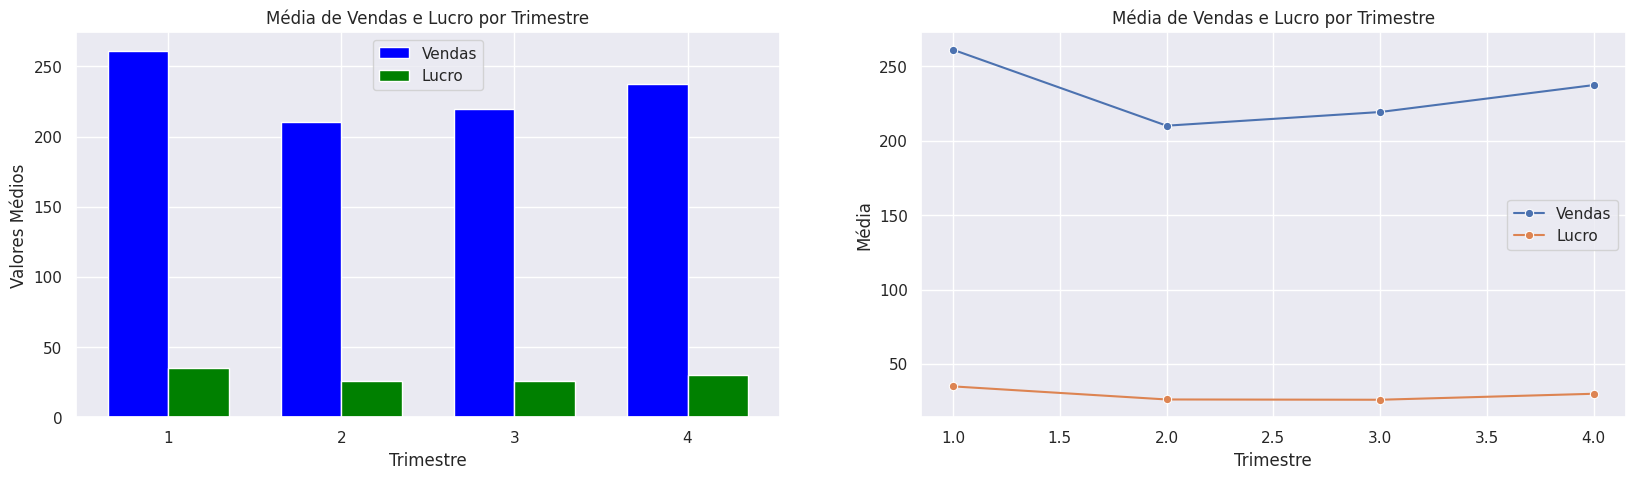

In [50]:
# Agrupar por trimestre e calcular a média de vendas e lucro
aux1 = df_eda.groupby('quarter')[['sales', 'profit']].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

bar_width = 0.35
index = aux1['quarter']

ax1.bar(index, aux1['sales'], bar_width, label='Vendas', color='blue')
ax1.bar(index + bar_width, aux1['profit'], bar_width, label='Lucro', color='green')

ax1.set_xlabel('Trimestre')
ax1.set_ylabel('Valores Médios')
ax1.set_title('Média de Vendas e Lucro por Trimestre')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(aux1['quarter'])
ax1.legend()

sns.lineplot(x='quarter', y='sales', data=aux1, marker='o', label='Vendas', ax=ax2)
sns.lineplot(x='quarter', y='profit', data=aux1, marker='o', label='Lucro', ax=ax2)

ax2.set_title('Média de Vendas e Lucro por Trimestre')
ax2.set_xlabel('Trimestre')
ax2.set_ylabel('Média')
ax2.grid(True)
ax2.legend()

plt.show()

### **H3.** A categoria "Office Supplies" tem margens de lucro maiores em comparação com "Furniture" e "Technology".
<font color='red'> **FALSO**  Tecnologia tem margens de lucro maiores. </font>

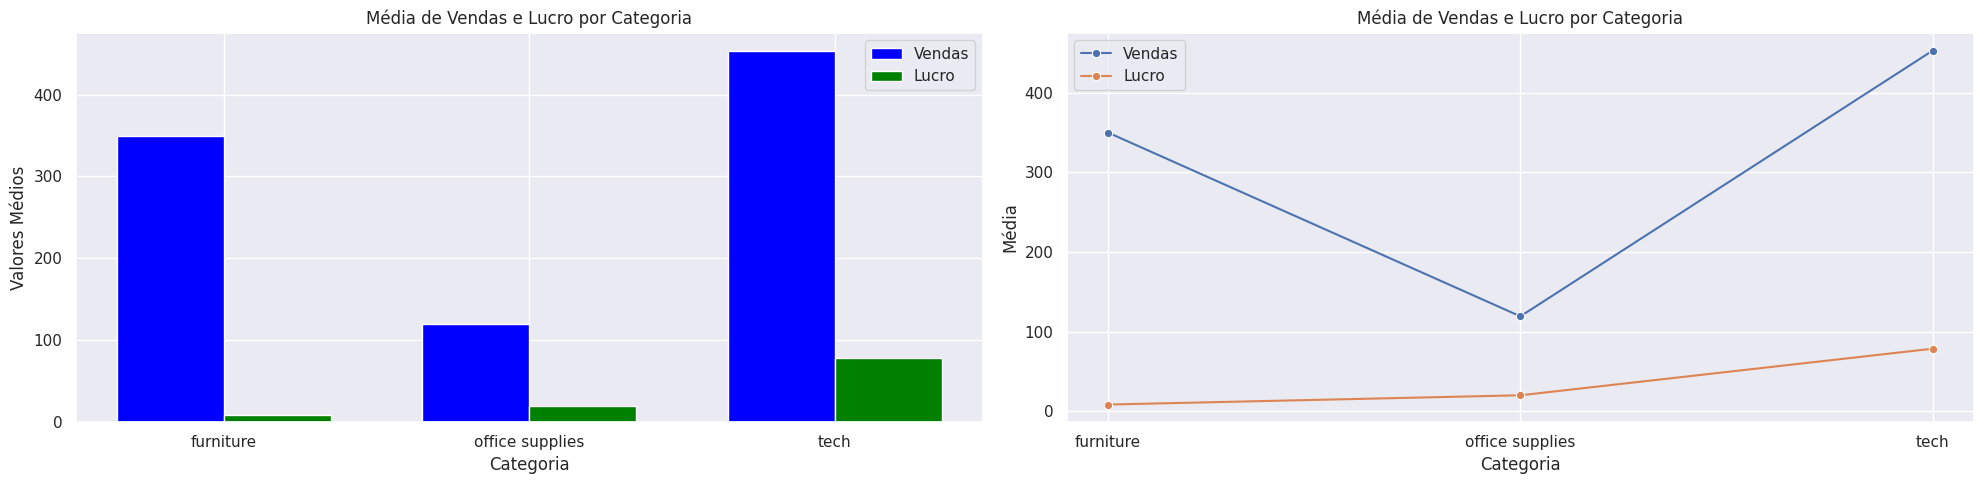

In [51]:
# Vendas e lucro por categoria
aux1 = df_eda[['category', 'sales', 'profit']].groupby('category').mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Gráfico de barras
bar_width = 0.35
index = range(len(aux1['category']))

axes[0].bar(index, aux1['sales'], bar_width, label='Vendas', color='blue')
axes[0].bar([i + bar_width for i in index], aux1['profit'], bar_width, label='Lucro', color='green')
axes[0].set_xlabel('Categoria')
axes[0].set_ylabel('Valores Médios')
axes[0].set_title('Média de Vendas e Lucro por Categoria')
axes[0].set_xticks([i + bar_width / 2 for i in index])
axes[0].set_xticklabels(aux1['category'])
axes[0].legend()

# Gráfico de linhas
sns.lineplot(x='category', y='sales', data=aux1, marker='o', label='Vendas', ax=axes[1])
sns.lineplot(x='category', y='profit', data=aux1, marker='o', label='Lucro', ax=axes[1])
axes[1].set_title('Média de Vendas e Lucro por Categoria')
axes[1].set_xlabel('Categoria')
axes[1].set_ylabel('Média')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


### **H4.** O segmento "Corporate" gasta mais por pedido, mas o segmento "Consumer" tem maior volume de pedidos.
<font color='red'> **FALSO** O segmento corporate obtem mais lucro por pedido e maior volume de pedidos. </font>

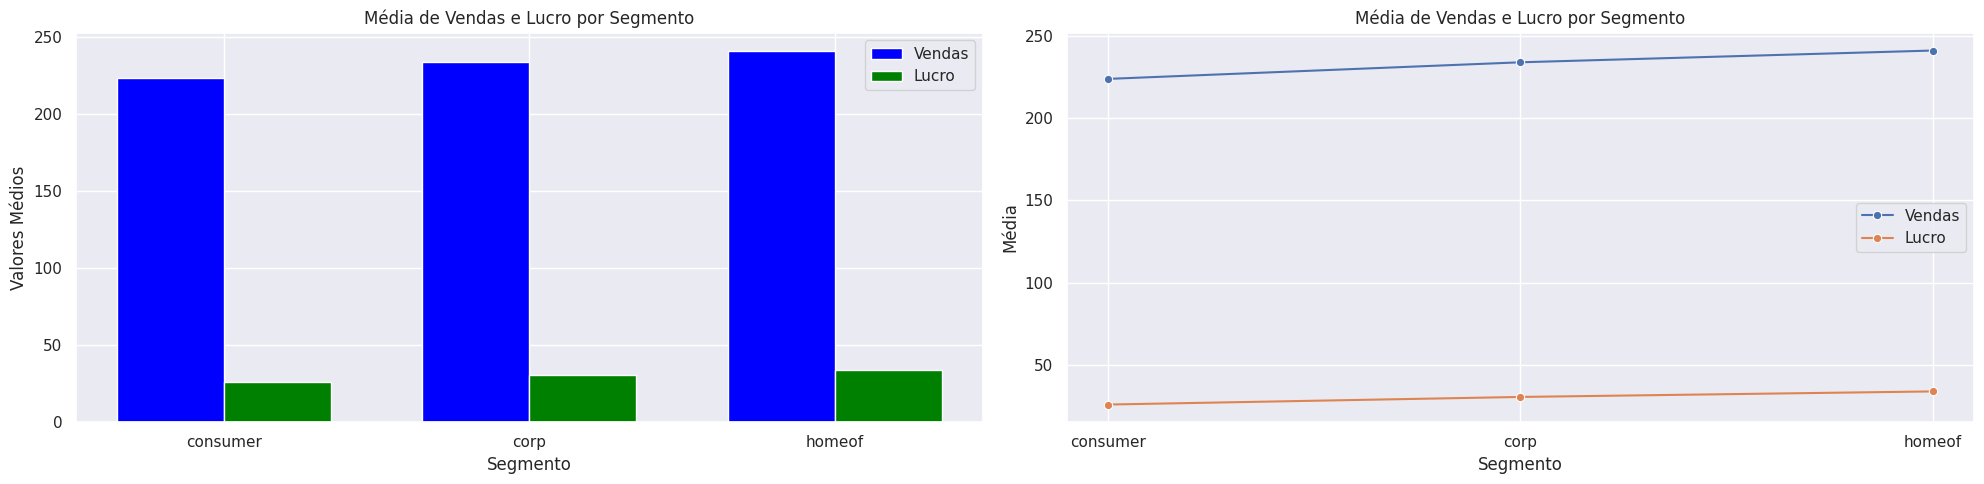

In [52]:
# Vendas e lucro por segmento
aux1 = df_eda[['segment', 'sales', 'profit']].groupby('segment').mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Gráfico de barras
bar_width = 0.35
index = range(len(aux1['segment']))

axes[0].bar(index, aux1['sales'], bar_width, label='Vendas', color='blue')
axes[0].bar([i + bar_width for i in index], aux1['profit'], bar_width, label='Lucro', color='green')

axes[0].set_xlabel('Segmento')
axes[0].set_ylabel('Valores Médios')
axes[0].set_title('Média de Vendas e Lucro por Segmento')
axes[0].set_xticks([i + bar_width / 2 for i in index])
axes[0].set_xticklabels(aux1['segment'])
axes[0].legend()

# Gráfico de linhas
sns.lineplot(x='segment', y='sales', data=aux1, marker='o', label='Vendas', ax=axes[1])
sns.lineplot(x='segment', y='profit', data=aux1, marker='o', label='Lucro', ax=axes[1])

axes[1].set_title('Média de Vendas e Lucro por Segmento')
axes[1].set_xlabel('Segmento')
axes[1].set_ylabel('Média')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

### **H5.** Clientes recorrentes representam uma porcentagem significativa das vendas totais.
<font color='green'> **VERDADEIRO** Clientes recorrentes representam 99.95% das vendas. </font>

Porcentagem de vendas realizadas por clientes recorrentes: 99.95%


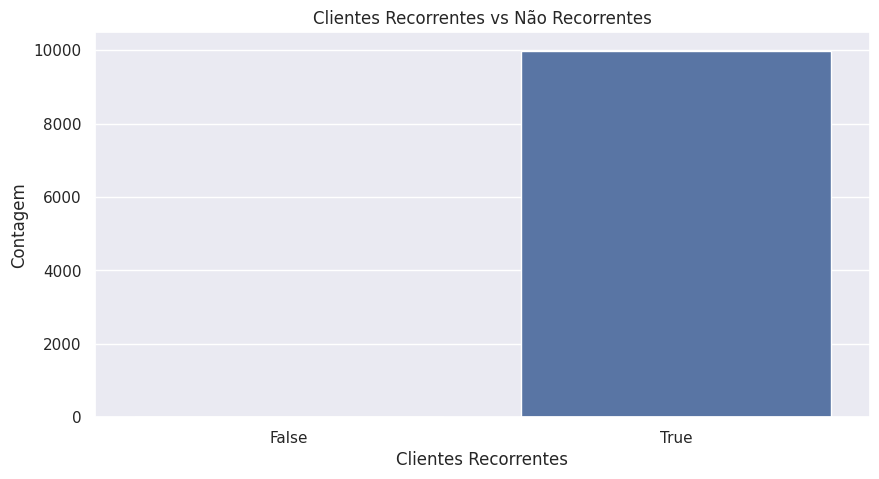

In [53]:
# Número total de compras por cliente
order_count_by_customer = df_eda.groupby('customer_id').agg({'order_id': 'count'}).reset_index()
order_count_by_customer.columns = ['customer_id', 'order_count']

# Clientes em recorrentes (mais de uma compra) e não recorrentes (uma compra)
order_count_by_customer['is_recurring'] = order_count_by_customer['order_count'] > 1

# Vendas por cliente
aux1 = pd.merge(df_eda, order_count_by_customer[['customer_id', 'is_recurring']], on='customer_id', how='left')

# Vendas totais
total_sales = aux1['sales'].sum()

# Vendas realizadas por clientes recorrentes
recurring_sales = aux1[aux1['is_recurring'] == True]['sales'].sum()

# Porcentagem de vendas realizadas por clientes recorrentes
recurring_sales_percentage = (recurring_sales / total_sales) * 100

print(f"Porcentagem de vendas realizadas por clientes recorrentes: {recurring_sales_percentage:.2f}%")

# Plotar o gráfico de barras
plt.figure(figsize=(10, 5))
sns.countplot(x='is_recurring', data=aux1)
plt.title('Clientes Recorrentes vs Não Recorrentes')
plt.xlabel('Clientes Recorrentes')
plt.ylabel('Contagem')
plt.show()

### **H6.** O segmento "Home Office" apresenta margens de lucro mais altas devido a compras de menor volume e menor desconto.
<font color='green'> **VERDADEIRO** O segmento "Home Office" possui maior margem de lucro média, menor desconto médio e maior ticket médio. Além de menor volume de compra dentro de cada categoria. </font>

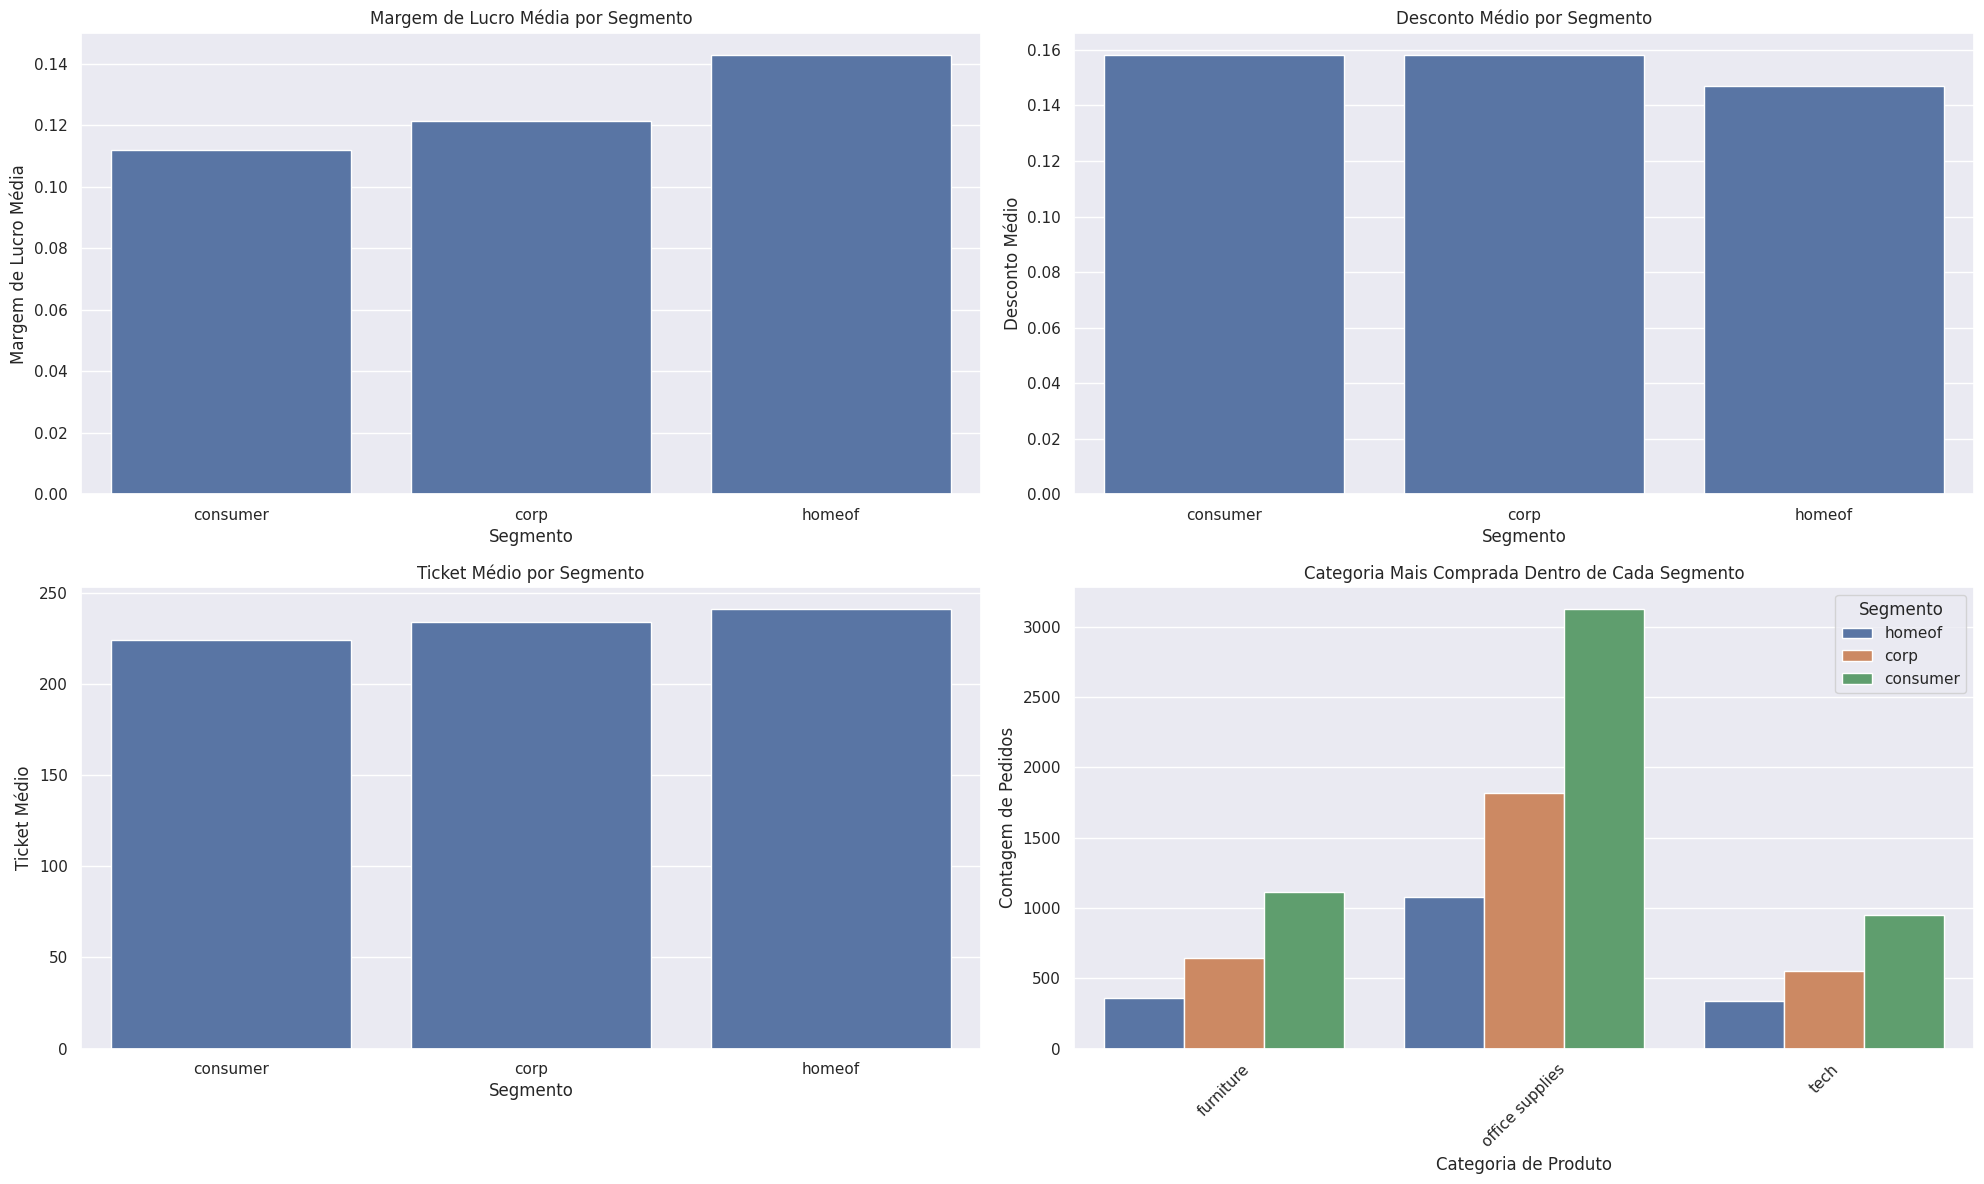

In [54]:
aux1 = df_eda.copy()

# Margem de lucro
aux1['profit_margin'] = aux1['profit'] / aux1['sales']

# Ticket médio por cliente
avg_order_value = aux1.groupby('customer_id').agg(total_spent=('sales', 'sum'), order_count=('order_id', 'count')).reset_index()
avg_order_value['avg_order_value'] = avg_order_value['total_spent'] / avg_order_value['order_count']

aux1 = aux1.merge(avg_order_value[['customer_id', 'avg_order_value']], on='customer_id', how='left')

segment_analysis = aux1.groupby('segment').agg(profit_margin=('profit_margin', 'mean'), discount=('discount', 'mean'), avg_order_value=('avg_order_value', 'mean')).reset_index()

# Categoria mais comprada dentro de cada segmento
top_segment_category = aux1.groupby(['segment', 'category']).agg(order_count=('order_id', 'count')).reset_index()

# Margem de lucro média por segmento
segment_profitability = aux1.groupby('segment').agg(profit=('profit', 'mean')).reset_index()

top_segment_category = top_segment_category.merge(segment_profitability, on='segment', how='inner').sort_values('profit', ascending=False)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Margem de lucro média por segmento
sns.barplot(x='segment', y='profit_margin', data=segment_analysis, ax=axes[0, 0])
axes[0, 0].set_title('Margem de Lucro Média por Segmento')
axes[0, 0].set_xlabel('Segmento')
axes[0, 0].set_ylabel('Margem de Lucro Média')

# Desconto médio por segmento
sns.barplot(x='segment', y='discount', data=segment_analysis, ax=axes[0, 1])
axes[0, 1].set_title('Desconto Médio por Segmento')
axes[0, 1].set_xlabel('Segmento')
axes[0, 1].set_ylabel('Desconto Médio')

# Ticket médio por segmento
sns.barplot(x='segment', y='avg_order_value', data=segment_analysis, ax=axes[1, 0])
axes[1, 0].set_title('Ticket Médio por Segmento')
axes[1, 0].set_xlabel('Segmento')
axes[1, 0].set_ylabel('Ticket Médio')

# Categoria mais comprada dentro de cada segmento
sns.barplot(x='category', y='order_count', hue='segment', data=top_segment_category, ax=axes[1, 1])
axes[1, 1].set_title('Categoria Mais Comprada Dentro de Cada Segmento')
axes[1, 1].set_xlabel('Categoria de Produto')
axes[1, 1].set_ylabel('Contagem de Pedidos')
axes[1, 1].legend(title='Segmento')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


### **H7.** A modalidade "Second Class" é a mais utilizada, mas "Same Day" gera maior ticket médio.
<font color='red'> **FALSO** A modalidade "Standard Class" é a mais utilizada e o "Second Class" gera maior ticket médio. </font>

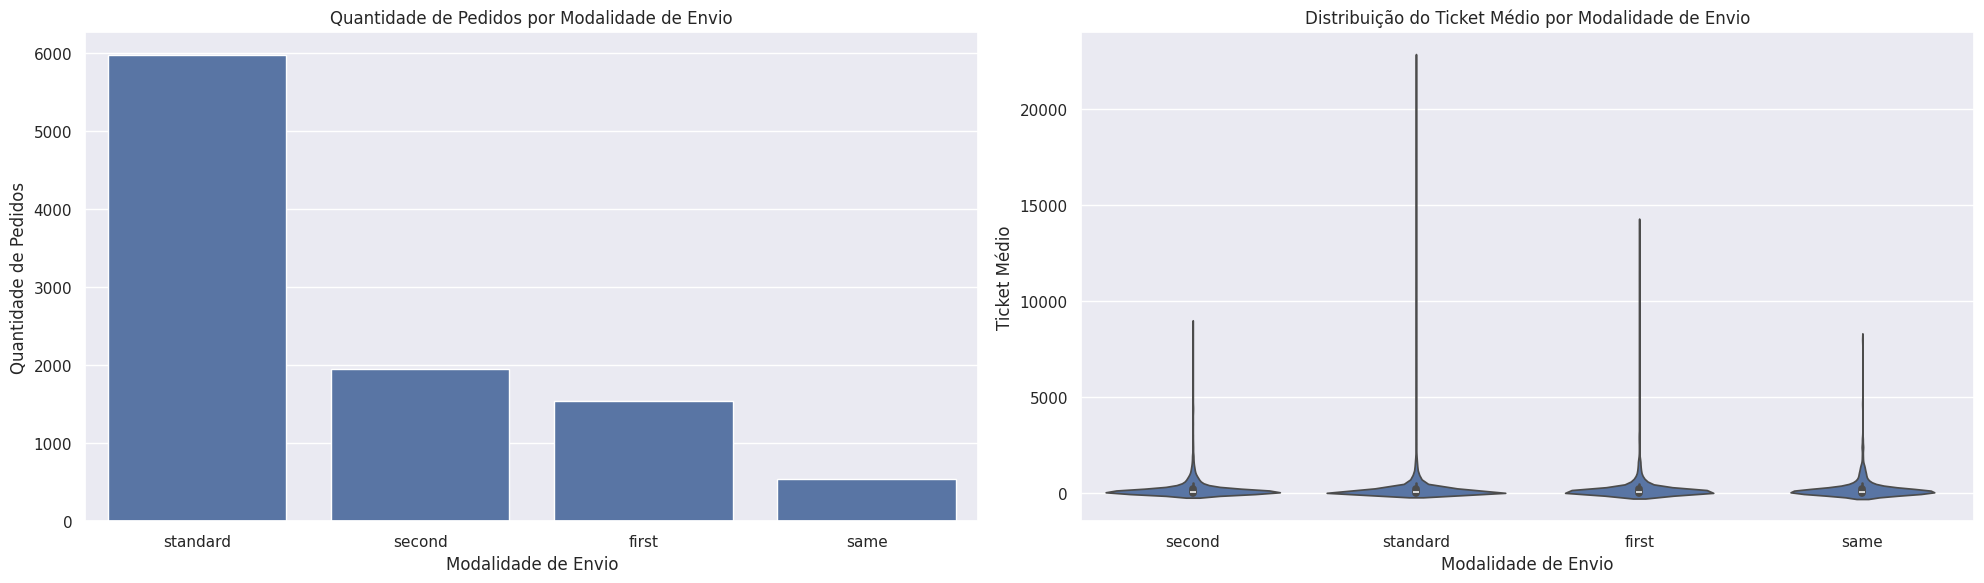

In [55]:
aux1 = df_eda.copy()

# Quantidade de pedidos por modalidade de envio
ship_mode_counts = aux1['ship_mode'].value_counts().reset_index()
ship_mode_counts.columns = ['ship_mode', 'order_count']

# Ticket médio por modalidade de envio
avg_ticket_by_ship_mode = aux1.groupby('ship_mode').agg({'sales': 'mean'}).reset_index()
avg_ticket_by_ship_mode.columns = ['ship_mode', 'avg_ticket']

# Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Quantidade de pedidos por modalidade de envio
sns.barplot(x='ship_mode', y='order_count', data=ship_mode_counts, ax=axes[0])
axes[0].set_title('Quantidade de Pedidos por Modalidade de Envio')
axes[0].set_xlabel('Modalidade de Envio')
axes[0].set_ylabel('Quantidade de Pedidos')

# Ticket médio por modalidade de envio
sns.violinplot(x='ship_mode', y='sales', data=aux1, ax=axes[1])
axes[1].set_title('Distribuição do Ticket Médio por Modalidade de Envio')
axes[1].set_xlabel('Modalidade de Envio')
axes[1].set_ylabel('Ticket Médio')

plt.tight_layout()
plt.show()

### **H8.** Pedidos com maior tempo de entrega têm maior taxa de devolução ou menor margem de lucro.
<font color='green'> **VERDADEIRO** Pedidos com 4 e 7 dias de entrega tem menor margem de lucro média. </font>

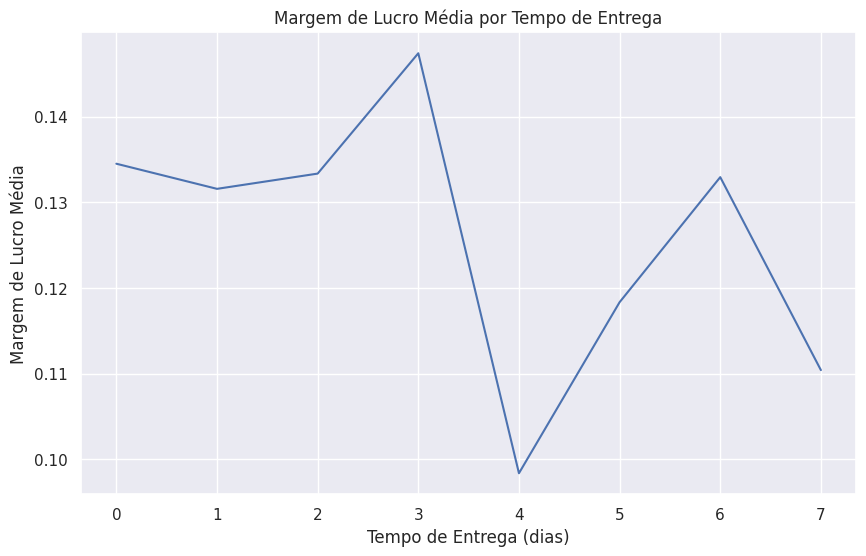

In [56]:
aux1 = df_eda.copy()

# Margem de lucro
aux1['profit_margin'] = aux1['profit'] / aux1['sales']

# Margem de lucro média por tempo de entrega
profit_margin_by_delivery_time = aux1.groupby('lead_time').agg({'profit_margin': 'mean'}).reset_index()
profit_margin_by_delivery_time.columns = ['delivery_time', 'avg_profit_margin']

# Plot da margem de lucro média por tempo de entrega
plt.figure(figsize=(10, 6))
sns.lineplot(x='delivery_time', y='avg_profit_margin', data=profit_margin_by_delivery_time)
plt.title('Margem de Lucro Média por Tempo de Entrega')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Margem de Lucro Média')
plt.show()

### **H9.** "First Class" apresenta margens de lucro menores devido ao custo mais alto de envio.
<font color='red'> **FALSO** "Standard Class" apresenta menor margem de lucro, seguido por "First Class" em segundo lugar de menor margem de lucro. </font>

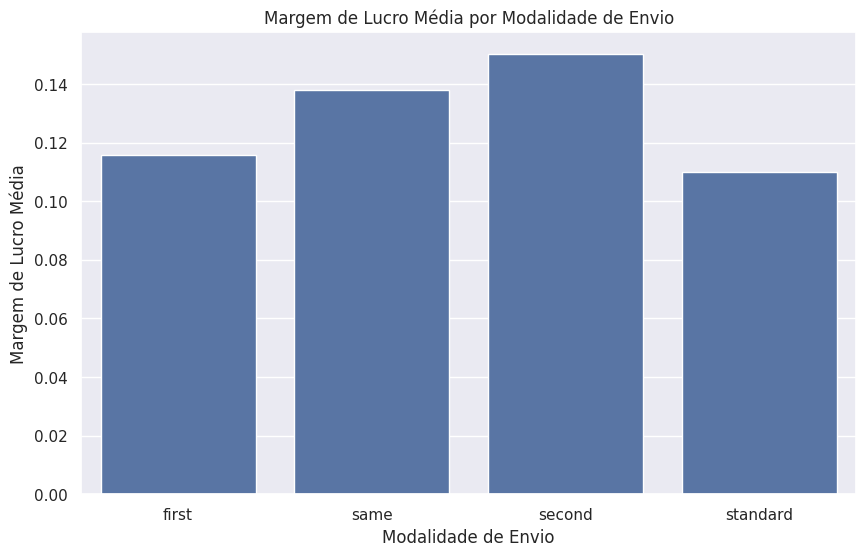

In [57]:
aux1 = df_eda.copy()

# Margem de lucro
aux1['profit_margin'] = aux1['profit'] / aux1['sales']

# Margem de lucro média por modalidade de envio
profit_margin_by_ship_mode = aux1.groupby('ship_mode').agg({'profit_margin': 'mean'}).reset_index()
profit_margin_by_ship_mode.columns = ['ship_mode', 'avg_profit_margin']

# Plot margem de lucro média por modalidade de envio
plt.figure(figsize=(10, 6))
sns.barplot(x='ship_mode', y='avg_profit_margin', data=profit_margin_by_ship_mode)
plt.title('Margem de Lucro Média por Modalidade de Envio')
plt.xlabel('Modalidade de Envio')
plt.ylabel('Margem de Lucro Média')
plt.show()

### **H10.** A categoria "Office Supplies" tem maior quantidade vendida, mas "Furniture" gera mais receita por unidade.
<font color='orange'> **VERDADEIRO/FALSO** "Office Supplies" tem maior quantidade vendida, mas "Tech" gera mais receita. </font>

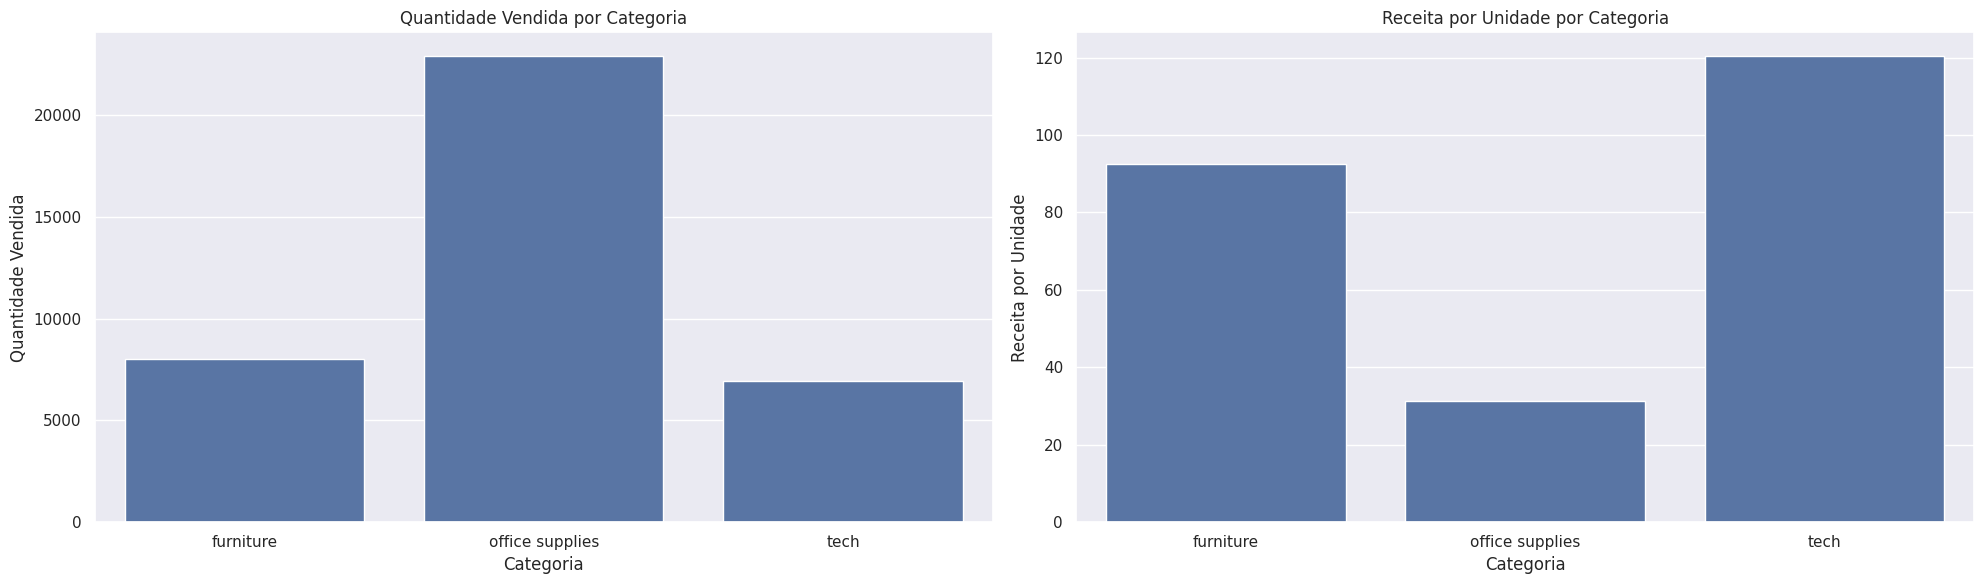

In [58]:
aux1 = df_eda.copy()

# Quantidade vendida por categoria
quantity_by_category = aux1.groupby('category').agg({'quantity': 'sum'}).reset_index()
quantity_by_category.columns = ['category', 'total_quantity']

# Receita por unidade para cada categoria
revenue_by_category = aux1.groupby('category').agg({'sales': 'sum', 'quantity': 'sum'}).reset_index()
revenue_by_category['revenue_per_unit'] = revenue_by_category['sales'] / revenue_by_category['quantity']


fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Quantidade vendida por categoria
sns.barplot(x='category', y='total_quantity', data=quantity_by_category, ax=axes[0])
axes[0].set_title('Quantidade Vendida por Categoria')
axes[0].set_xlabel('Categoria')
axes[0].set_ylabel('Quantidade Vendida')

# Receita por unidade para cada categoria
sns.barplot(x='category', y='revenue_per_unit', data=revenue_by_category, ax=axes[1])
axes[1].set_title('Receita por Unidade por Categoria')
axes[1].set_xlabel('Categoria')
axes[1].set_ylabel('Receita por Unidade')

plt.tight_layout()
plt.show()

### **H11.** Descontos em "Chairs" aumentam significativamente as vendas, mas afetam negativamente o lucro.
<font color='green'> **VERDADEIRO** 0% de desconto tem mais de 0.20 de lucro medio, 0-10% tem 0.04 de lucro medio e 10-30% tem mais de -0.10 de lucro medio. </font>

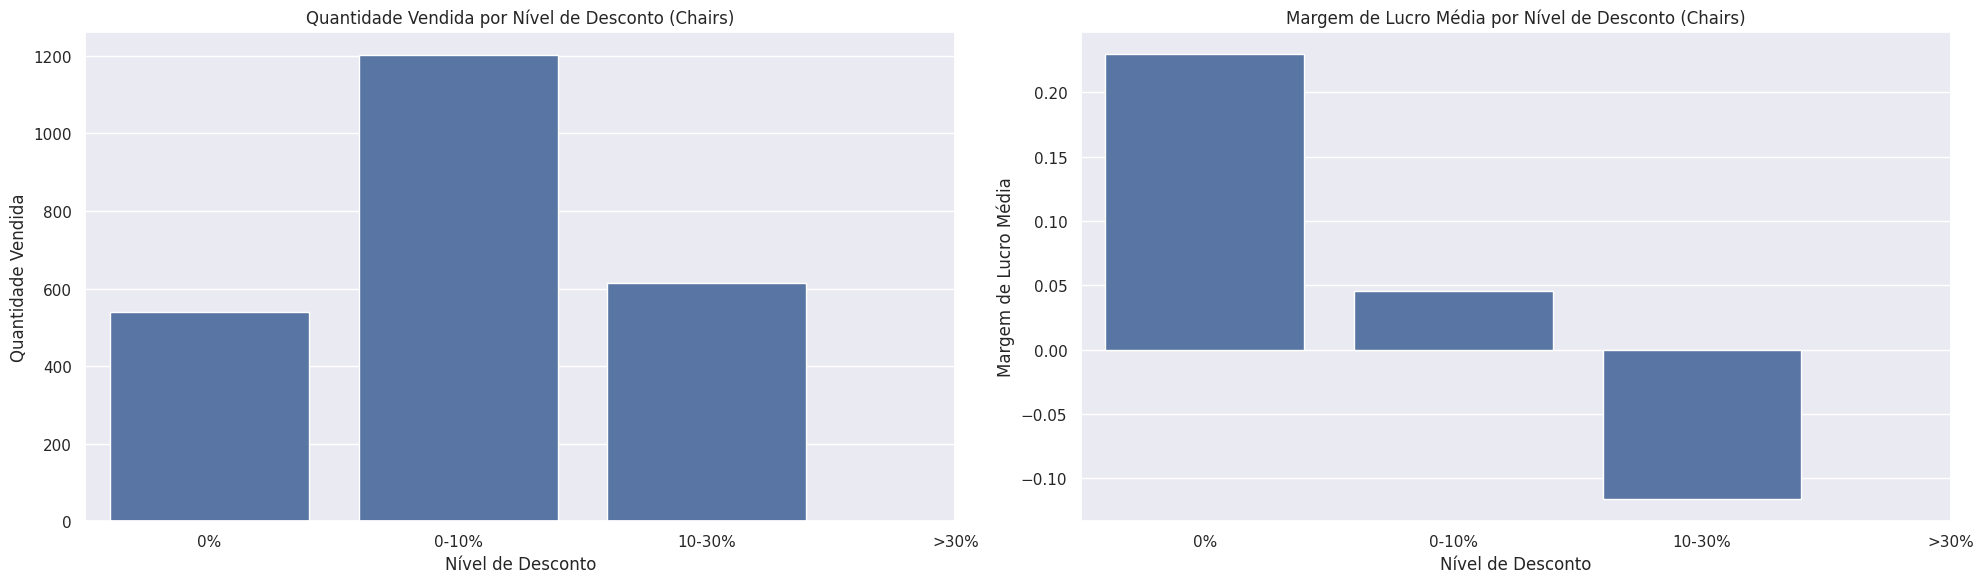

In [59]:
aux1 = df_eda.copy()

# Filtrar os dados
chairs_data = aux1[aux1['sub_category'] == 'Chairs']

# Quantidade vendida por nível de desconto
quantity_by_discount = chairs_data.groupby('discount_level').agg({'quantity': 'sum'}).reset_index()
quantity_by_discount.columns = ['discount_level', 'total_quantity']

# Margem de lucro média por nível de desconto
chairs_data['profit_margin'] = chairs_data['profit'] / chairs_data['sales']
profit_margin_by_discount = chairs_data.groupby('discount_level').agg({'profit_margin': 'mean'}).reset_index()
profit_margin_by_discount.columns = ['discount_level', 'avg_profit_margin']

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Quantidade vendida por nível de desconto
sns.barplot(x='discount_level', y='total_quantity', data=quantity_by_discount, ax=axes[0])
axes[0].set_title('Quantidade Vendida por Nível de Desconto (Chairs)')
axes[0].set_xlabel('Nível de Desconto')
axes[0].set_ylabel('Quantidade Vendida')
axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels(['0%', '0-10%', '10-30%', '>30%'])

# Margem de lucro média por nível de desconto
sns.barplot(x='discount_level', y='avg_profit_margin', data=profit_margin_by_discount, ax=axes[1])
axes[1].set_title('Margem de Lucro Média por Nível de Desconto (Chairs)')
axes[1].set_xlabel('Nível de Desconto')
axes[1].set_ylabel('Margem de Lucro Média')
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(['0%', '0-10%', '10-30%', '>30%'])

plt.tight_layout()
plt.show()

### **H12.** "Storage" e "Labels" frequentemente são comprados juntos em pedidos do segmento "Home Office".
<font color='green'> **VERDADEIRO** Representa 1.21% </font>

Frequência de pedidos contendo 'Storage' e 'Labels' juntos no segmento 'Home Office': 1.21%


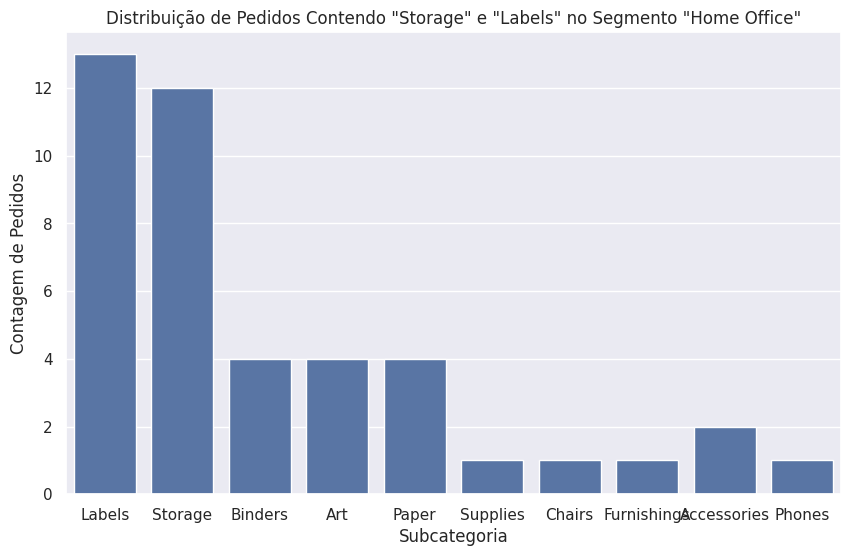

In [60]:
aux1 = df_eda.copy()

# Filtrar os dados para o segmento 'Home Office'
home_office_data = aux1[aux1['segment'] == 'homeof']

# Identificar pedidos que contenham tanto 'Storage' quanto 'Labels'
storage_orders = set(home_office_data[home_office_data['sub_category'] == 'Storage']['order_id'])
labels_orders = set(home_office_data[home_office_data['sub_category'] == 'Labels']['order_id'])

# Encontrar pedidos que contenham ambos
common_orders = storage_orders & labels_orders

# Calcular a frequência com que esses itens são comprados juntos
total_orders = home_office_data['order_id'].nunique()
common_orders_count = len(common_orders)
frequency = common_orders_count / total_orders

print(f"Frequência de pedidos contendo 'Storage' e 'Labels' juntos no segmento 'Home Office': {frequency:.2%}")

# Plotar a distribuição dos pedidos contendo 'Storage' e 'Labels'
plt.figure(figsize=(10, 6))
sns.countplot(x='sub_category', data=home_office_data[home_office_data['order_id'].isin(common_orders)])
plt.title('Distribuição de Pedidos Contendo "Storage" e "Labels" no Segmento "Home Office"')
plt.xlabel('Subcategoria')
plt.ylabel('Contagem de Pedidos')
plt.show()

## <font color='yellow'> 4.3 Analise Bivariada </font>

### 4.3.1 Sales by ship_mode

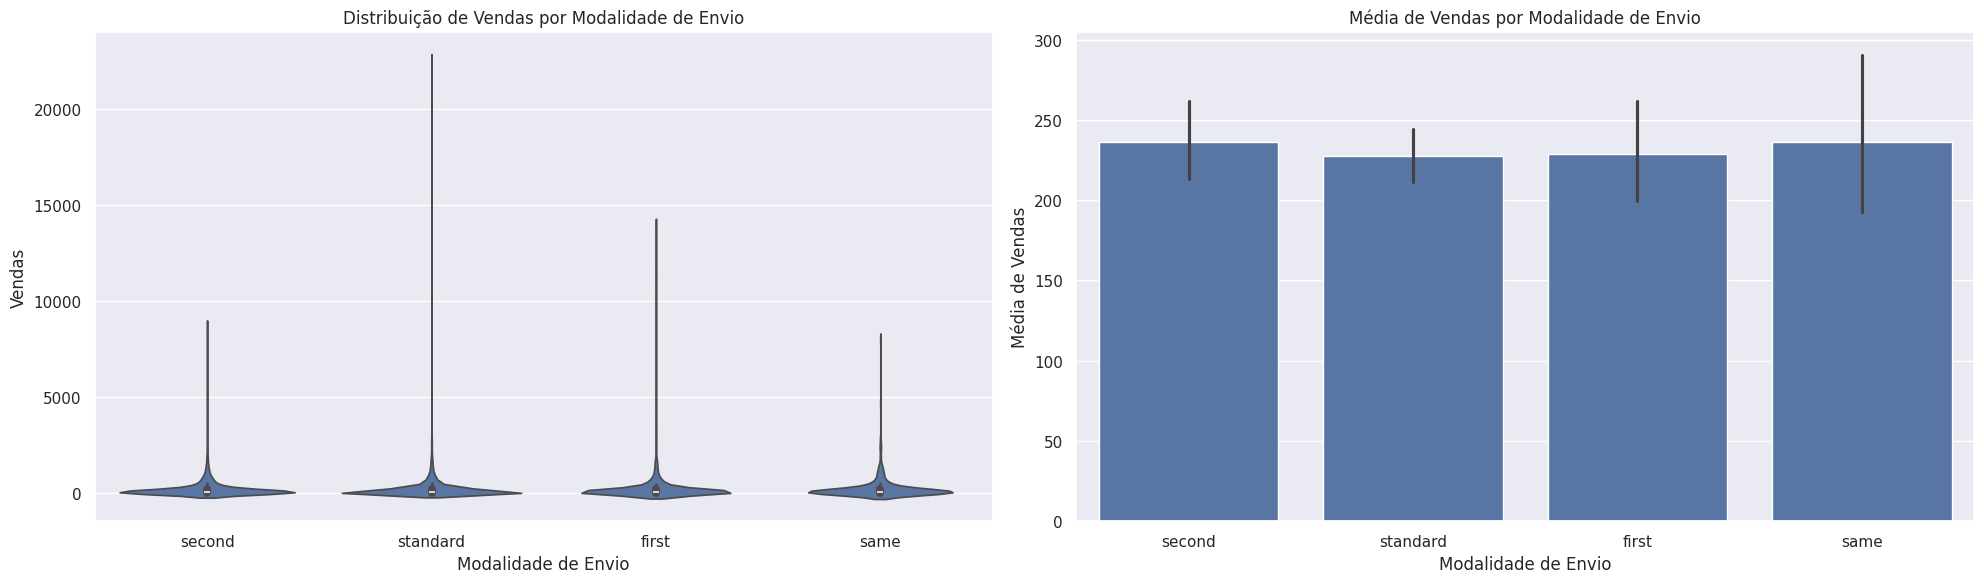

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.violinplot(ax=axes[0], x='ship_mode', y='sales', data=df_eda)
axes[0].set_title('Distribuição de Vendas por Modalidade de Envio')
axes[0].set_xlabel('Modalidade de Envio')
axes[0].set_ylabel('Vendas')

sns.barplot(ax=axes[1], x='ship_mode', y='sales', data=df_eda, estimator=np.mean)
axes[1].set_title('Média de Vendas por Modalidade de Envio')
axes[1].set_xlabel('Modalidade de Envio')
axes[1].set_ylabel('Média de Vendas')

plt.tight_layout()
plt.show()

### 4.3.2 Sales by customer_id top 10 best

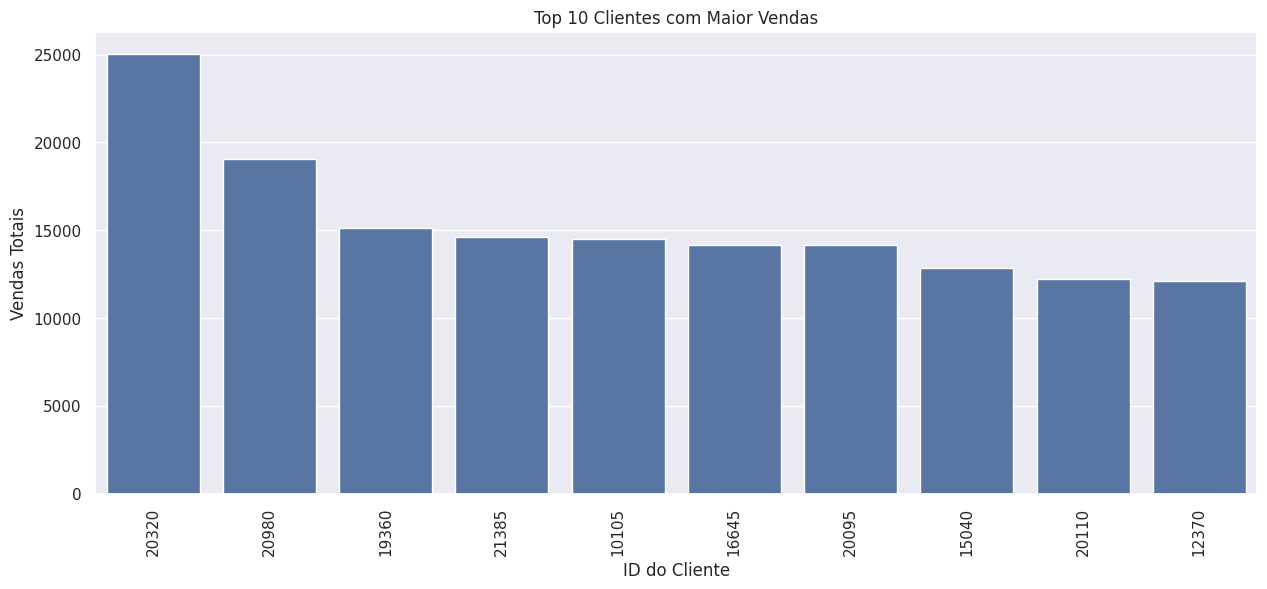

In [62]:
sales_by_customer = df_eda.groupby('customer_id')['sales'].sum().reset_index()

sales_by_customer = sales_by_customer.sort_values(by='sales', ascending=False)

top_10_sales = sales_by_customer.head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x='customer_id', y='sales', data=top_10_sales)
plt.title('Top 10 Clientes com Maior Vendas')
plt.xlabel('ID do Cliente')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=90)
plt.show()

### 4.3.3 Sales by segment

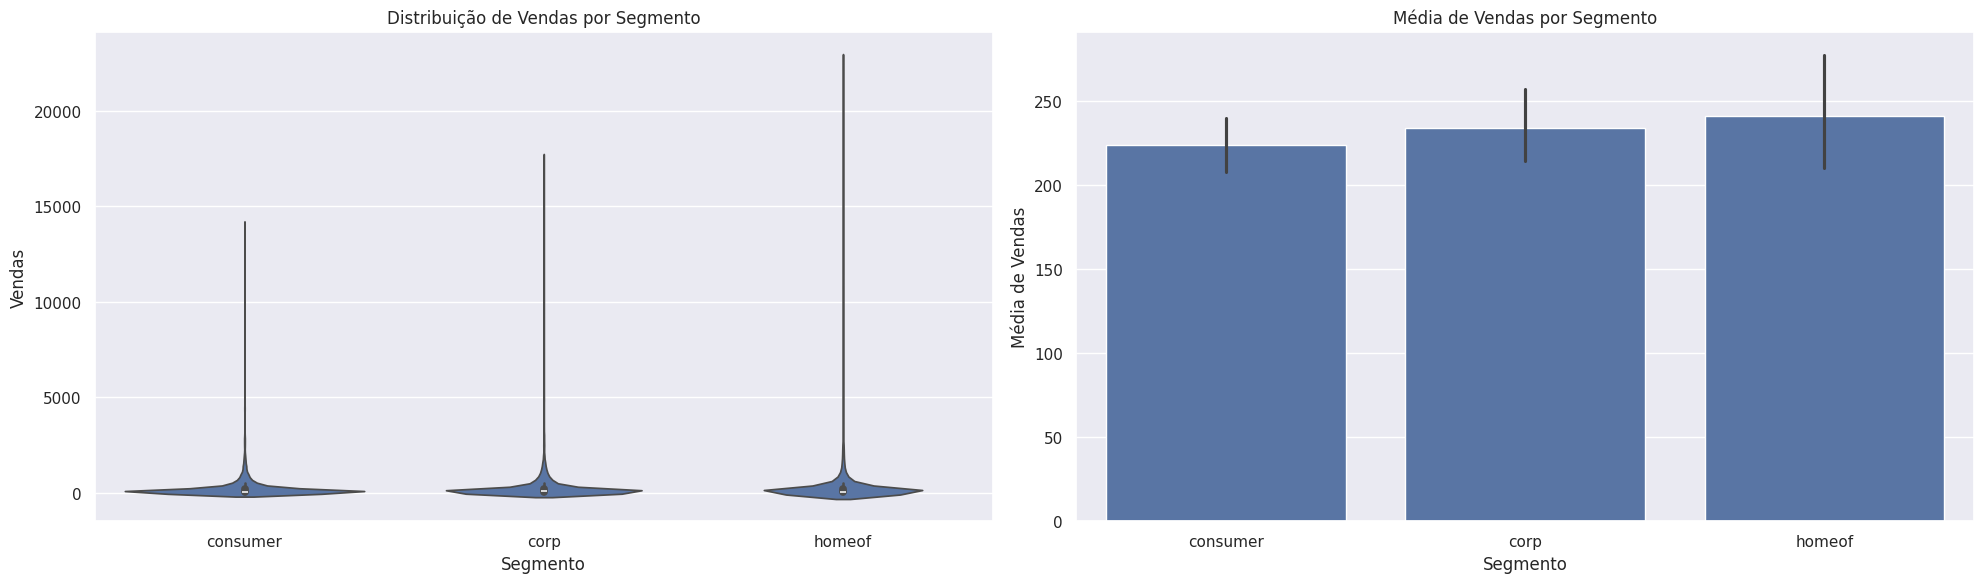

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.violinplot(ax=axes[0], x='segment', y='sales', data=df_eda)
axes[0].set_title('Distribuição de Vendas por Segmento')
axes[0].set_xlabel('Segmento')
axes[0].set_ylabel('Vendas')

sns.barplot(ax=axes[1], x='segment', y='sales', data=df_eda, estimator=np.mean)
axes[1].set_title('Média de Vendas por Segmento')
axes[1].set_xlabel('Segmento')
axes[1].set_ylabel('Média de Vendas')

plt.tight_layout()
plt.show()

### 4.3.4 Sales by region

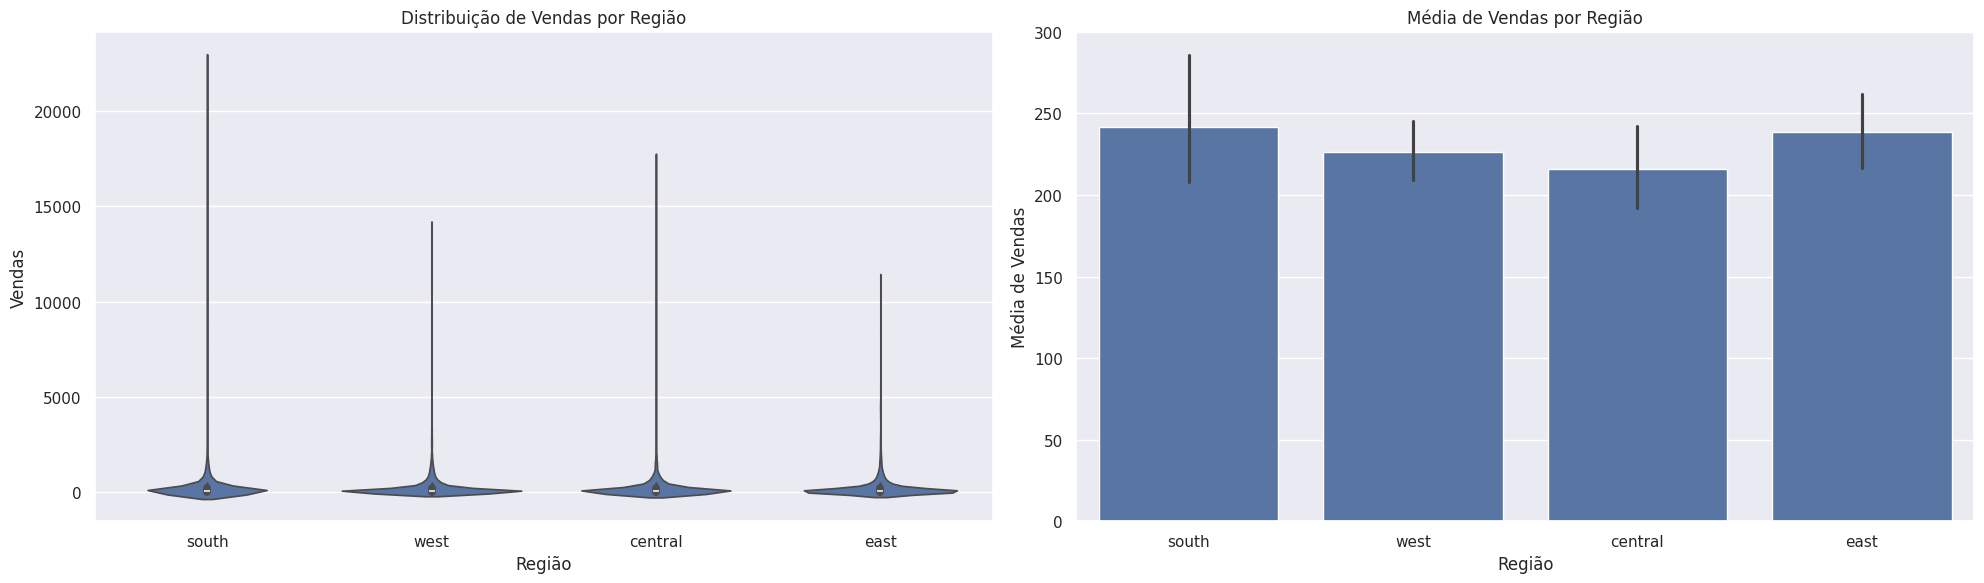

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.violinplot(ax=axes[0], x='region', y='sales', data=df_eda)
axes[0].set_title('Distribuição de Vendas por Região')
axes[0].set_xlabel('Região')
axes[0].set_ylabel('Vendas')

sns.barplot(ax=axes[1], x='region', y='sales', data=df_eda, estimator=np.mean)
axes[1].set_title('Média de Vendas por Região')
axes[1].set_xlabel('Região')
axes[1].set_ylabel('Média de Vendas')

plt.tight_layout()
plt.show()

### 4.3.5 Sales by category

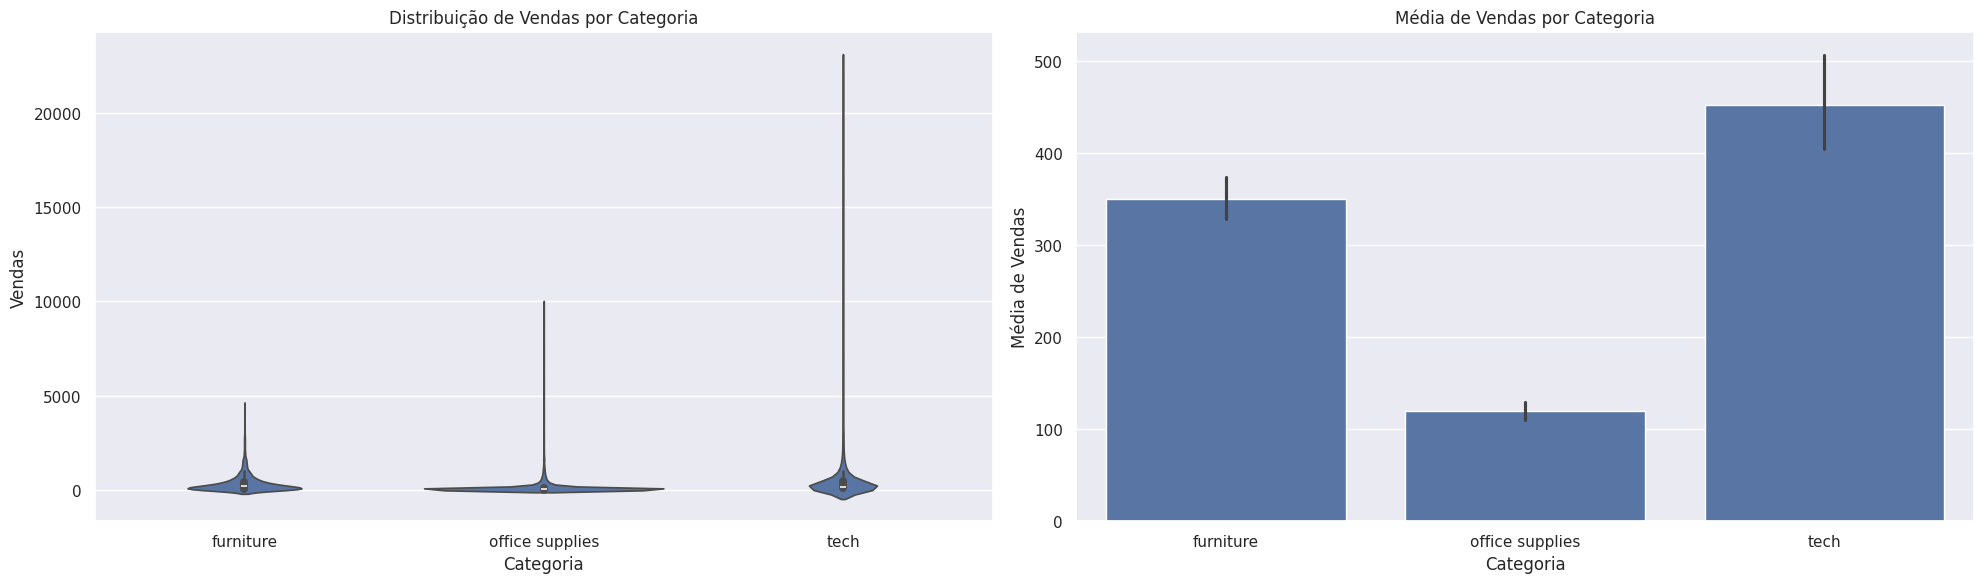

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.violinplot(ax=axes[0], x='category', y='sales', data=df_eda)
axes[0].set_title('Distribuição de Vendas por Categoria')
axes[0].set_xlabel('Categoria')
axes[0].set_ylabel('Vendas')

sns.barplot(ax=axes[1], x='category', y='sales', data=df_eda, estimator=np.mean)
axes[1].set_title('Média de Vendas por Categoria')
axes[1].set_xlabel('Categoria')
axes[1].set_ylabel('Média de Vendas')

plt.tight_layout()
plt.show()

### 4.3.6 Sales by sub_category

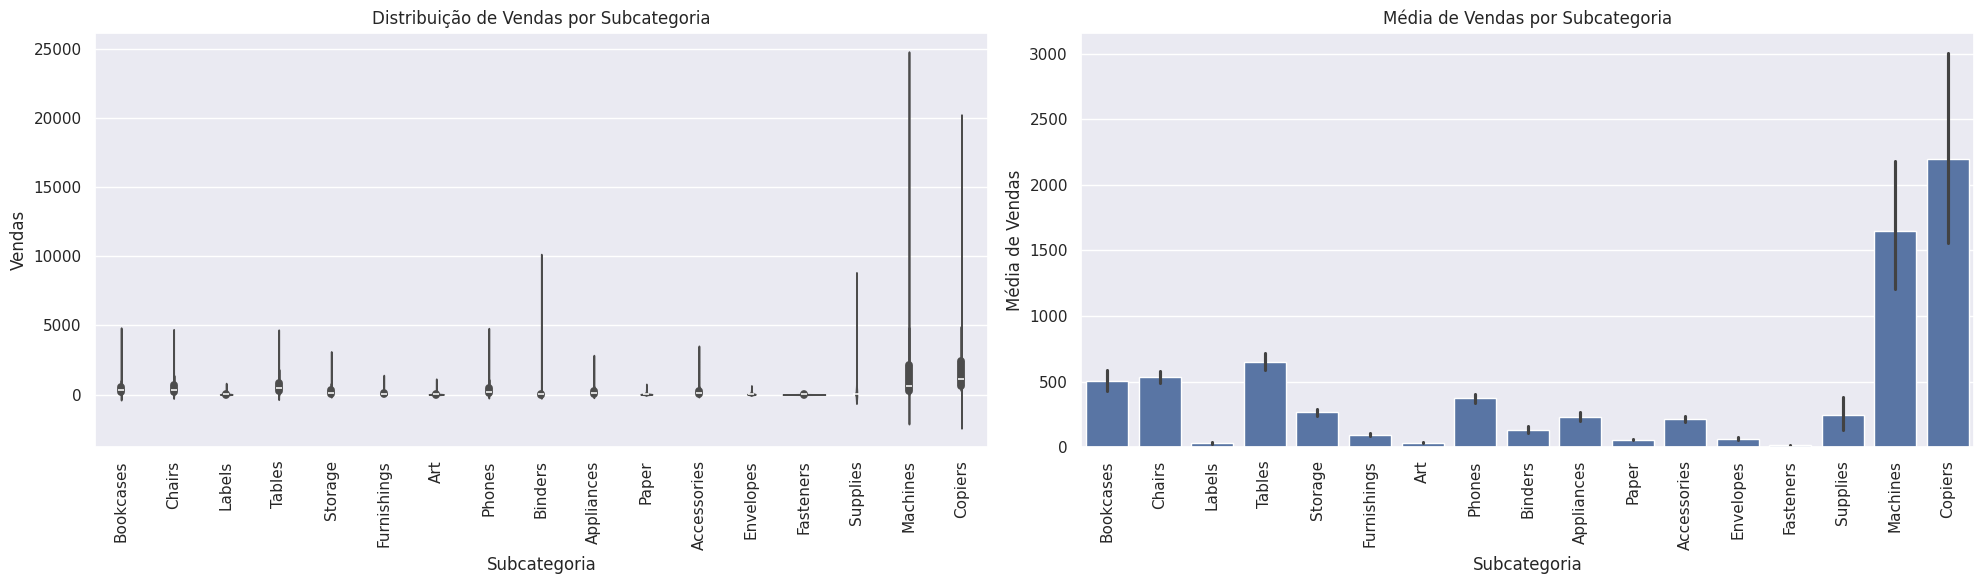

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.violinplot(ax=axes[0], x='sub_category', y='sales', data=df_eda)
axes[0].set_title('Distribuição de Vendas por Subcategoria')
axes[0].set_xlabel('Subcategoria')
axes[0].set_ylabel('Vendas')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(ax=axes[1], x='sub_category', y='sales', data=df_eda, estimator=np.mean)
axes[1].set_title('Média de Vendas por Subcategoria')
axes[1].set_xlabel('Subcategoria')
axes[1].set_ylabel('Média de Vendas')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### 4.3.7 Sales by discount_level

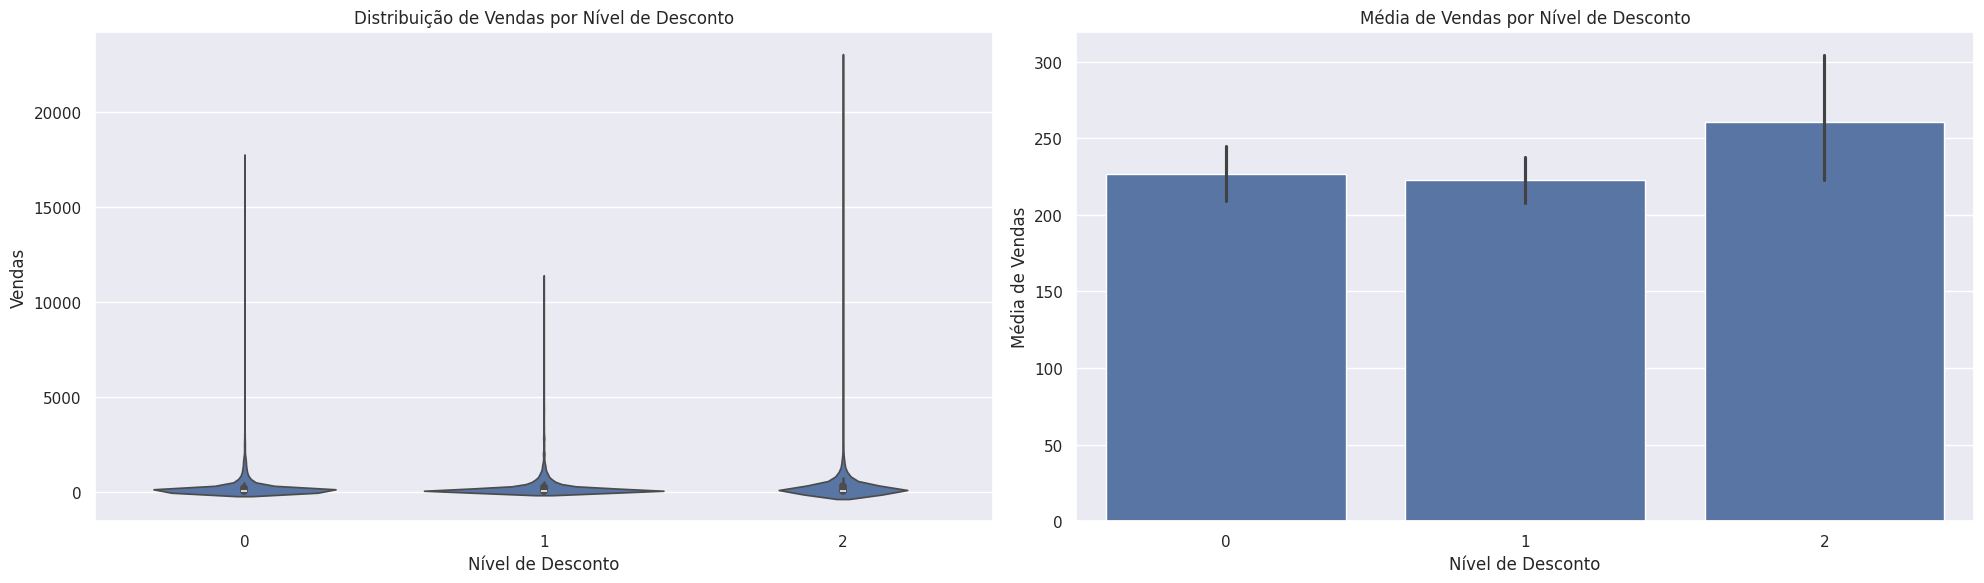

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.violinplot(ax=axes[0], x='discount_level', y='sales', data=df_eda)
axes[0].set_title('Distribuição de Vendas por Nível de Desconto')
axes[0].set_xlabel('Nível de Desconto')
axes[0].set_ylabel('Vendas')

sns.barplot(ax=axes[1], x='discount_level', y='sales', data=df_eda, estimator=np.mean)
axes[1].set_title('Média de Vendas por Nível de Desconto')
axes[1].set_xlabel('Nível de Desconto')
axes[1].set_ylabel('Média de Vendas')

plt.tight_layout()
plt.show()

### 4.3.8 Sales by lead_time

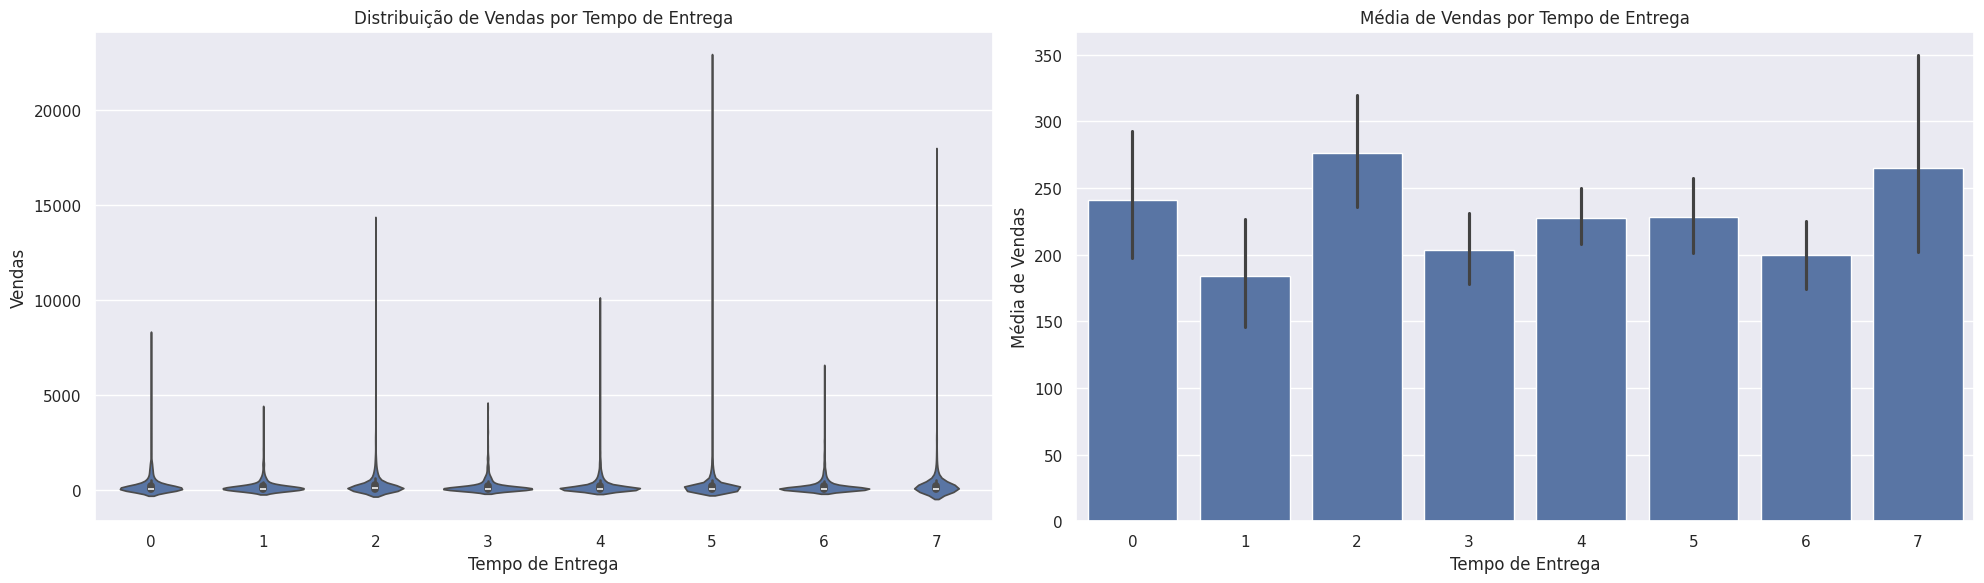

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico de violino
sns.violinplot(ax=axes[0], x='lead_time', y='sales', data=df_eda)
axes[0].set_title('Distribuição de Vendas por Tempo de Entrega')
axes[0].set_xlabel('Tempo de Entrega')
axes[0].set_ylabel('Vendas')

# Gráfico de barras
sns.barplot(ax=axes[1], x='lead_time', y='sales', data=df_eda, estimator=np.mean)
axes[1].set_title('Média de Vendas por Tempo de Entrega')
axes[1].set_xlabel('Tempo de Entrega')
axes[1].set_ylabel('Média de Vendas')

plt.tight_layout()
plt.show()

### 4.3.9 Sales by holiday_season

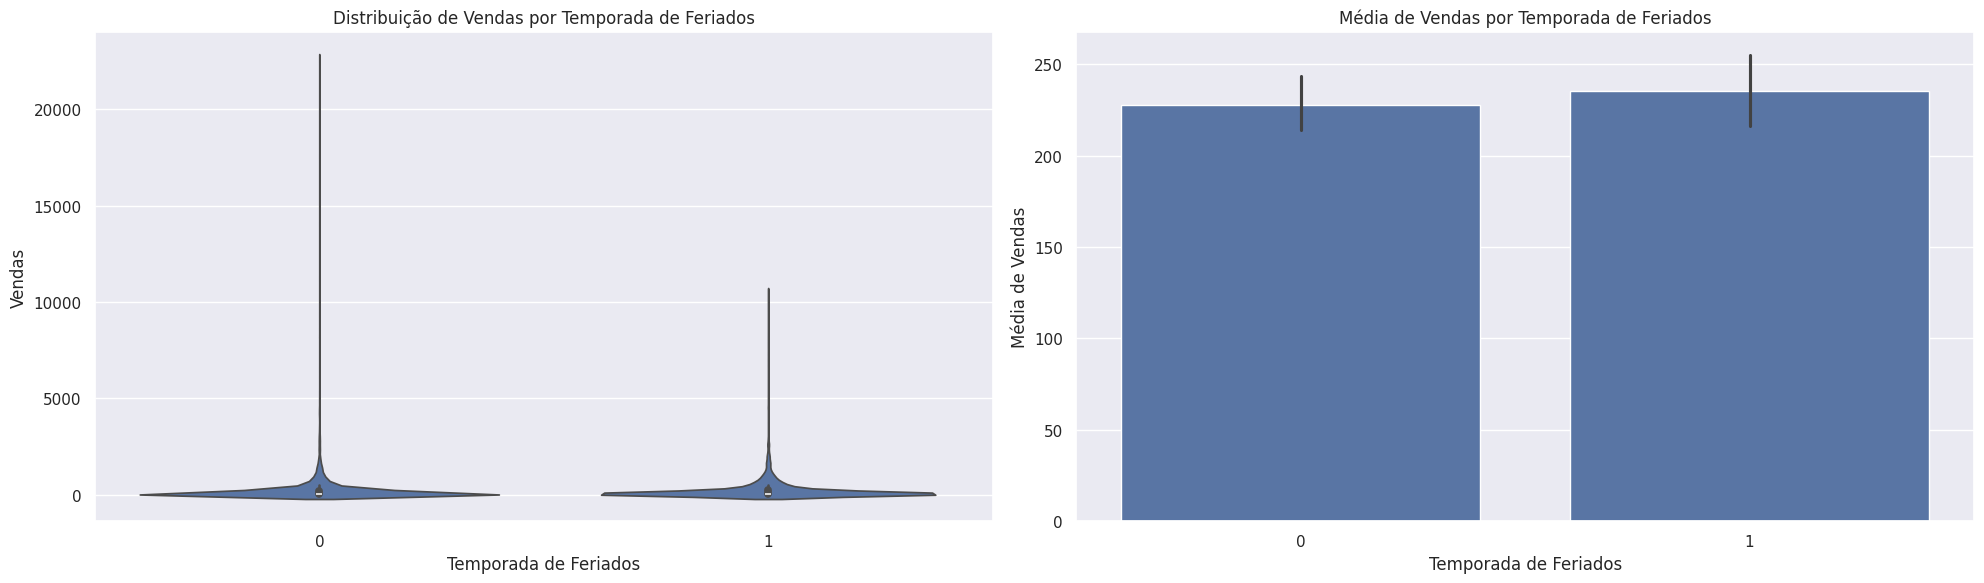

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico de violino
sns.violinplot(ax=axes[0], x='holiday_season', y='sales', data=df_eda)
axes[0].set_title('Distribuição de Vendas por Temporada de Feriados')
axes[0].set_xlabel('Temporada de Feriados')
axes[0].set_ylabel('Vendas')

# Gráfico de barras
sns.barplot(ax=axes[1], x='holiday_season', y='sales', data=df_eda, estimator=np.mean)
axes[1].set_title('Média de Vendas por Temporada de Feriados')
axes[1].set_xlabel('Temporada de Feriados')
axes[1].set_ylabel('Média de Vendas')

plt.tight_layout()
plt.show()

## <font color='yellow'> 4.4 Analise Multivariada </font>

### 4.4.1 Numerical Attributes

<Axes: >

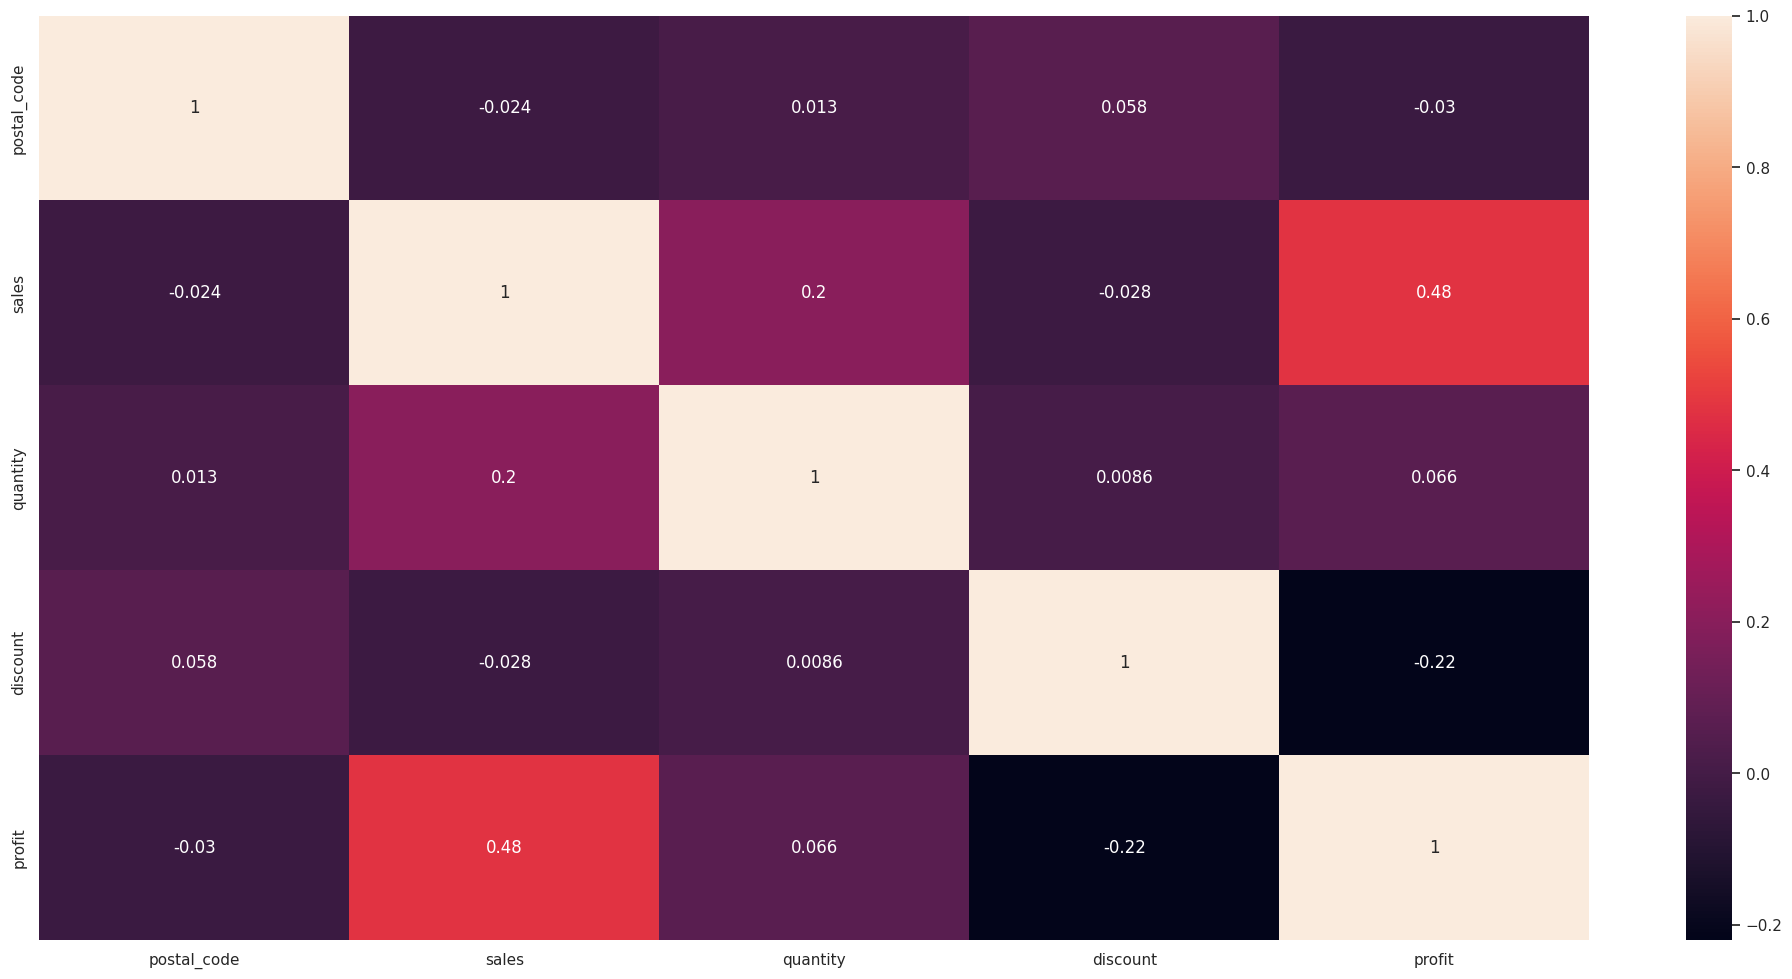

In [70]:
aux= df_fe[numerical_columns].corr()
sns.heatmap(aux,annot=True)

### 4.4.2 Categorical Attributes

<Axes: >

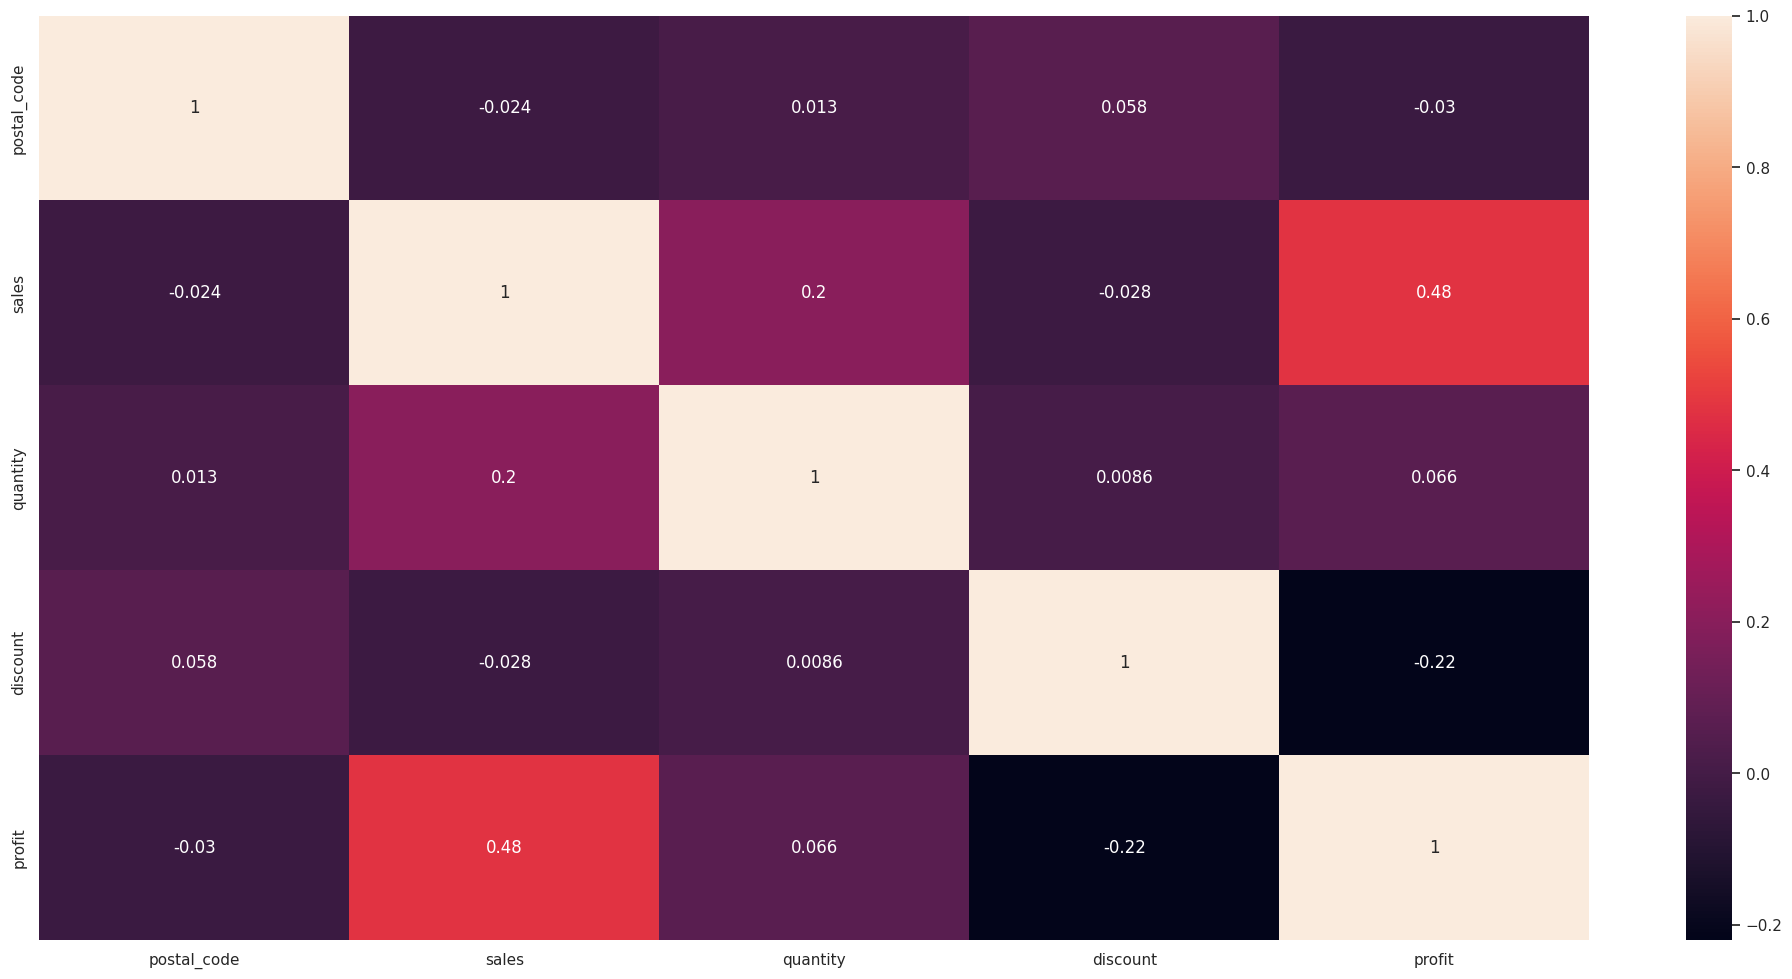

In [71]:
aux= df_fe[numerical_columns].corr()
sns.heatmap(aux,annot=True)

# <font color='red'> 5.0 Data Preparation </font>

In [45]:
df_dp = df_fe.copy()

df_dp = df_dp.drop(['order_id', 'ship_date', 'customer_id',
                    'postal_code', 'product_id', 'product_name',
                    'profit', 'profit_margin', 'discount_effect', 'discount_level'], axis=1)

In [97]:
df_dp.dtypes

order_date                  datetime64[ns]
ship_mode_second                     int64
ship_mode_standard                   int64
ship_mode_first                      int64
ship_mode_same                       int64
segment_consumer                     int64
segment_corp                         int64
segment_homeof                       int64
city                               float64
state                              float64
region_south                         int64
region_west                          int64
region_central                       int64
region_east                          int64
category_furniture                   int64
category_office supplies             int64
category_tech                        int64
sub_category                       float64
sales                              float64
quantity                             int64
discount                           float64
lead_time                            int64
order_month                          int64
order_year 

## 5.1 Normalization

In [46]:
df_dp['order_month'] = df_dp['order_month'].astype('int64')
df_dp['order_year'] = df_dp['order_year'].astype('int64')
df_dp['quarter'] = df_dp['quarter'].astype('int64')

# Primeira letra minúscula
df_dp['sub_category'] = df_dp['sub_category'].str.lower()
df_dp['city'] = df_dp['city'].str.lower()
df_dp['state'] = df_dp['state'].str.lower()

## 5.2 Rescaling

In [47]:
# Definir as colunas para OneHotEncoder e OrdinalEncoder
cols_one_hot = ['ship_mode', 'segment', 'region', 'category']
cols_ordinal_enc = ['quarter']

# Aplicar OneHotEncoder
ohe = ce.OneHotEncoder(cols=cols_one_hot, use_cat_names=True)
df_dp = ohe.fit_transform(df_dp)

# Aplicar OrdinalEncoder com a ordem correta das categorias
oe = ce.OrdinalEncoder(cols=cols_ordinal_enc)
df_dp = oe.fit_transform(df_dp)

# Aplicar LabelEncoder
le = LabelEncoder()
df_dp['order_year'] = le.fit_transform(df_dp['order_year'])

In [48]:
# Transformacao logaritmica
df_dp['sales'] = np.log1p(df_dp['sales'])

### 5.2.2 Nature transformation

In [49]:
# Order date - extrair o dia da semana
df_dp['order_weekday'] = df_fe['order_date'].dt.weekday

# Order date - transformação cíclica
df_dp['order_month_sin'] = np.sin(2 * np.pi * df_dp['order_month'] / 12)
df_dp['order_month_cos'] = np.cos(2 * np.pi * df_dp['order_month'] / 12)

df_dp['order_weekday_sin'] = np.sin(2 * np.pi * df_dp['order_weekday'] / 7)
df_dp['order_weekday_cos'] = np.cos(2 * np.pi * df_dp['order_weekday'] / 7)

# week of year
df_dp['week_of_year'] = df_fe['order_date'].dt.isocalendar().week.astype('int64')

df_dp['week_of_year_sin'] = np.sin(2 * np.pi * df_dp['week_of_year'] / 52)
df_dp['week_of_year_cos'] = np.cos(2 * np.pi * df_dp['week_of_year'] / 52)

## 5.3 Transform

### 5.3.1 Encoding

In [50]:
fe_sub_category=frequency_enconding(df_dp,'sub_category')
df_dp['sub_category']=df_dp['sub_category'].map(fe_sub_category)

fe_city=frequency_enconding(df_dp,'city')
df_dp['city']=df_dp['city'].map(fe_city)

fe_state=frequency_enconding(df_dp,'state')
df_dp['state']=df_dp['state'].map(fe_state)

# <font color='red'> 6.0 Feature Selection </font>

In [78]:
df_fs = df_dp.copy()
df_fs = df_fs.drop(['week_of_year', 'order_month', 'order_weekday'], axis=1)

## 6.1 Split dataframe into trainging and test dataset

In [79]:
# training dataset
X_train = df_fs[df_fs['order_date'] < '2017-11-18']
y_train = X_train['sales']

X_test = df_fs[df_fs['order_date'] >= '2017-11-18']
y_test = X_test['sales']

print( 'Training Min Date: {}'.format( X_train['order_date'].min() ) )
print( 'Training Max Date: {}'.format( X_train['order_date'].max() ) )

print( '\nTest Min Date: {}'.format( X_test['order_date'].min() ) )
print( 'Test Max Date: {}'.format( X_test['order_date'].max() ) )

Training Min Date: 2014-01-03 00:00:00
Training Max Date: 2017-11-17 00:00:00

Test Min Date: 2017-11-18 00:00:00
Test Max Date: 2017-12-30 00:00:00


In [80]:
# training and test dataset
X_train_fi = X_train.drop( ['order_date', 'sales'], axis=1 )
y_train_fi = y_train

## 6.2 Feature Importance

Feature: 0, Score: 0.00680
Feature: 1, Score: 0.00464
Feature: 2, Score: 0.00543
Feature: 3, Score: 0.00173
Feature: 4, Score: 0.00720
Feature: 5, Score: 0.00708
Feature: 6, Score: 0.00659
Feature: 7, Score: 0.05095
Feature: 8, Score: 0.03648
Feature: 9, Score: 0.00496
Feature: 10, Score: 0.00530
Feature: 11, Score: 0.00589
Feature: 12, Score: 0.00521
Feature: 13, Score: 0.00854
Feature: 14, Score: 0.21907
Feature: 15, Score: 0.00417
Feature: 16, Score: 0.21159
Feature: 17, Score: 0.13853
Feature: 18, Score: 0.04591
Feature: 19, Score: 0.02828
Feature: 20, Score: 0.02228
Feature: 21, Score: 0.00923
Feature: 22, Score: 0.00233
Feature: 23, Score: 0.00364
Feature: 24, Score: 0.01544
Feature: 25, Score: 0.01273
Feature: 26, Score: 0.02930
Feature: 27, Score: 0.01781
Feature: 28, Score: 0.04080
Feature: 29, Score: 0.04208


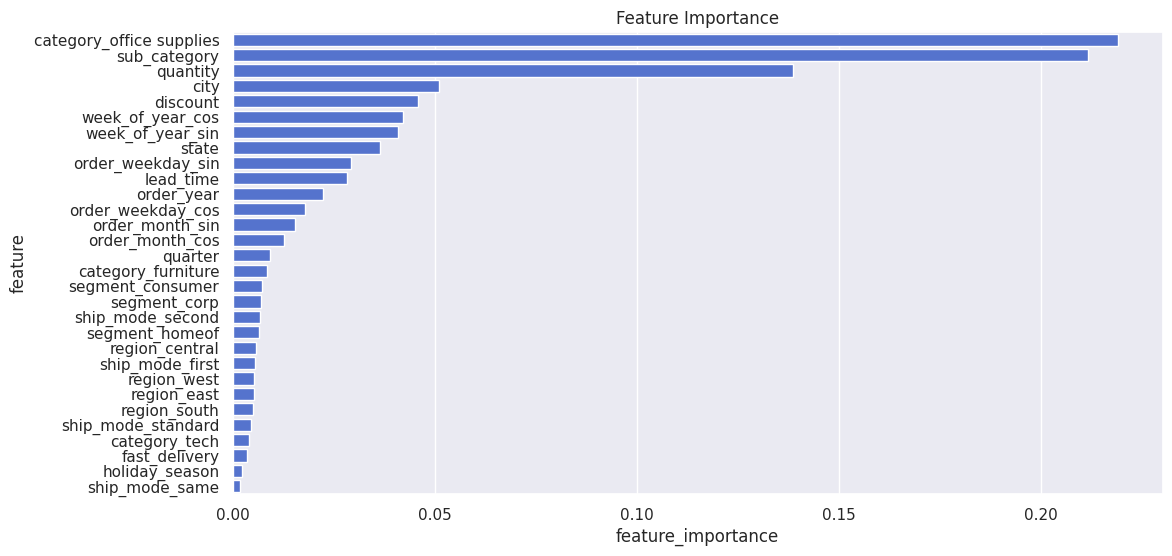

In [81]:
rf = RandomForestRegressor(n_jobs=-1)

# Fit model
rf.fit(X_train_fi, y_train_fi)

# Get importance
importance = rf.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
feat_imp = pd.DataFrame({'feature': X_train_fi.columns,
                        'feature_importance': importance})\
                        .sort_values('feature_importance', ascending=False)\
                        .reset_index(drop=True)
plt.subplots(figsize=(12,6))
sns.barplot(x='feature_importance', y='feature', data=feat_imp, orient='h', color='royalblue')\
    .set_title('Feature Importance');

In [82]:
cols_selected_importance = feat_imp['feature'].to_list()
cols_selected_importance

['category_office supplies',
 'sub_category',
 'quantity',
 'city',
 'discount',
 'week_of_year_cos',
 'week_of_year_sin',
 'state',
 'order_weekday_sin',
 'lead_time',
 'order_year',
 'order_weekday_cos',
 'order_month_sin',
 'order_month_cos',
 'quarter',
 'category_furniture',
 'segment_consumer',
 'segment_corp',
 'ship_mode_second',
 'segment_homeof',
 'region_central',
 'ship_mode_first',
 'region_west',
 'region_east',
 'region_south',
 'ship_mode_standard',
 'category_tech',
 'fast_delivery',
 'holiday_season',
 'ship_mode_same']

## 6.3 Boruta

In [83]:
# Definindo dataset de treino e teste para o Boruta
x_train_b = X_train_fi.values
y_train_b = y_train_fi.values.ravel()

rf = RandomForestRegressor(n_jobs=-1)
boruta = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=seed).fit(x_train_b, y_train_b)

In [84]:
cols_selected = boruta.support_.tolist()

# Colunas selecionadas
x_train_fs_b = X_train_fi
cols_selected_boruta = x_train_fs_b.iloc[:, cols_selected].columns.to_list()

# Colunas não selecionadas
cols_not_selected_boruta = list(np.setdiff1d(x_train_fs_b.columns, cols_selected_boruta))
cols_selected_boruta

['category_office supplies', 'sub_category', 'quantity', 'discount']

## 6.4 Columns Selected

In [85]:
cols_selected = ['category_office supplies',
                'sub_category',
                'quantity',
                'discount']

# Columns to add
feat_to_add = ['order_date', 'sales']

cols_selected_full = cols_selected.copy()
cols_selected_full.extend(feat_to_add)

# <font color='red'> 7.0 Machine Learning Modelling </font>

In [86]:
x_train = X_train[cols_selected]
x_test = X_test[cols_selected]

# Time Sieries Data Preparation
x_training = X_train[cols_selected_full]

## 7.1 Average Model

In [87]:
aux1 = x_test.copy()
aux1['sales'] = y_test.copy()

# Média global das vendas
global_avg = aux1['sales'].mean()

# Prediction
aux1['predictions'] = global_avg
yhat_baseline = aux1['predictions']

# Performance
baseline_result = ml_error('Average Model', np.expm1(y_test), np.expm1(yhat_baseline))
baseline_result

,Model Name,MAE,MAPE,RMSE
0,Average Model,174.86513,2.658135,386.49477


## 7.2 Linear Regression Model

In [88]:
# model
lr = LinearRegression().fit( x_train, y_train )

# prediction
yhat_lr = lr.predict( x_test )

# performance
lr_result = ml_error( 'Linear Regression', np.expm1( y_test ), np.expm1( yhat_lr ) )
lr_result

,Model Name,MAE,MAPE,RMSE
0,Linear Regression,159.907149,1.865571,344.604346


### 7.2.1 Linear Regression Model - Cross Validation

In [89]:
lr_result_cv = cross_validation( x_training, 5, 'Linear Regression', lr, verbose=False )
lr_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,178.47 +/- 34.77,1.73 +/- 0.19,505.99 +/- 193.57


## 7.3. Linear Regression Regularized Model - Lasso

In [90]:
# model
lrr = Lasso( alpha=0.01 ).fit( x_train, y_train )

# prediction
yhat_lrr = lrr.predict( x_test )

# performance
lrr_result = ml_error( 'Linear Regression - Lasso', np.expm1( y_test ), np.expm1( yhat_lrr ) )
lrr_result

,Model Name,MAE,MAPE,RMSE
0,Linear Regression - Lasso,163.311413,1.892122,351.721322


### 7.3.1.  Lasso - Cross Validation

In [91]:
lrr_result_cv = cross_validation( x_training, 5, 'Lasso', lrr, verbose=False )
lrr_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Lasso,181.84 +/- 35.12,1.77 +/- 0.19,512.29 +/- 193.52


## 7.4 Random Forest Regressor

In [92]:
# model
rf = RandomForestRegressor( n_estimators=100, n_jobs=-1, random_state=42 ).fit( x_train, y_train )

# prediction
yhat_rf = rf.predict( x_test )

# performance
rf_result = ml_error( 'Random Forest Regressor', np.expm1( y_test ), np.expm1( yhat_rf ) )
rf_result

,Model Name,MAE,MAPE,RMSE
0,Random Forest Regressor,128.675756,1.142088,288.375166


### 7.4.1.  Random Forest Regressor - Cross Validation

In [93]:
rf_result_cv = cross_validation( x_training, 5, 'Random Forest Regressor', rf, verbose=True )
rf_result_cv


KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2

KFold Number: 1


,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest Regressor,159.97 +/- 28.63,1.22 +/- 0.08,472.0 +/- 174.44


## 7.5. XGBoost Regressor

In [94]:
# model
model_xgb = xgb.XGBRegressor( objective='reg:squarederror',
                              n_estimators=100,
                              eta=0.01,
                              max_depth=10,
                              subsample=0.7,
                              colsample_bytee=0.9 ).fit( x_train, y_train )

# prediction
yhat_xgb = model_xgb.predict( x_test )

# performance
xgb_result = ml_error( 'XGBoost Regressor', np.expm1( y_test ), np.expm1( yhat_xgb ) )
xgb_result

,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,143.95384,1.328894,339.589361


### 7.5.1. XGBoost Regressor - Cross Validation

In [95]:
xgb_result_cv = cross_validation( x_training, 5, 'XGBoost Regressor', model_xgb, verbose=True )
xgb_result_cv


KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2

KFold Number: 1


,Model Name,MAE CV,MAPE CV,RMSE CV
0,XGBoost Regressor,169.35 +/- 33.37,1.44 +/- 0.11,508.13 +/- 191.82


## 7.6 Compare Model's Performance

### 7.6.1 Single Performance

In [96]:
modelling_result = pd.concat( [baseline_result, lr_result, lrr_result, rf_result, xgb_result] )
modelling_result.sort_values( 'RMSE' )

,Model Name,MAE,MAPE,RMSE
0,Random Forest Regressor,128.675756,1.142088,288.375166
0,XGBoost Regressor,143.953840,1.328894,339.589361
0,Linear Regression,159.907149,1.865571,344.604346
0,Linear Regression - Lasso,163.311413,1.892122,351.721322
0,Average Model,174.865130,2.658135,386.494770


### 7.6.2 Real Performance - Cross Validation

In [97]:
modelling_result_cv = pd.concat( [lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv] )
modelling_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,178.47 +/- 34.77,1.73 +/- 0.19,505.99 +/- 193.57
0,Lasso,181.84 +/- 35.12,1.77 +/- 0.19,512.29 +/- 193.52
0,Random Forest Regressor,159.97 +/- 28.63,1.22 +/- 0.08,472.0 +/- 174.44
0,XGBoost Regressor,169.35 +/- 33.37,1.44 +/- 0.11,508.13 +/- 191.82


# <font color='red'> 8.0 Hyperparameter Fine Tuning </font>

## 8.1 Random Search

In [147]:
param = {
   'n_estimators': [1500, 1700, 2500, 3000, 3500],
   'eta': [0.01, 0.03],
   'max_depth': [3, 5, 9],
   'subsample': [0.1, 0.5, 0.7],
   'colsample_bytree': [0.3, 0.7, 0.9],
   'min_child_weight': [3, 8, 15]
       }

MAX_EVAL = 5

In [148]:
final_result = pd.DataFrame()

for i in range( MAX_EVAL ):
   # escolher valores para parâmetros aleatoriamente
   hp = { k: rd.sample( v, 1 )[0] for k, v in param.items() }
   print( hp )

   # model
   model_xgb = xgb.XGBRegressor( objective='reg:squarederror',
                                 n_estimators=hp['n_estimators'],
                                 eta=hp['eta'],
                                 max_depth=hp['max_depth'],
                                 subsample=hp['subsample'],
                                 colsample_bytee=hp['colsample_bytree'],
                                 min_child_weight=hp['min_child_weight'] )

   # performance
   result = cross_validation( x_training, 5, 'XGBoost Regressor', model_xgb, verbose=True )
   final_result = pd.concat( [final_result, result] )

{'n_estimators': 3500, 'eta': 0.03, 'max_depth': 3, 'subsample': 0.1, 'colsample_bytree': 0.7, 'min_child_weight': 8}

KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2

KFold Number: 1
{'n_estimators': 1500, 'eta': 0.01, 'max_depth': 9, 'subsample': 0.7, 'colsample_bytree': 0.9, 'min_child_weight': 15}

KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2

KFold Number: 1
{'n_estimators': 1700, 'eta': 0.01, 'max_depth': 5, 'subsample': 0.7, 'colsample_bytree': 0.3, 'min_child_weight': 8}

KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2

KFold Number: 1
{'n_estimators': 1500, 'eta': 0.01, 'max_depth': 3, 'subsample': 0.5, 'colsample_bytree': 0.9, 'min_child_weight': 8}

KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2

KFold Number: 1
{'n_estimators': 3000, 'eta': 0.01, 'max_depth': 5, 'subsample': 0.5, 'colsample_bytree': 0.3, 'min_child_weight': 15}

KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2


In [149]:
final_result

,Model Name,MAE CV,MAPE CV,RMSE CV
0,XGBoost Regressor,154.21 +/- 31.95,1.17 +/- 0.07,453.84 +/- 185.7
0,XGBoost Regressor,156.21 +/- 30.64,1.19 +/- 0.05,456.52 +/- 183.3
0,XGBoost Regressor,154.42 +/- 31.75,1.17 +/- 0.06,453.21 +/- 182.33
0,XGBoost Regressor,154.04 +/- 32.53,1.15 +/- 0.06,453.61 +/- 184.76
0,XGBoost Regressor,154.69 +/- 31.44,1.17 +/- 0.06,454.37 +/- 182.39


## 8.2 Final Model

In [162]:
param_tuned = {
    'n_estimators': 1500,
    'eta': 0.01,
    'max_depth': 3,
    'subsample': 0.5,
    'colsample_bytree': 0.9,
    'min_child_weight': 8 }

In [163]:
# model
model_xgb_tuned = xgb.XGBRegressor( objective='reg:squarederror',
                                    n_estimators=param_tuned['n_estimators'],
                                    eta=param_tuned['eta'],
                                    max_depth=param_tuned['max_depth'],
                                    subsample=param_tuned['subsample'],
                                    colsample_bytee=param_tuned['colsample_bytree'],
                                    min_child_weight=param_tuned['min_child_weight'] ).fit( x_train, y_train )

# prediction
yhat_xgb_tuned = model_xgb_tuned.predict( x_test )

# performance
xgb_result_tuned = ml_error( 'XGBoost Regressor', np.expm1( y_test ), np.expm1( yhat_xgb_tuned ) )
xgb_result_tuned

,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,125.015941,1.104863,280.305211


In [165]:
mpe = mean_percentage_error( np.expm1( y_test ), np.expm1( yhat_xgb_tuned ) )
mpe

-0.6780821248745749

# <font color='red'> 9.0 Tradução e interpretação do erro </font>

In [167]:
df9 = X_test[cols_selected_full]

# rescale
df9['sales'] = np.expm1( df9['sales'] )
df9['predictions'] = np.expm1( yhat_xgb_tuned )

## 9.1 Business Performance

In [168]:
# sum of predictions
total_predictions = df9['predictions'].sum()

# MAE and MAPE
global_MAE = mean_absolute_error(df9['sales'], df9['predictions'])
global_MAPE = mean_absolute_percentage_error(df9['sales'], df9['predictions'])

worst_scenario = total_predictions - global_MAE
best_scenario = total_predictions + global_MAE

# Scenarios
df_results = pd.DataFrame({
    'predictions_total': [total_predictions],
    'worst_scenario': [worst_scenario],
    'best_scenario': [best_scenario],
    'MAE': [global_MAE],
    'MAPE': [global_MAPE]
})

In [169]:
df_results.sort_values( 'MAPE', ascending=False ).head()

,predictions_total,worst_scenario,best_scenario,MAE,MAPE
0,87698.0625,87573.046559,87823.078441,125.015941,1.104863


## 9.2 Total Performance

In [170]:
df93 = df_results[['predictions_total', 'worst_scenario', 'best_scenario']].apply( lambda x: np.sum( x ), axis=0 ).reset_index().rename( columns={'index': 'Scenario', 0:'Values'} )
df93['Values'] = df93['Values'].map( 'R${:,.2f}'.format )
df93

,Scenario,Values
0,predictions_total,"R$87,698.06"
1,worst_scenario,"R$87,573.05"
2,best_scenario,"R$87,823.08"


## 9.3 Machine Learning Performance

In [171]:
df9['error'] = df9['sales'] - df9['predictions']
df9['error_rate'] = df9['predictions'] / df9['sales']

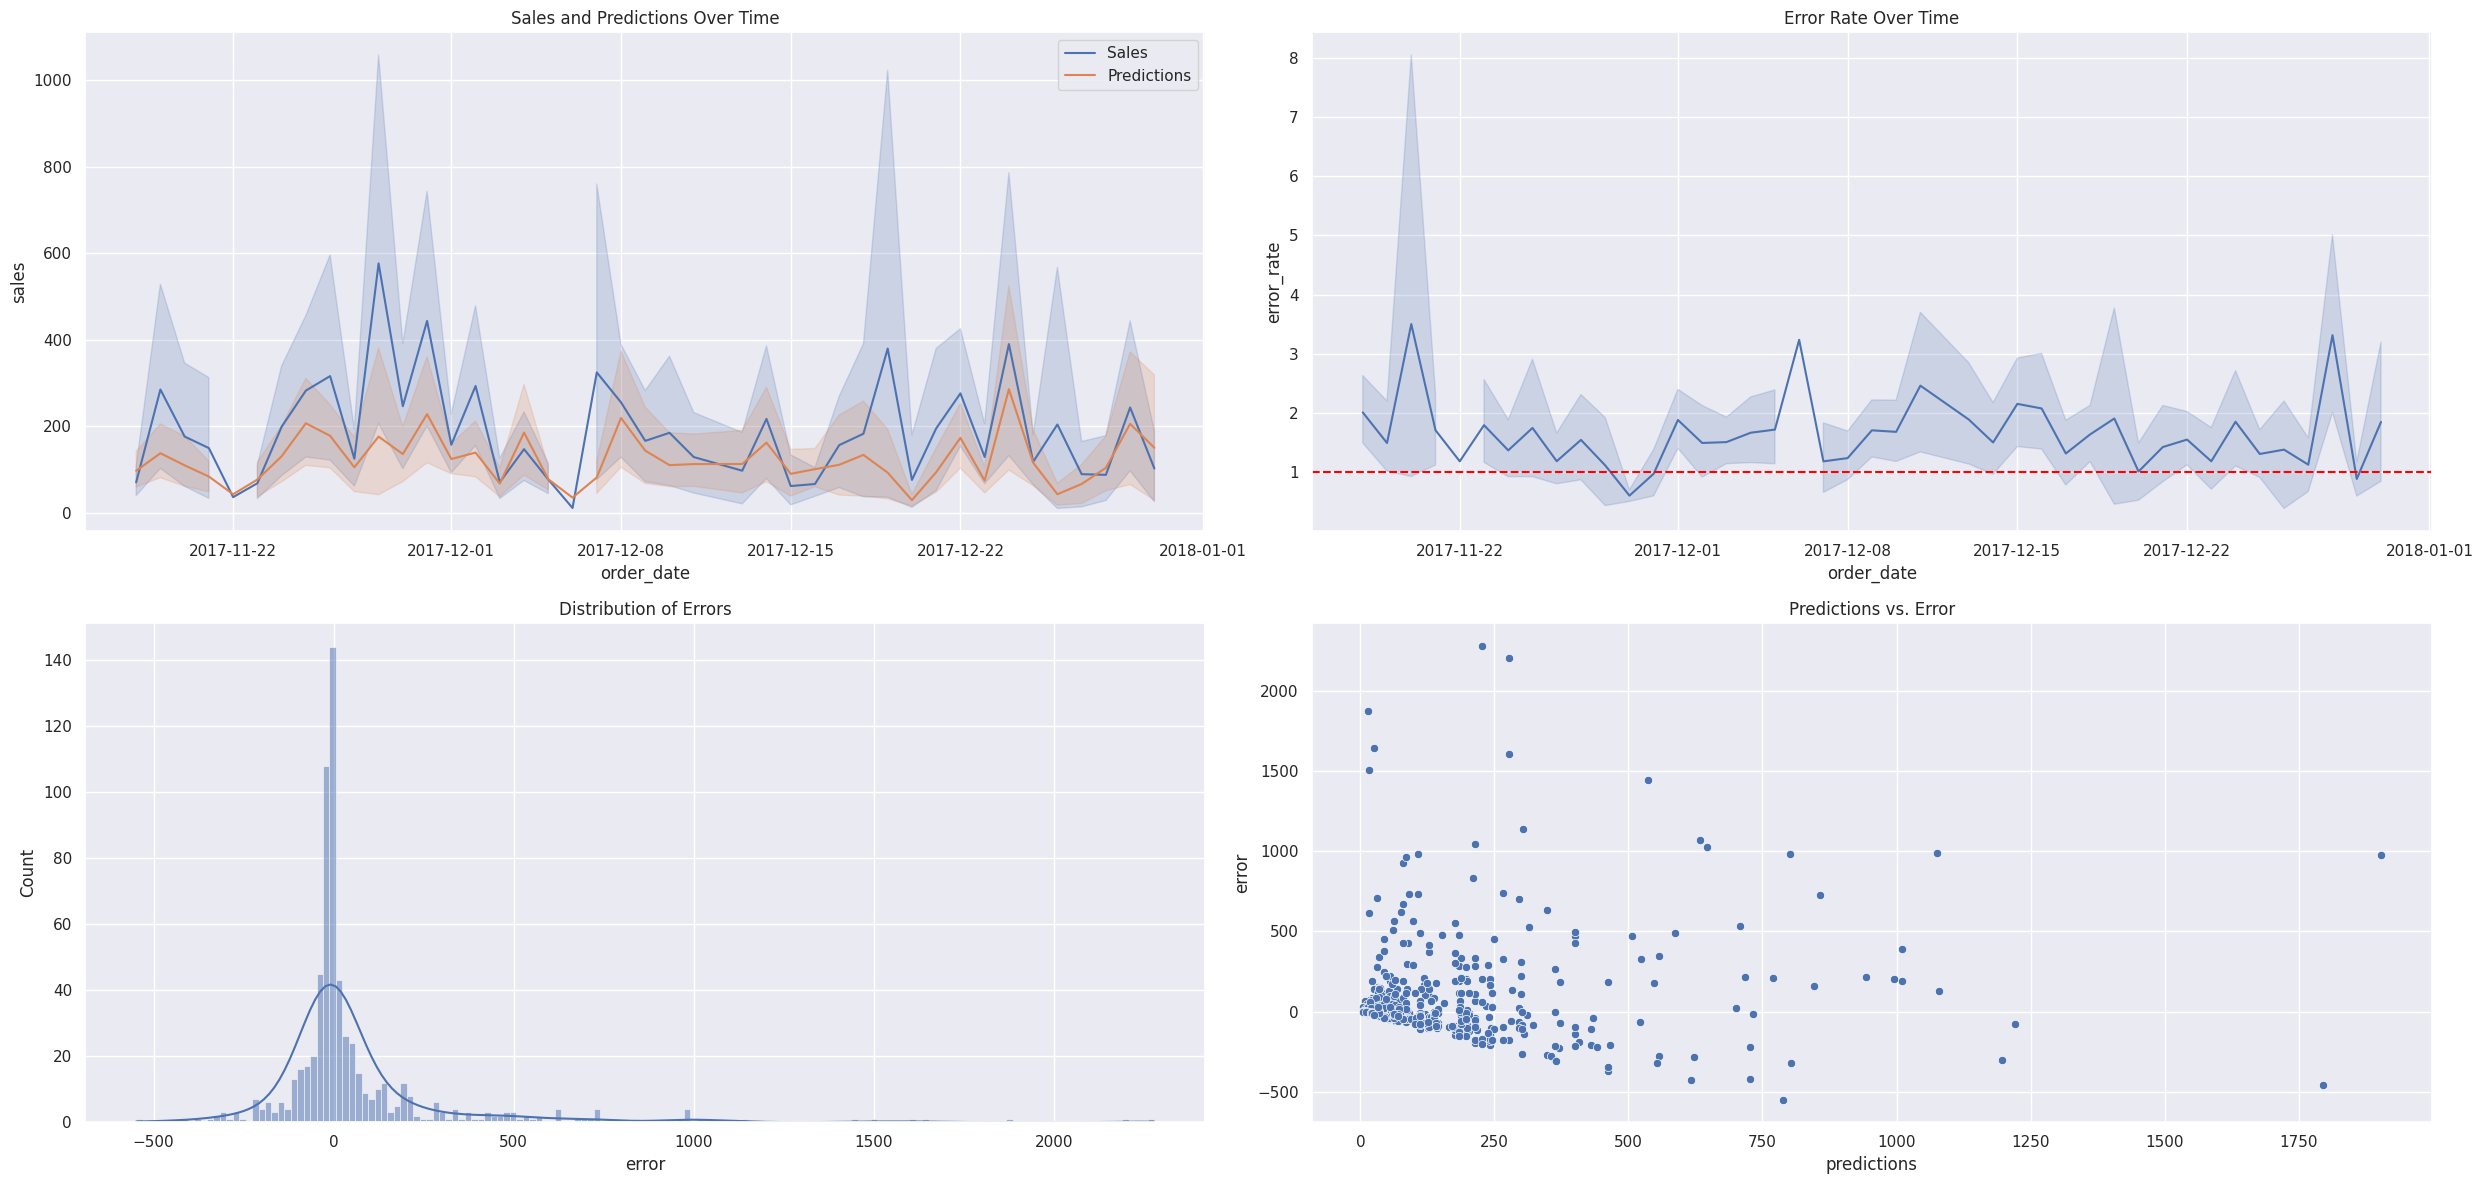

In [172]:
# 1. Linha do tempo das vendas reais e previsões
plt.subplot(2, 2, 1)
sns.lineplot(x='order_date', y='sales', data=df9, label='Sales')
sns.lineplot(x='order_date', y='predictions', data=df9, label='Predictions')
plt.title("Sales and Predictions Over Time")

# 2. Linha do tempo da taxa de erro
plt.subplot(2, 2, 2)
sns.lineplot(x='order_date', y='error_rate', data=df9)
plt.axhline(1, linestyle='--', color='red')
plt.title("Error Rate Over Time")

# 3. Distribuição dos erros (histograma com KDE)
plt.subplot(2, 2, 3)
sns.histplot(df9['error'], kde=True)
plt.title("Distribution of Errors")

# 4. Relação entre previsões e erro (scatter plot)
plt.subplot(2, 2, 4)
sns.scatterplot(x='predictions', y='error', data=df9)
plt.title("Predictions vs. Error")

plt.tight_layout()
plt.show()